# Advanced Regression  - Surprise Housing 

**Problem Statement:** A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

 

This is divided into following submodules
- Data Understanding, Preperation & EDA
- Model building and evaluation

# 1. Data Understanding, Preperation & EDA

## 1.1 Data Understanding, cleaning the data

In [128]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [129]:
#read dataset
housing_data = pd.read_csv("/train.csv")
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [130]:
#Checking the datatype of columns
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- As per initial observation from data, looks there are multiple NULL values. Try to plot the Null value % to understand further. Try to check and remove columns where NULL / NA value percentage is more than 30%

In [131]:
#Check for NULL values
# if the % of NULL values is > 30%, then Remove the NULL values from the data
def find_na_value_percentage(df: pd.DataFrame):
    if housing_data.isnull().sum().sum() != 0:
      percentage_value = (housing_data.isnull().sum() / len(df)) * 100
      na_value_data = (housing_data.isnull().sum() / len(df)) * 100
      na_value_data = na_value_data.drop(na_value_data[na_value_data == 0].index).sort_values(ascending=False)
      missing_value_data = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percentage_value})

      missing_data_condition = missing_value_data[(missing_value_data['percent_missing']<=30.00) ].index
      missing_value_data = missing_value_data.drop(missing_data_condition)
      return missing_value_data
missing_data = find_na_value_percentage(housing_data)
na_list = missing_data['column_name'].tolist()

In [132]:
#check for the na column list
na_list

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [133]:
##Remove NA  coloumns
housing_data = housing_data.drop(na_list,axis=1)

In [134]:
#Id parameter is not useful, as it has no impact on final outcome. So dropping the same
housing_data = housing_data.drop(['Id'],axis=1)

In [135]:
#check further on missing percentage of other columns
percent_missing = (housing_data.isnull().sum() / housing_data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
dtype: float64

In [136]:
#Check for datatype of columns
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## 1.2 Data Imputations

- a. For the numerical variables, fill the missing values with appropriate parameters.

In [137]:
#Check stats on numerical variables
housing_data[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

LotFrontage   MasVnrArea  GarageYrBlt
count  1201.000000  1452.000000  1379.000000
mean     70.049958   103.685262  1978.506164
std      24.284752   181.066207    24.689725
min      21.000000     0.000000  1900.000000
25%      59.000000     0.000000  1961.000000
50%      69.000000     0.000000  1980.000000
75%      80.000000   166.000000  2002.000000
max     313.000000  1600.000000  2010.000000

In [138]:
# Fill below values with Median
housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median())
housing_data['MasVnrArea']= housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median())

# For the year of built take mode (1978)
housing_data['GarageYrBlt'] = pd.to_numeric(housing_data['GarageYrBlt'], errors='coerce')
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].mean())

- b. For categorical variables replace values with most values indicating as None in that category.

In [139]:
#Fill NA with value as 'NoGarage'
housing_data['GarageType'] = housing_data['GarageType'].fillna('NoGarage')

In [140]:
#Check on the unique occurances of GarageType parameter
housing_data['GarageType'].value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [141]:
#Aplly similar logic to fill the default values indicating as per data dictionary
# GarageCond - Equalent value from data dictionary for NA is 'No Garage' Filling it with 'NoGarage'
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('NoGarage')

#GarageFinish - Equalent value from data dictionary for is 'No Garage' Filling it with 'NoGarage'
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('NoGarage')

#GarageQual - Equalent value from data dictionary for NA is 'No Garage' Filling it with 'NoGarage'
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('NoGarage')

#BsmtFinType2 - Equalent value from data dictionary for NA is 'No Basement' Filling it with 'NoBasement'
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('NoBasement')

#BsmtExposure - Equalent value from data dictionary for NA is 'No Basement' Filling it with 'NoBasement'
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('NoBasement')

#BsmtFinType1 - Equalent value from data dictionary for NA is 'No Basement' Filling it with 'NoBasement'
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('NoBasement')

#BsmtCond - Equalent value from data dictionary for NA is 'No Basement' Filling it with 'NoBasement'
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('NoBasement')

#BsmtQual - Equalent value from data dictionary for NA is 'No Basement' Filling it with 'NoBasement'
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('NoBasement')

#MasVnrType - Equalent value from data dictionary is 'None'
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')

In [142]:
# For 'Electrical'  filed as there is no default value, 
#check for the value which is more frequently occuring
housing_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [143]:
# As 'SBrkr' (Standard Circuit Breakers & Romex) is most frequently occuring replace missing values with 'SBrkr'
housing_data['Electrical'] = housing_data['Electrical'].fillna('SBrkr')

In [144]:
#Recheck on the missing value %
percent_missing = (housing_data.isnull().sum() / housing_data.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

MSSubClass      0.0
GarageYrBlt     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
FullBath        0.0
dtype: float64

- All the NA Values are Cleaned

- By checking at the data dictionary, and the data type of the variables, for some of the columns data type need to be changed.
For eg: MSSubClass, OverallQual, OverallCond are categorical variables which needs to be converted

In [145]:
housing_data[['MSSubClass','OverallQual','OverallCond']] =\
  housing_data[['MSSubClass','OverallQual','OverallCond']].astype('object')

In [146]:
# Check the statistical description of the numerical columns
housing_data.describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     69.863699   10516.828082  1971.267808   1984.865753   103.117123   
std      22.027677    9981.264932    30.202904     20.645407   180.731373   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      60.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

- As per the numerical data analysis, for parameters such as MasVnrArea, BsmtFinSF1, BsmtFinSF2 etc., the value are quite varying / skewed as compared to median values.

## 1.3 EDA

- Univariate Analysis:

In [147]:
#In this  case, the dependent variable i.e SalePrice

#descriptive statistics summary
housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- As per stats data, it looks the values are skewed. Confirming the same with distplot

<Axes: xlabel='SalePrice', ylabel='Density'>

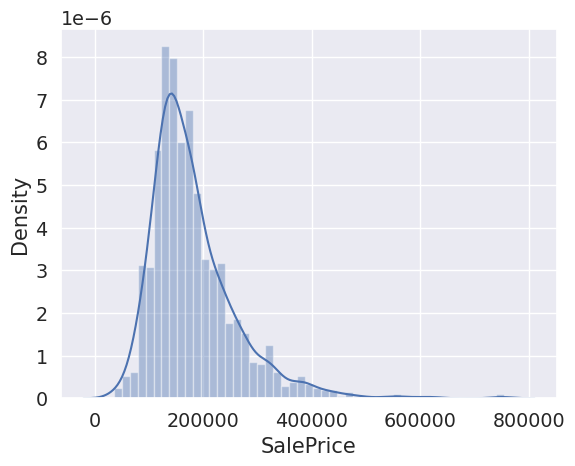

In [148]:
sns.distplot(housing_data['SalePrice'])

 The target variable 'SalePrice' is not normally distributed and its skewed towards rightside, as per the distribution.

In [149]:
housing_data['SalePrice'].skew()

1.8828757597682129

As the data is skewed, in order to normalize the distribution, any of the  approaches log transform, square root transform etc., can be used. In this particular case, log transform is used.

In [150]:
housing_data['SalePrice']=np.log(housing_data['SalePrice'])
housing_data['SalePrice'].skew()

0.12133506220520406

<Axes: xlabel='SalePrice', ylabel='Density'>

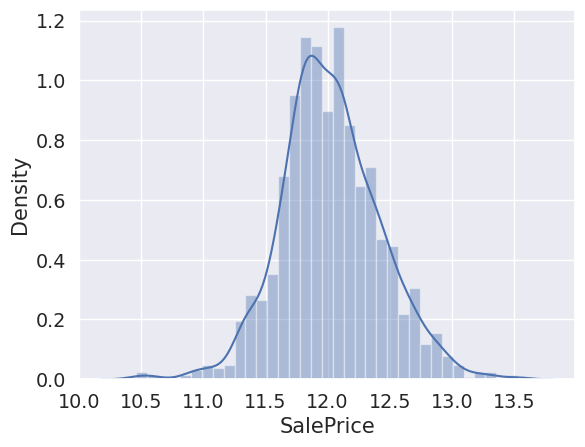

In [151]:
#plot again to check the distribution.
sns.distplot(housing_data['SalePrice'])

Skewness is addressed, and distribution is normal

For further analysis on numerical, categorical data, split the housing data into subsets, of numerical categorical data

In [152]:
housing_data_cat = housing_data.select_dtypes(include=['object'])
housing_data_num = housing_data.select_dtypes(include=['int64','float64'])

In [153]:
#numerical column list
housing_data_num.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [154]:
#categorical column list
housing_data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

- Analysing the categorical columns.

     As there are multiple columns, analysing the categorical columns in different groups.

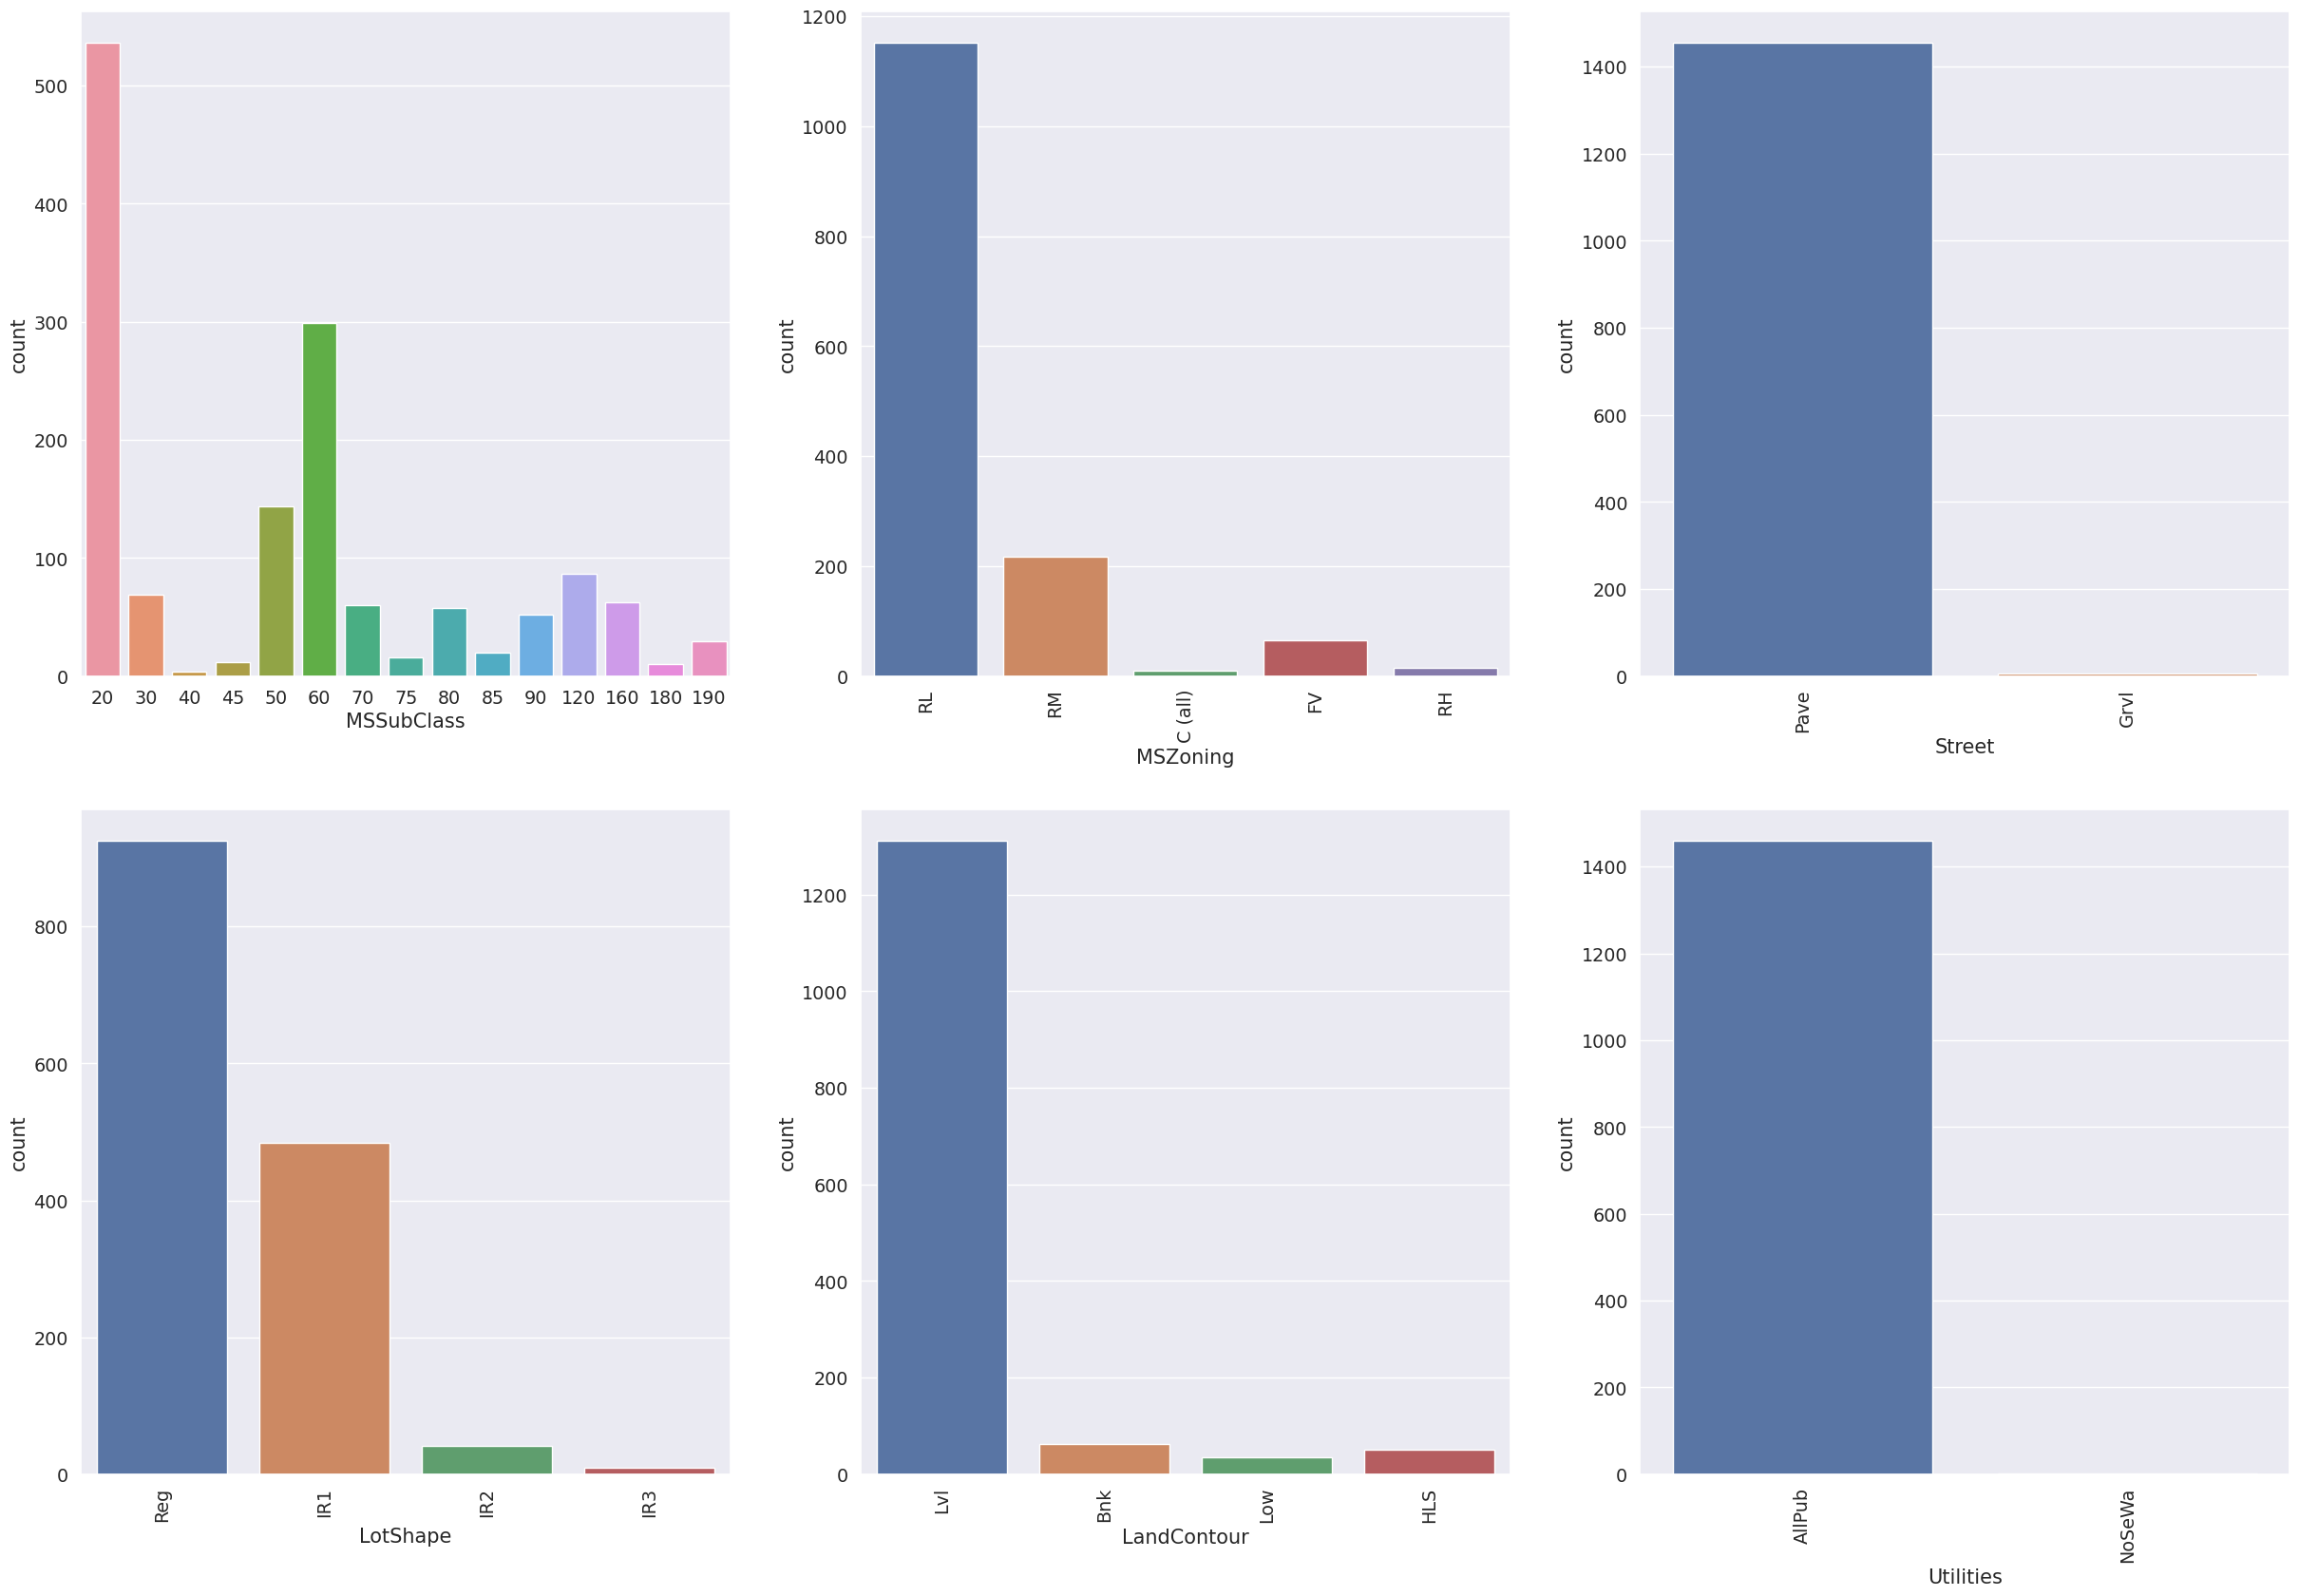

In [155]:
#Categorical data, group1
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='MSSubClass',data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'MSZoning', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'Street', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'LotShape', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'LandContour', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'Utilities',data = housing_data)
plt.xticks(rotation=90)
plt.show()

- `Utilities`, `Street`, `LanContour` column is not equally distributed, and we can see that majority of the values are of single type





In [156]:
#Check for count of uniqure count of 'Utilities' column
housing_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [157]:
#Check for count of unique count of 'Street' column
housing_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [158]:
#Droppping 'Utilities', 'Street' columns
housing_data.drop(['Utilities','Street','LandContour'],axis=1,inplace=True)

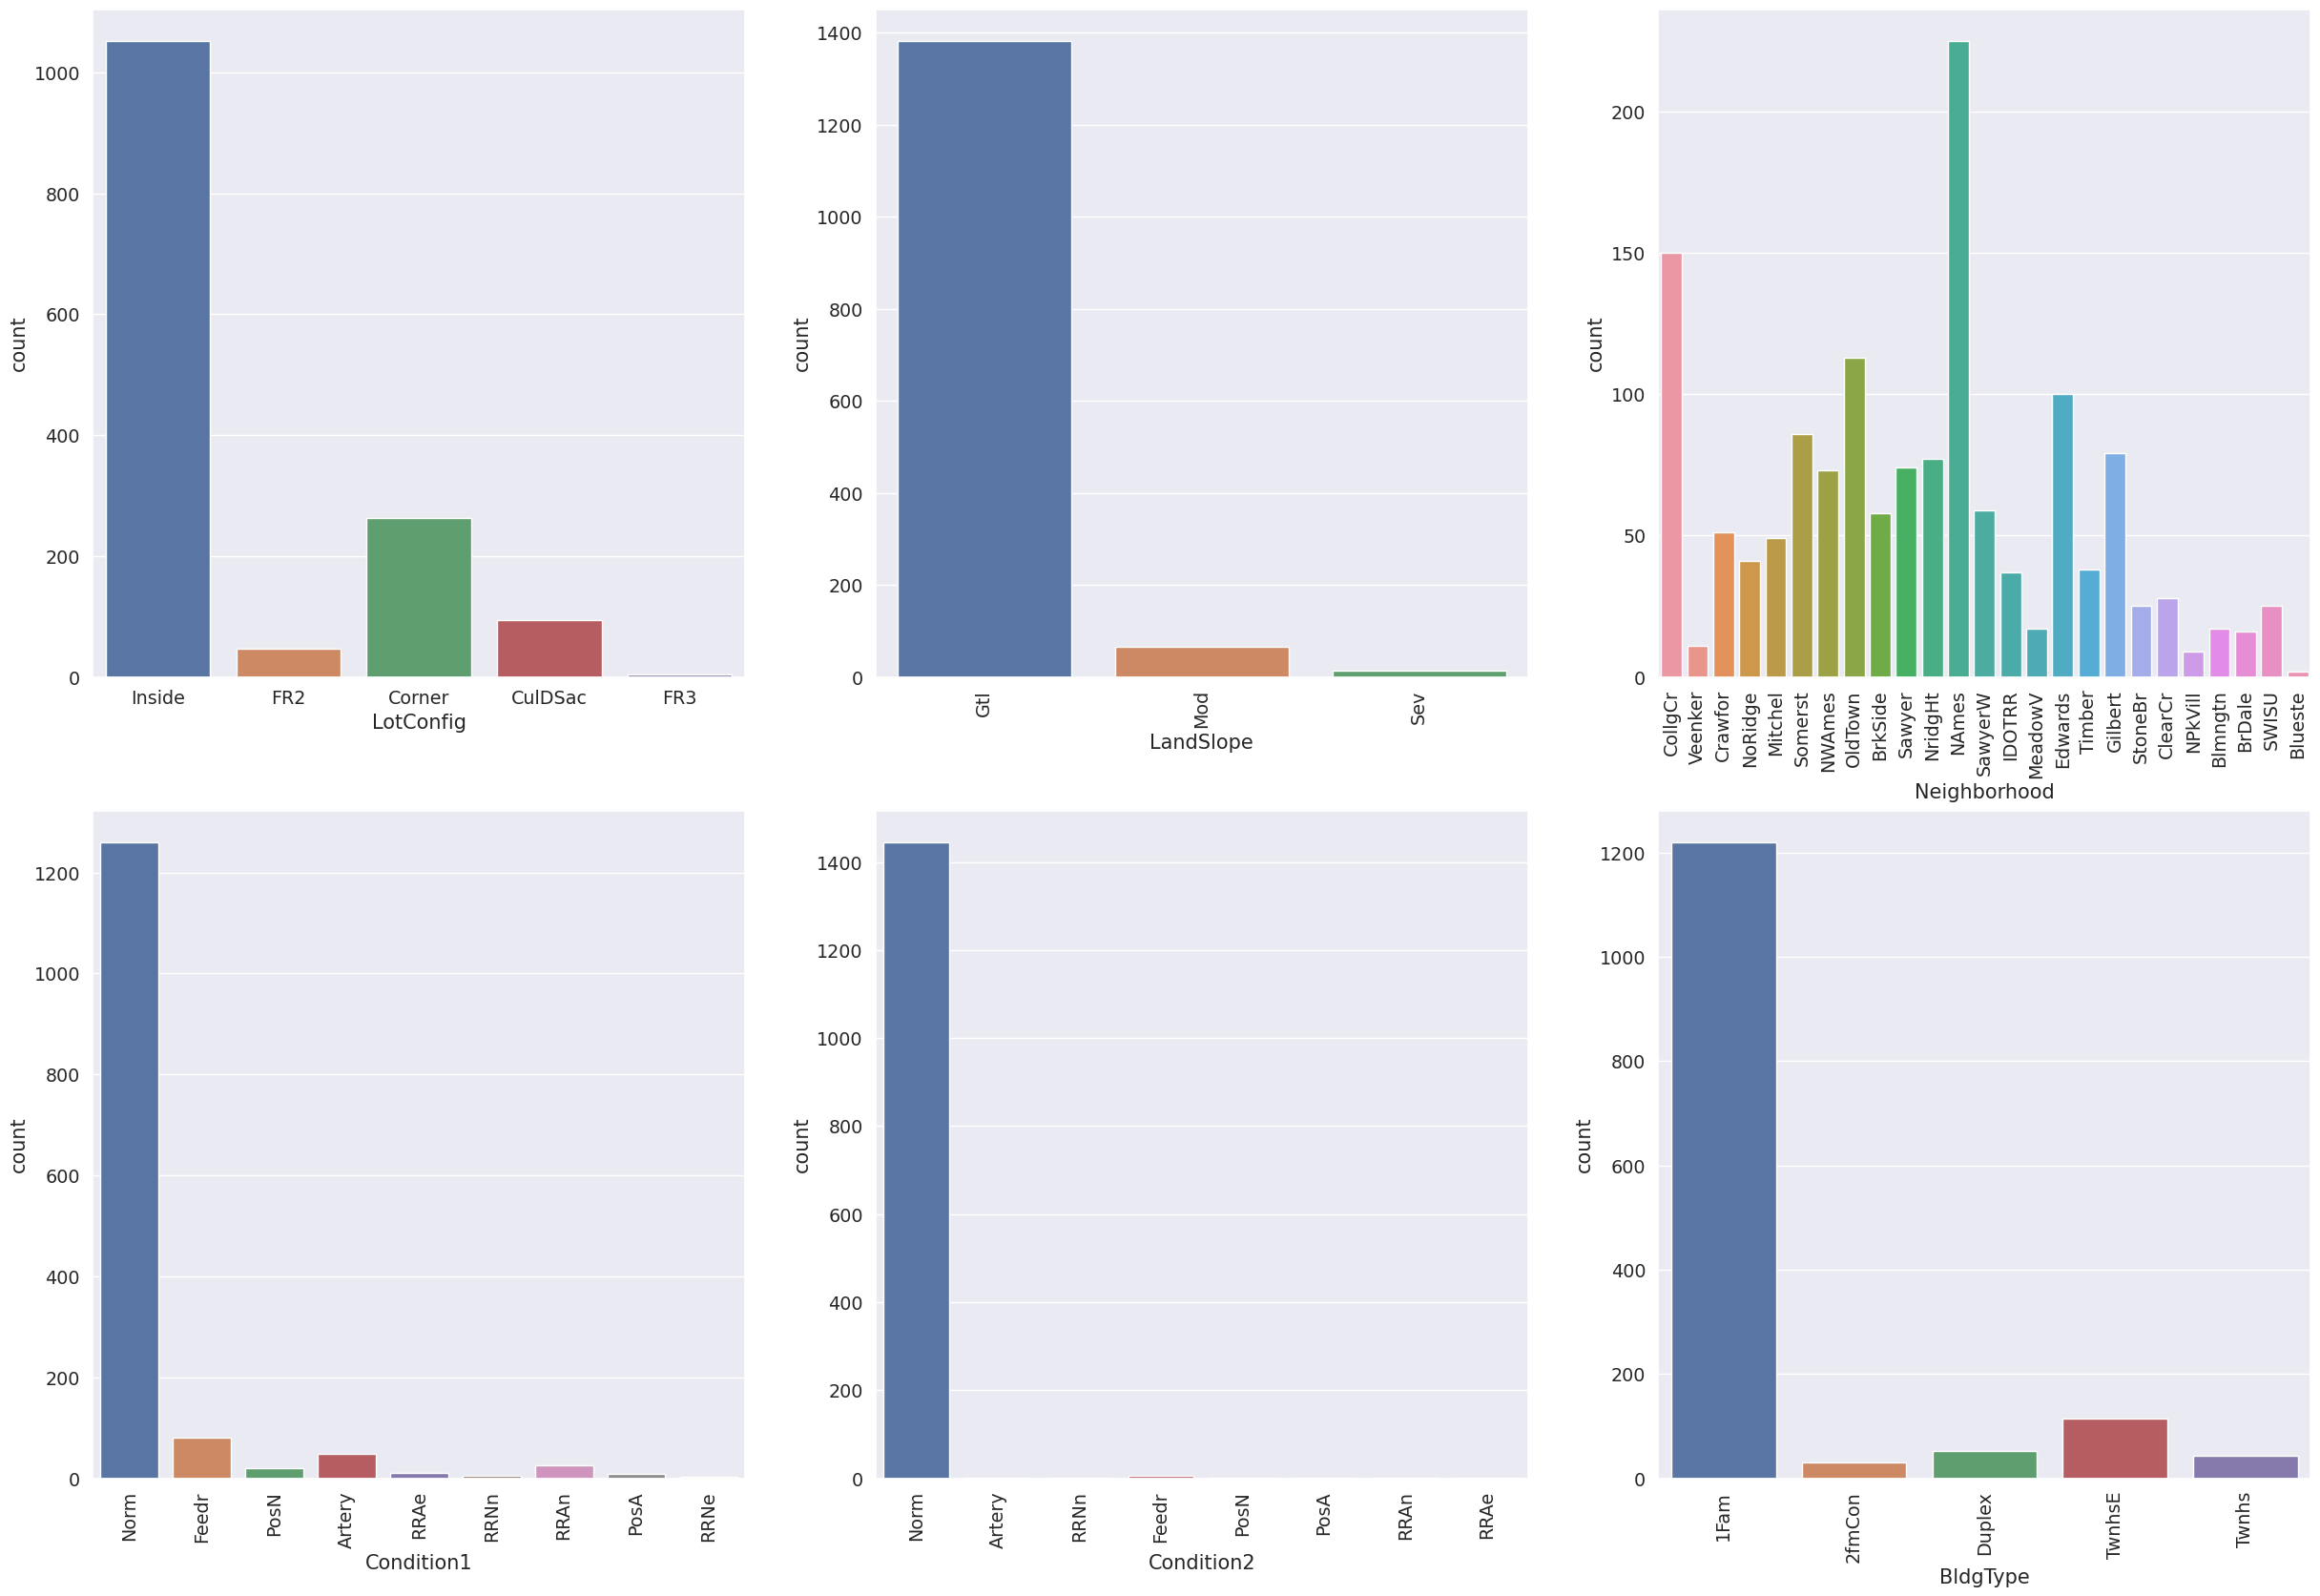

In [159]:
#Categorical data, group2
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='LotConfig', data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood',  data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing_data)
plt.xticks(rotation=90)
plt.show()


- `Condition1`, `Condition2` (Proximity to various conditions) parameters looks to be highly skewed, and majority of the values are of Normal category. Rechecking the count for the same.

In [160]:
#Check for count of unique count of 'Condition1' column
housing_data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [161]:
#Check for count of unique count of 'Condition2' column
housing_data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

As majority of the values are of same type (Normal), dropping this column.

In [162]:
#Droppint 'Condition1','Condition2' column
housing_data.drop(['Condition1','Condition2'],axis=1,inplace=True)

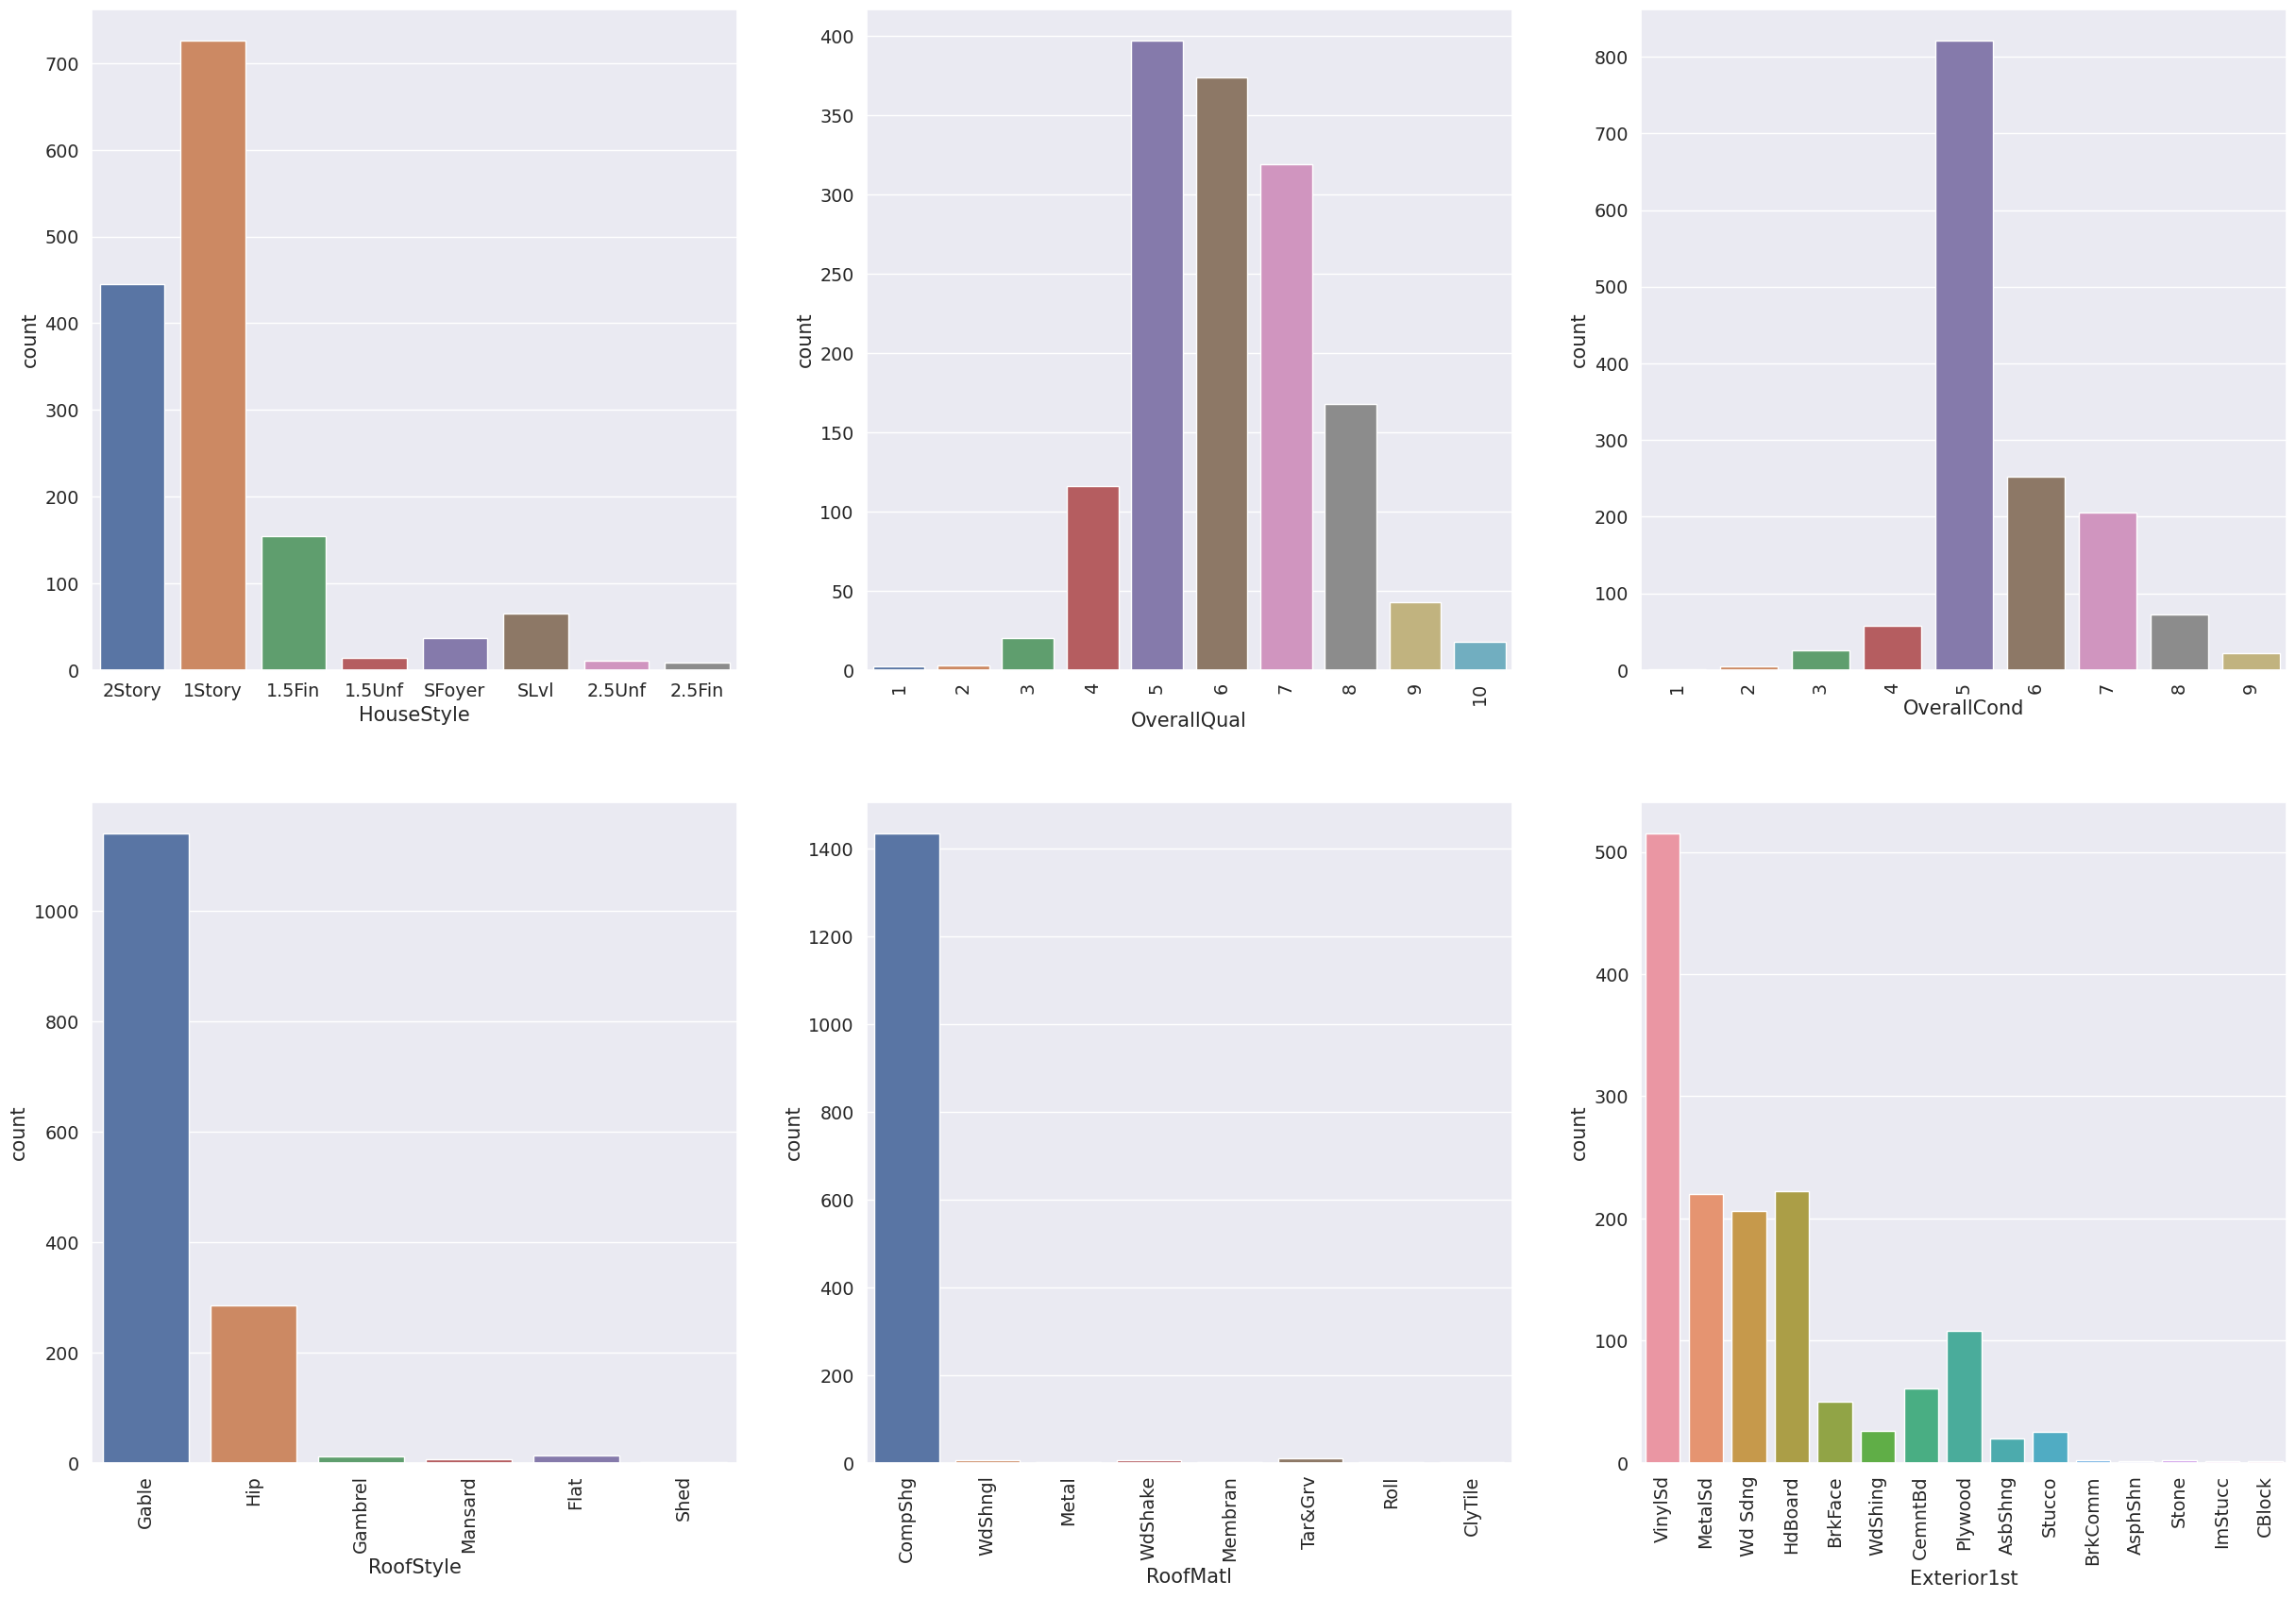

In [163]:
#Categorical data, group3
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='HouseStyle', data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'OverallQual', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'OverallCond',  data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'RoofStyle', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'RoofMatl',data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'Exterior1st', data = housing_data)
plt.xticks(rotation=90)
plt.show()

- From the above countplot it looks `RoofMatl` looks to be skewed. Taking acount of values to confirm.

In [164]:
#Check for count of unique count of 'RoofMatl' column
housing_data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [165]:
#Dropping 'RoofMatl' column
housing_data.drop(['RoofMatl'],axis=1,inplace=True)

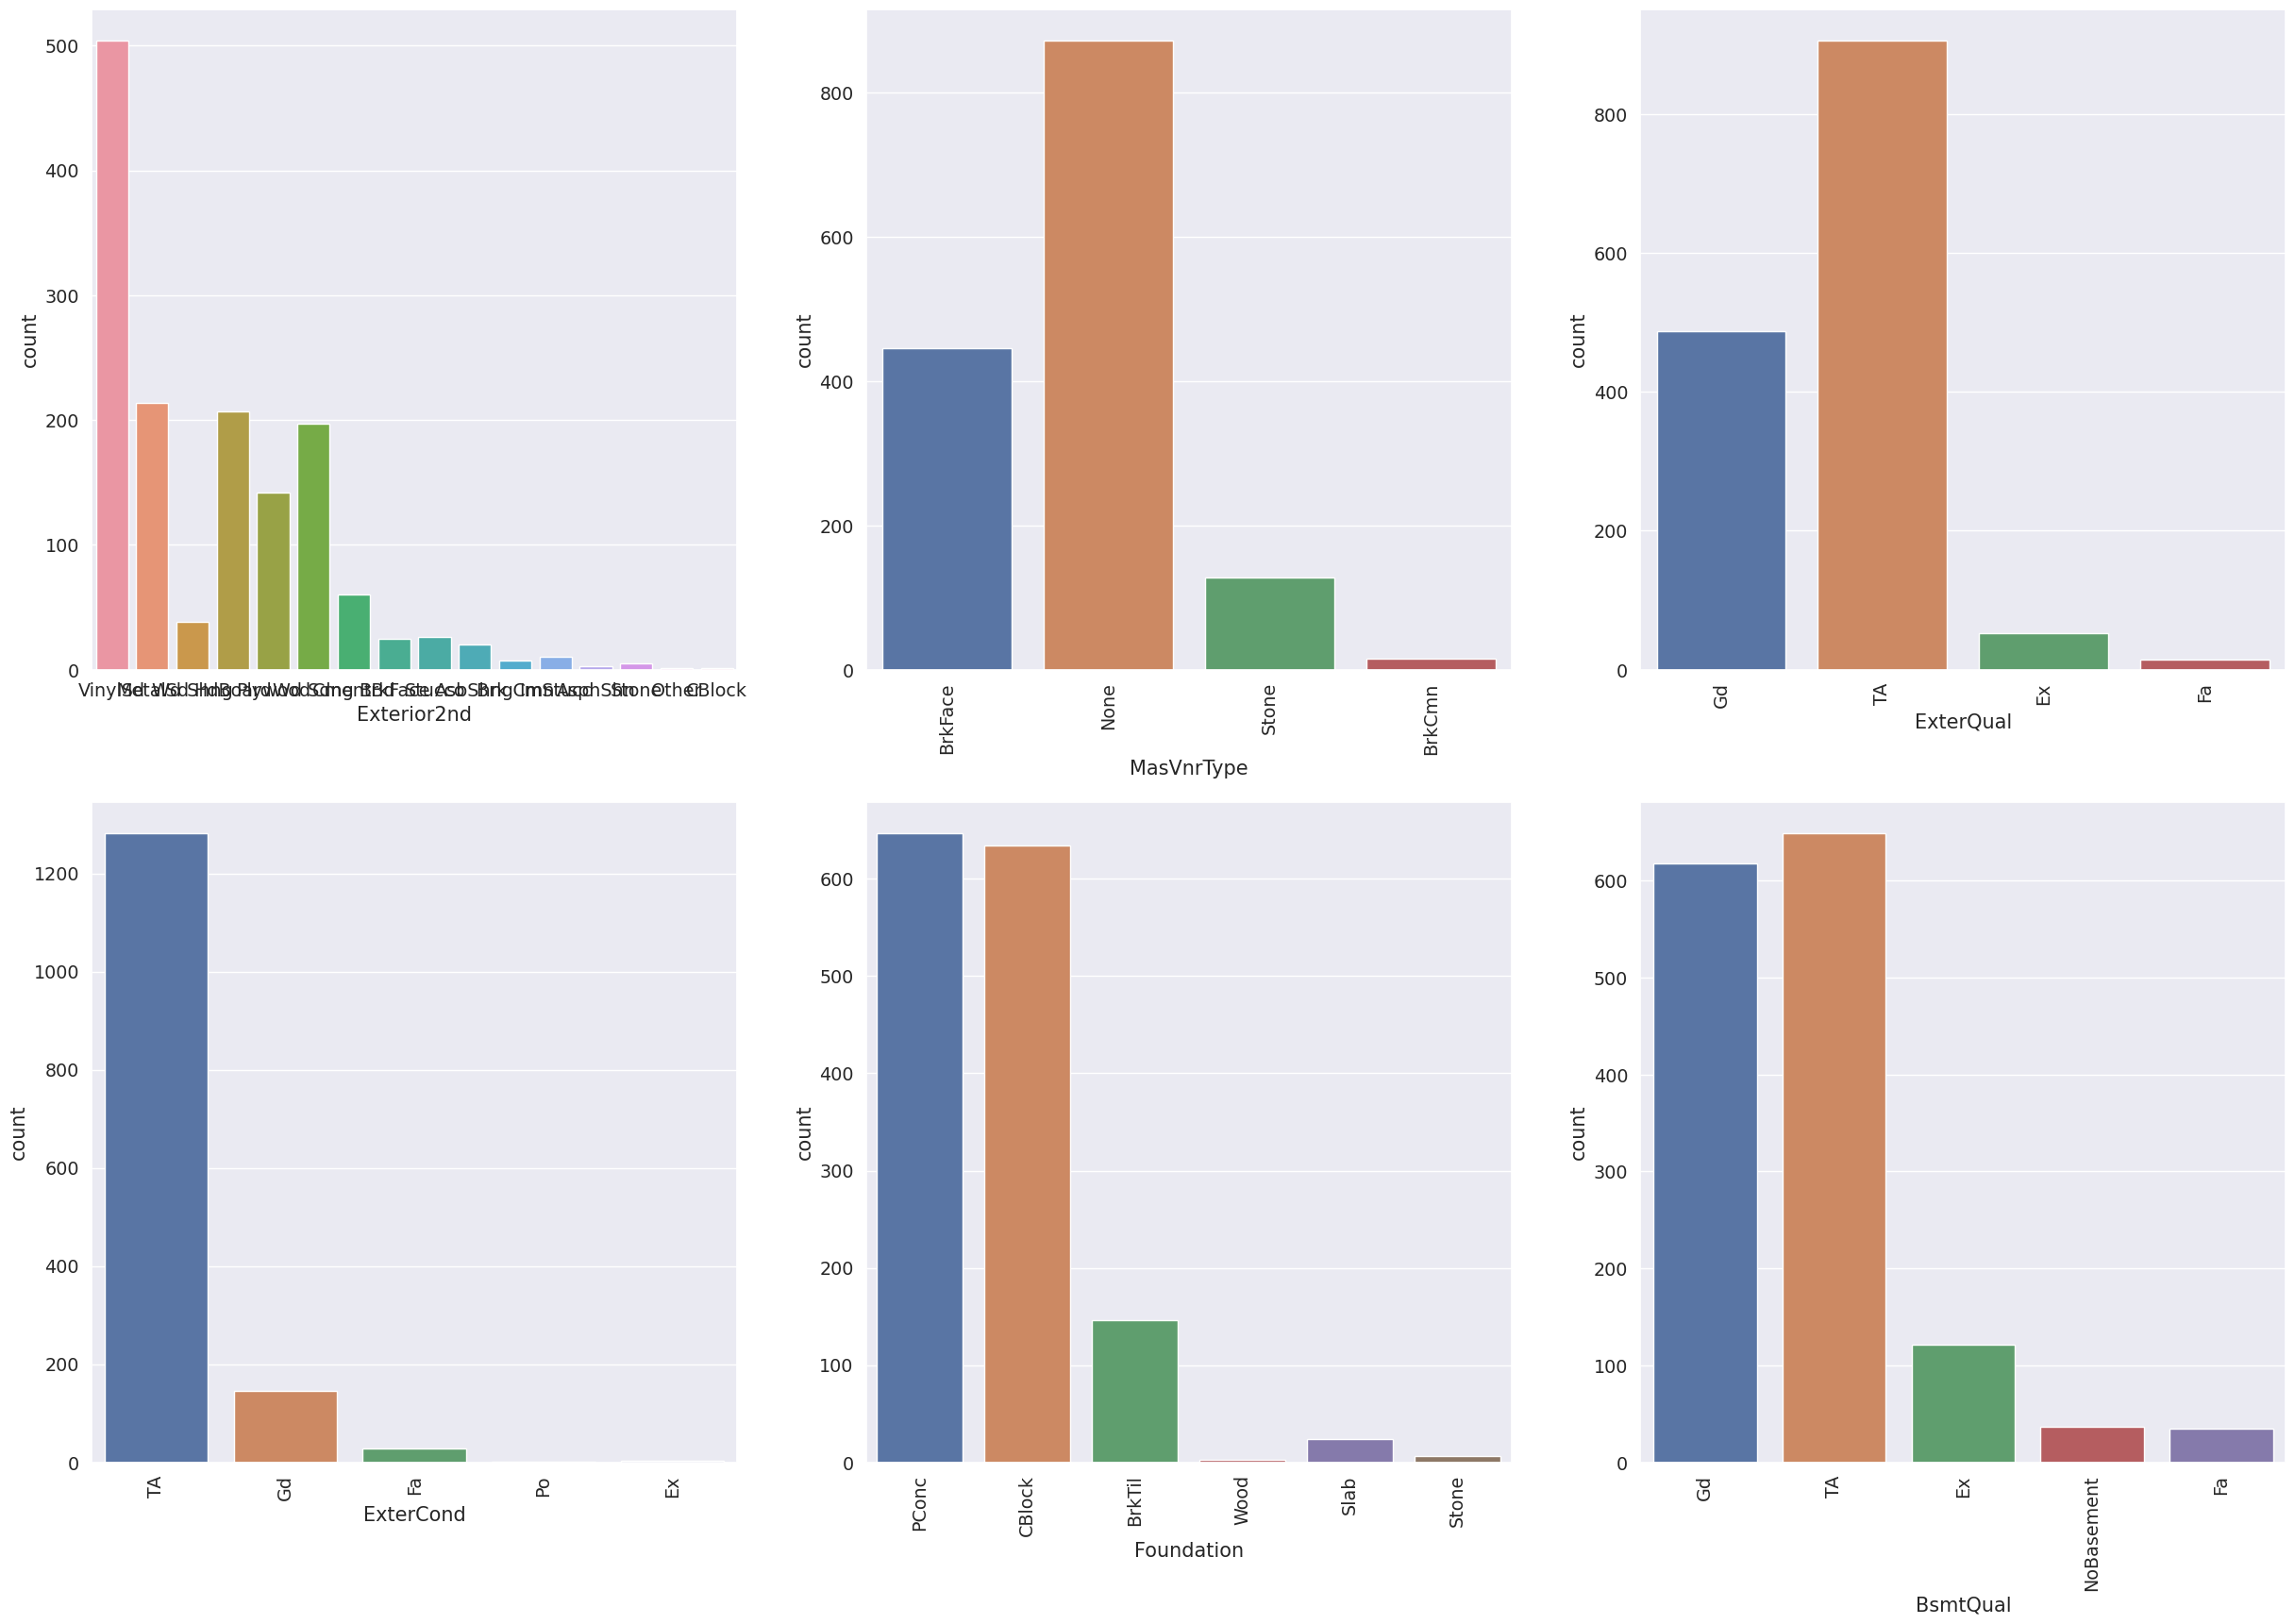

In [166]:
#Categorical data, group3
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='Exterior2nd', data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'MasVnrType', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'ExterQual',  data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'ExterCond', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'Foundation',data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'BsmtQual', data = housing_data)
plt.xticks(rotation=90)
plt.show()

As per the countplot  some of the categories of `ExterCond` column looks to be skewed. 

In [167]:
#Check for unique counts of 'ExterCond' column
housing_data['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [168]:
# Replacing all other columns except 1st 3 columns with Value makring as  'Others' category
housing_data['ExterCond'] = housing_data['ExterCond'].replace(['Fa','Ex','Po'],'Others')

In [169]:
# Dropping 'ExterCond' column
housing_data.drop(['ExterCond'],axis=1,inplace=True)

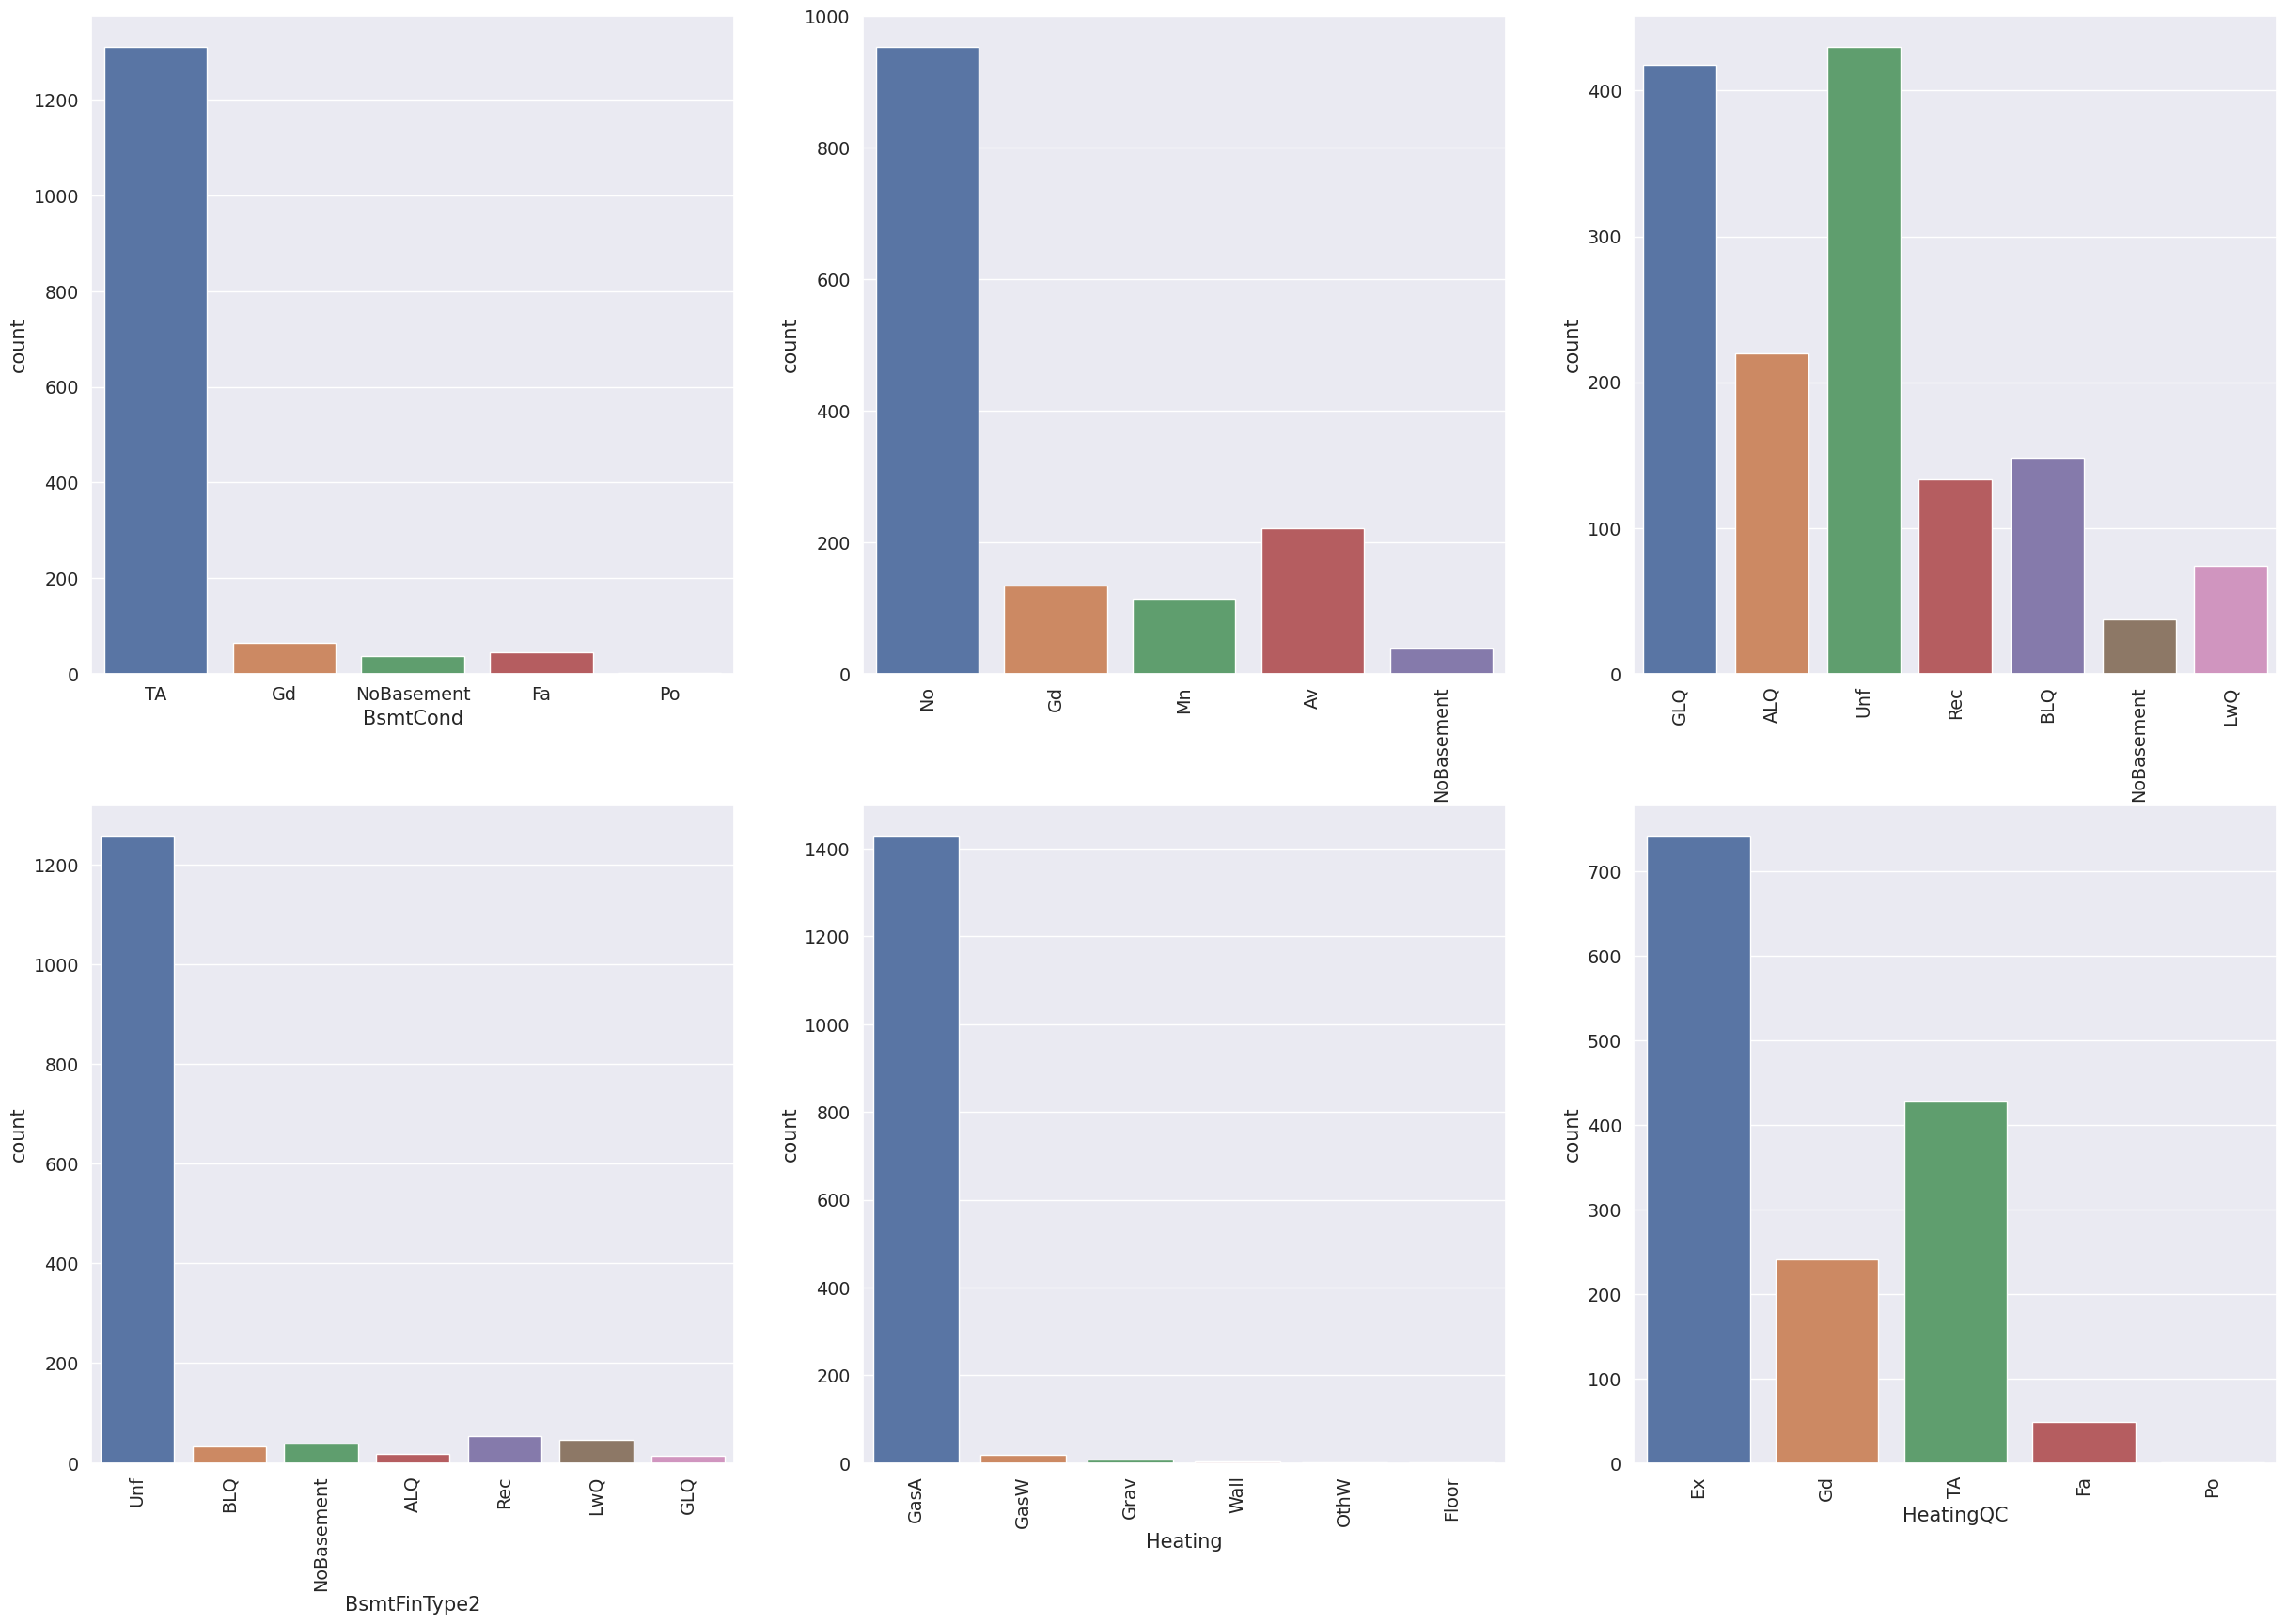

In [170]:
#Categorical data, group4
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='BsmtCond', data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtExposure', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1',  data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType2', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'Heating',data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'HeatingQC', data = housing_data)
plt.xticks(rotation=90)
plt.show()

As per the countplot `Heating` param looks to be skewed

In [171]:
#Check for unique counts of 'Heating' column
housing_data['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [172]:
# Drop 'Heating' Parameter
housing_data.drop(['Heating'],axis=1,inplace=True)

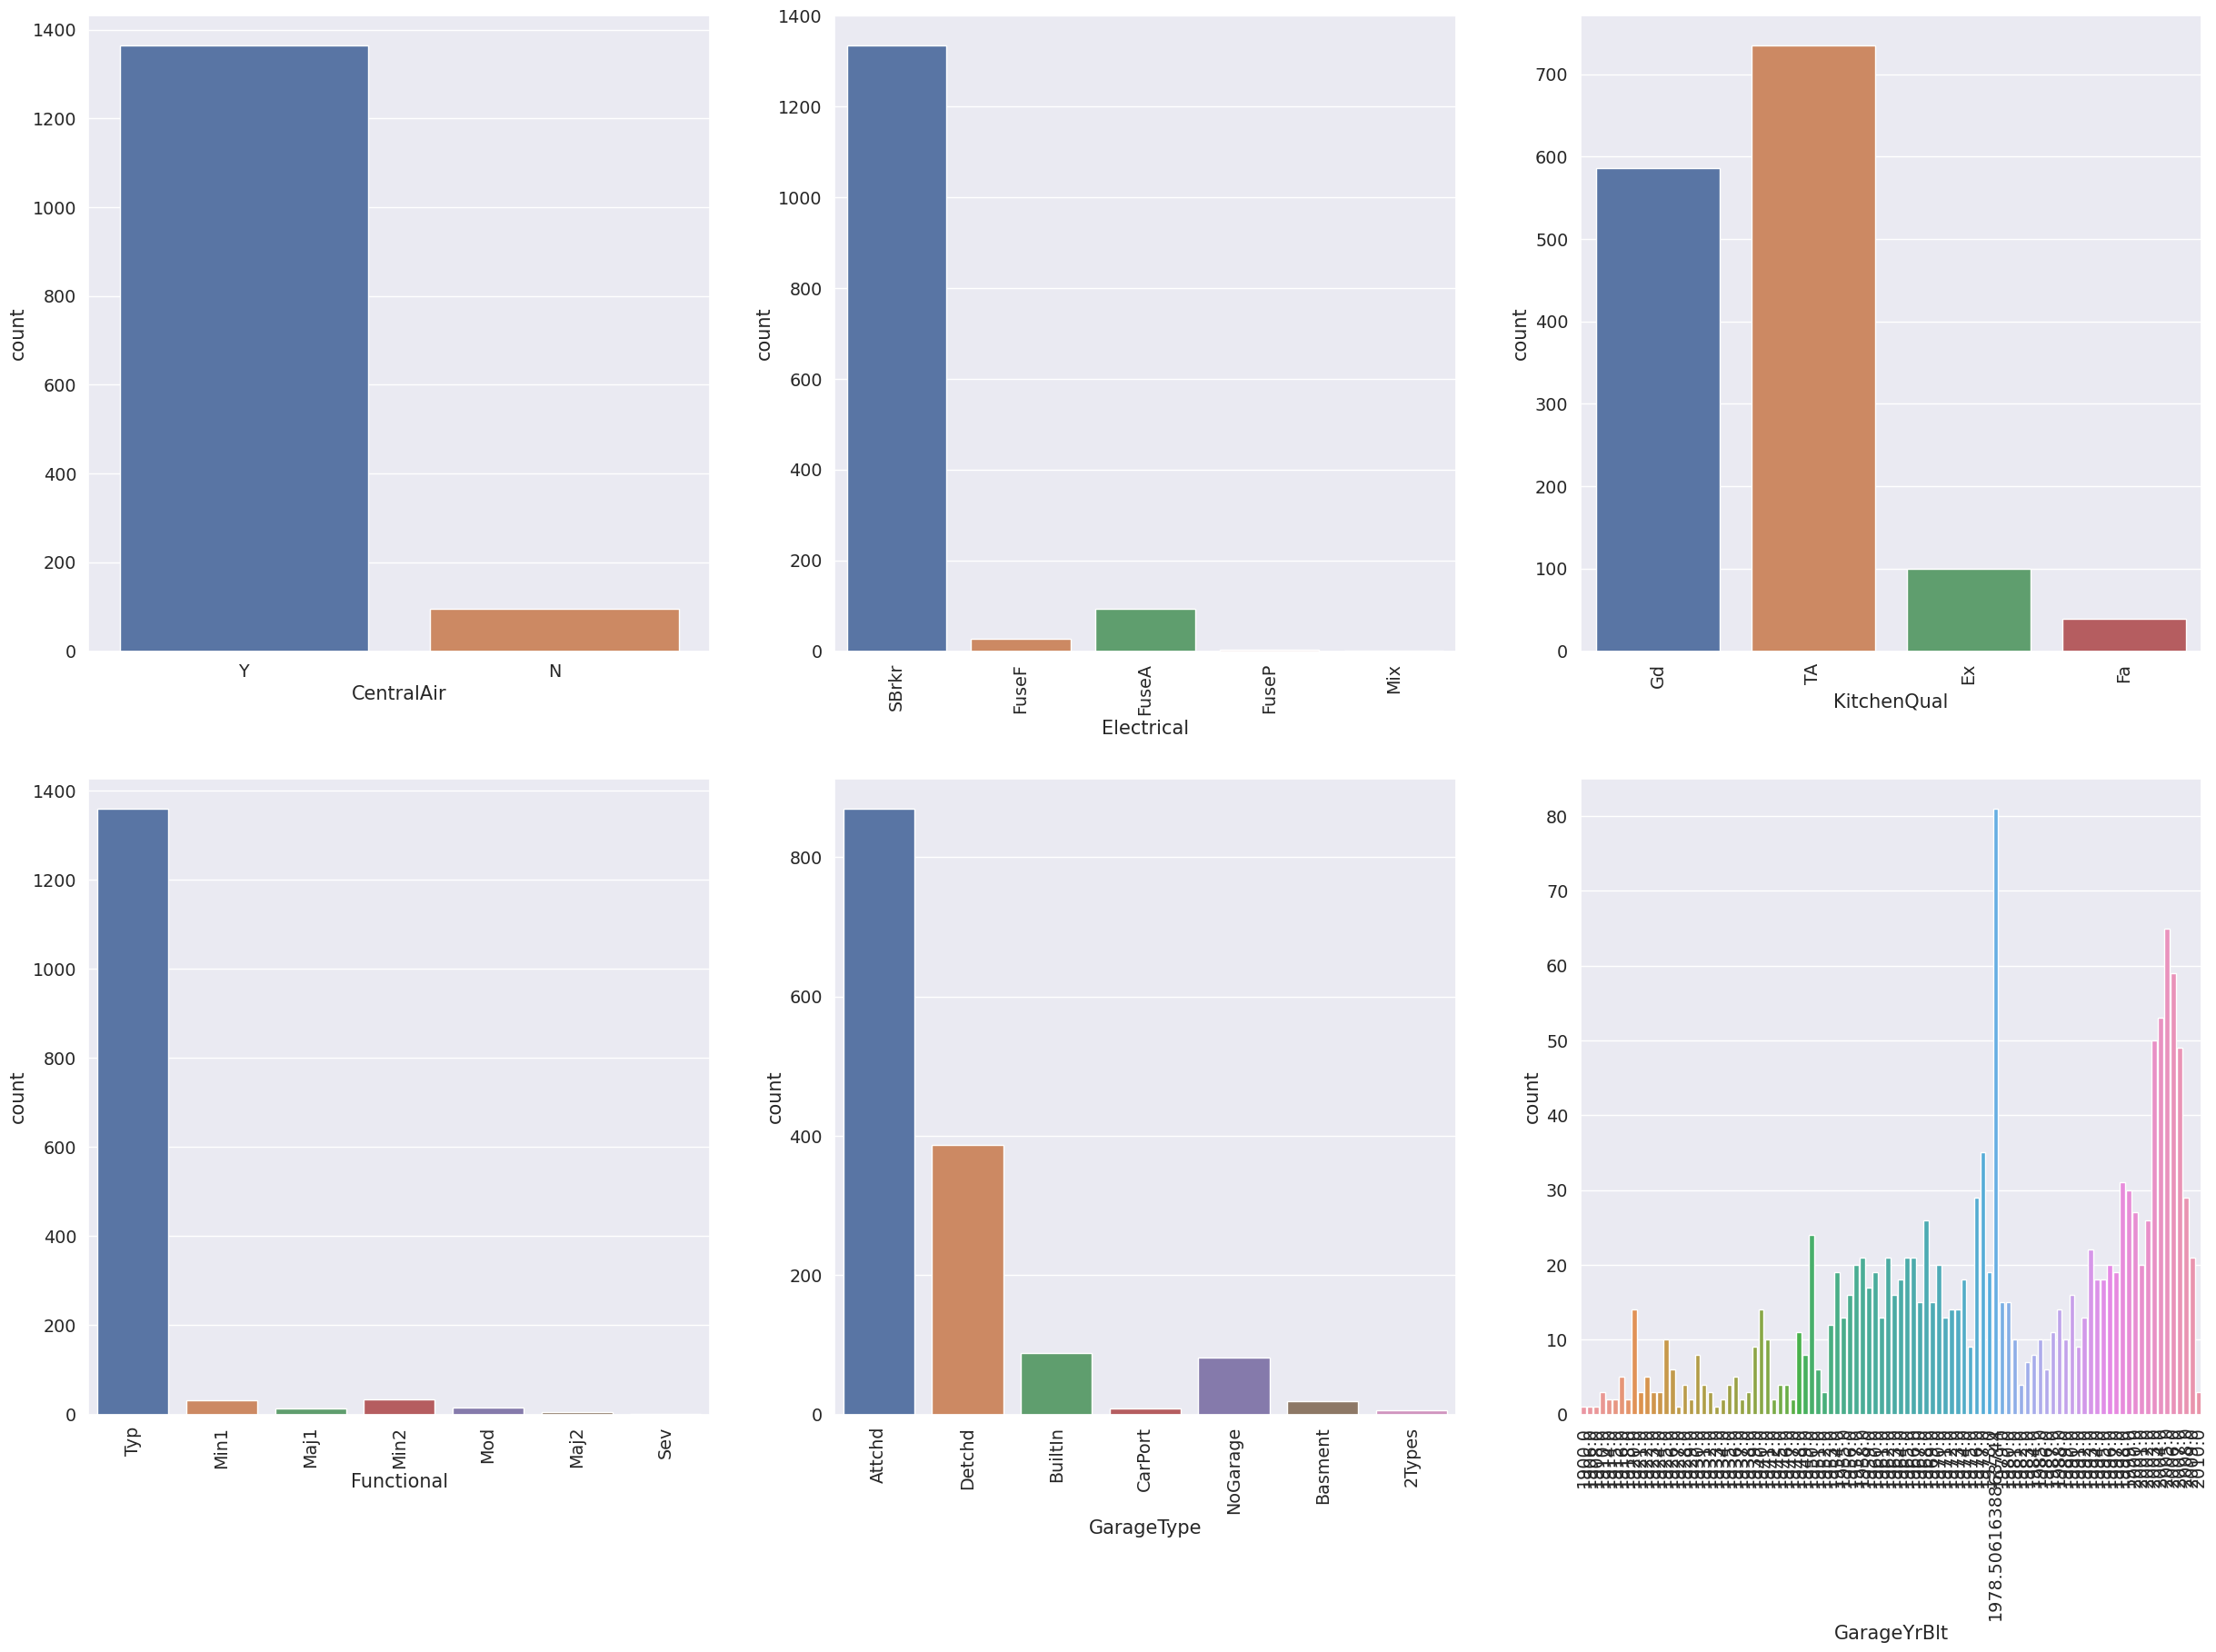

In [173]:
#Categorical data, group5
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='CentralAir', data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'Electrical', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'KitchenQual',  data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'Functional', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'GarageType',data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'GarageYrBlt', data = housing_data)
plt.xticks(rotation=90)
plt.show()

- From the above  countplot, `CentralAir`, `Functional`, `Electrical` columns looks to be skewed

In [174]:
#Check for unique counts of 'CentralAir' column
housing_data['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [175]:
#Check for unique counts of 'Functional' column
housing_data['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [176]:
#Check for unique counts of 'Electrical' column
housing_data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [177]:
# Dropping 'CentralAir'
housing_data.drop(['CentralAir','Functional','Electrical'],axis=1,inplace=True)

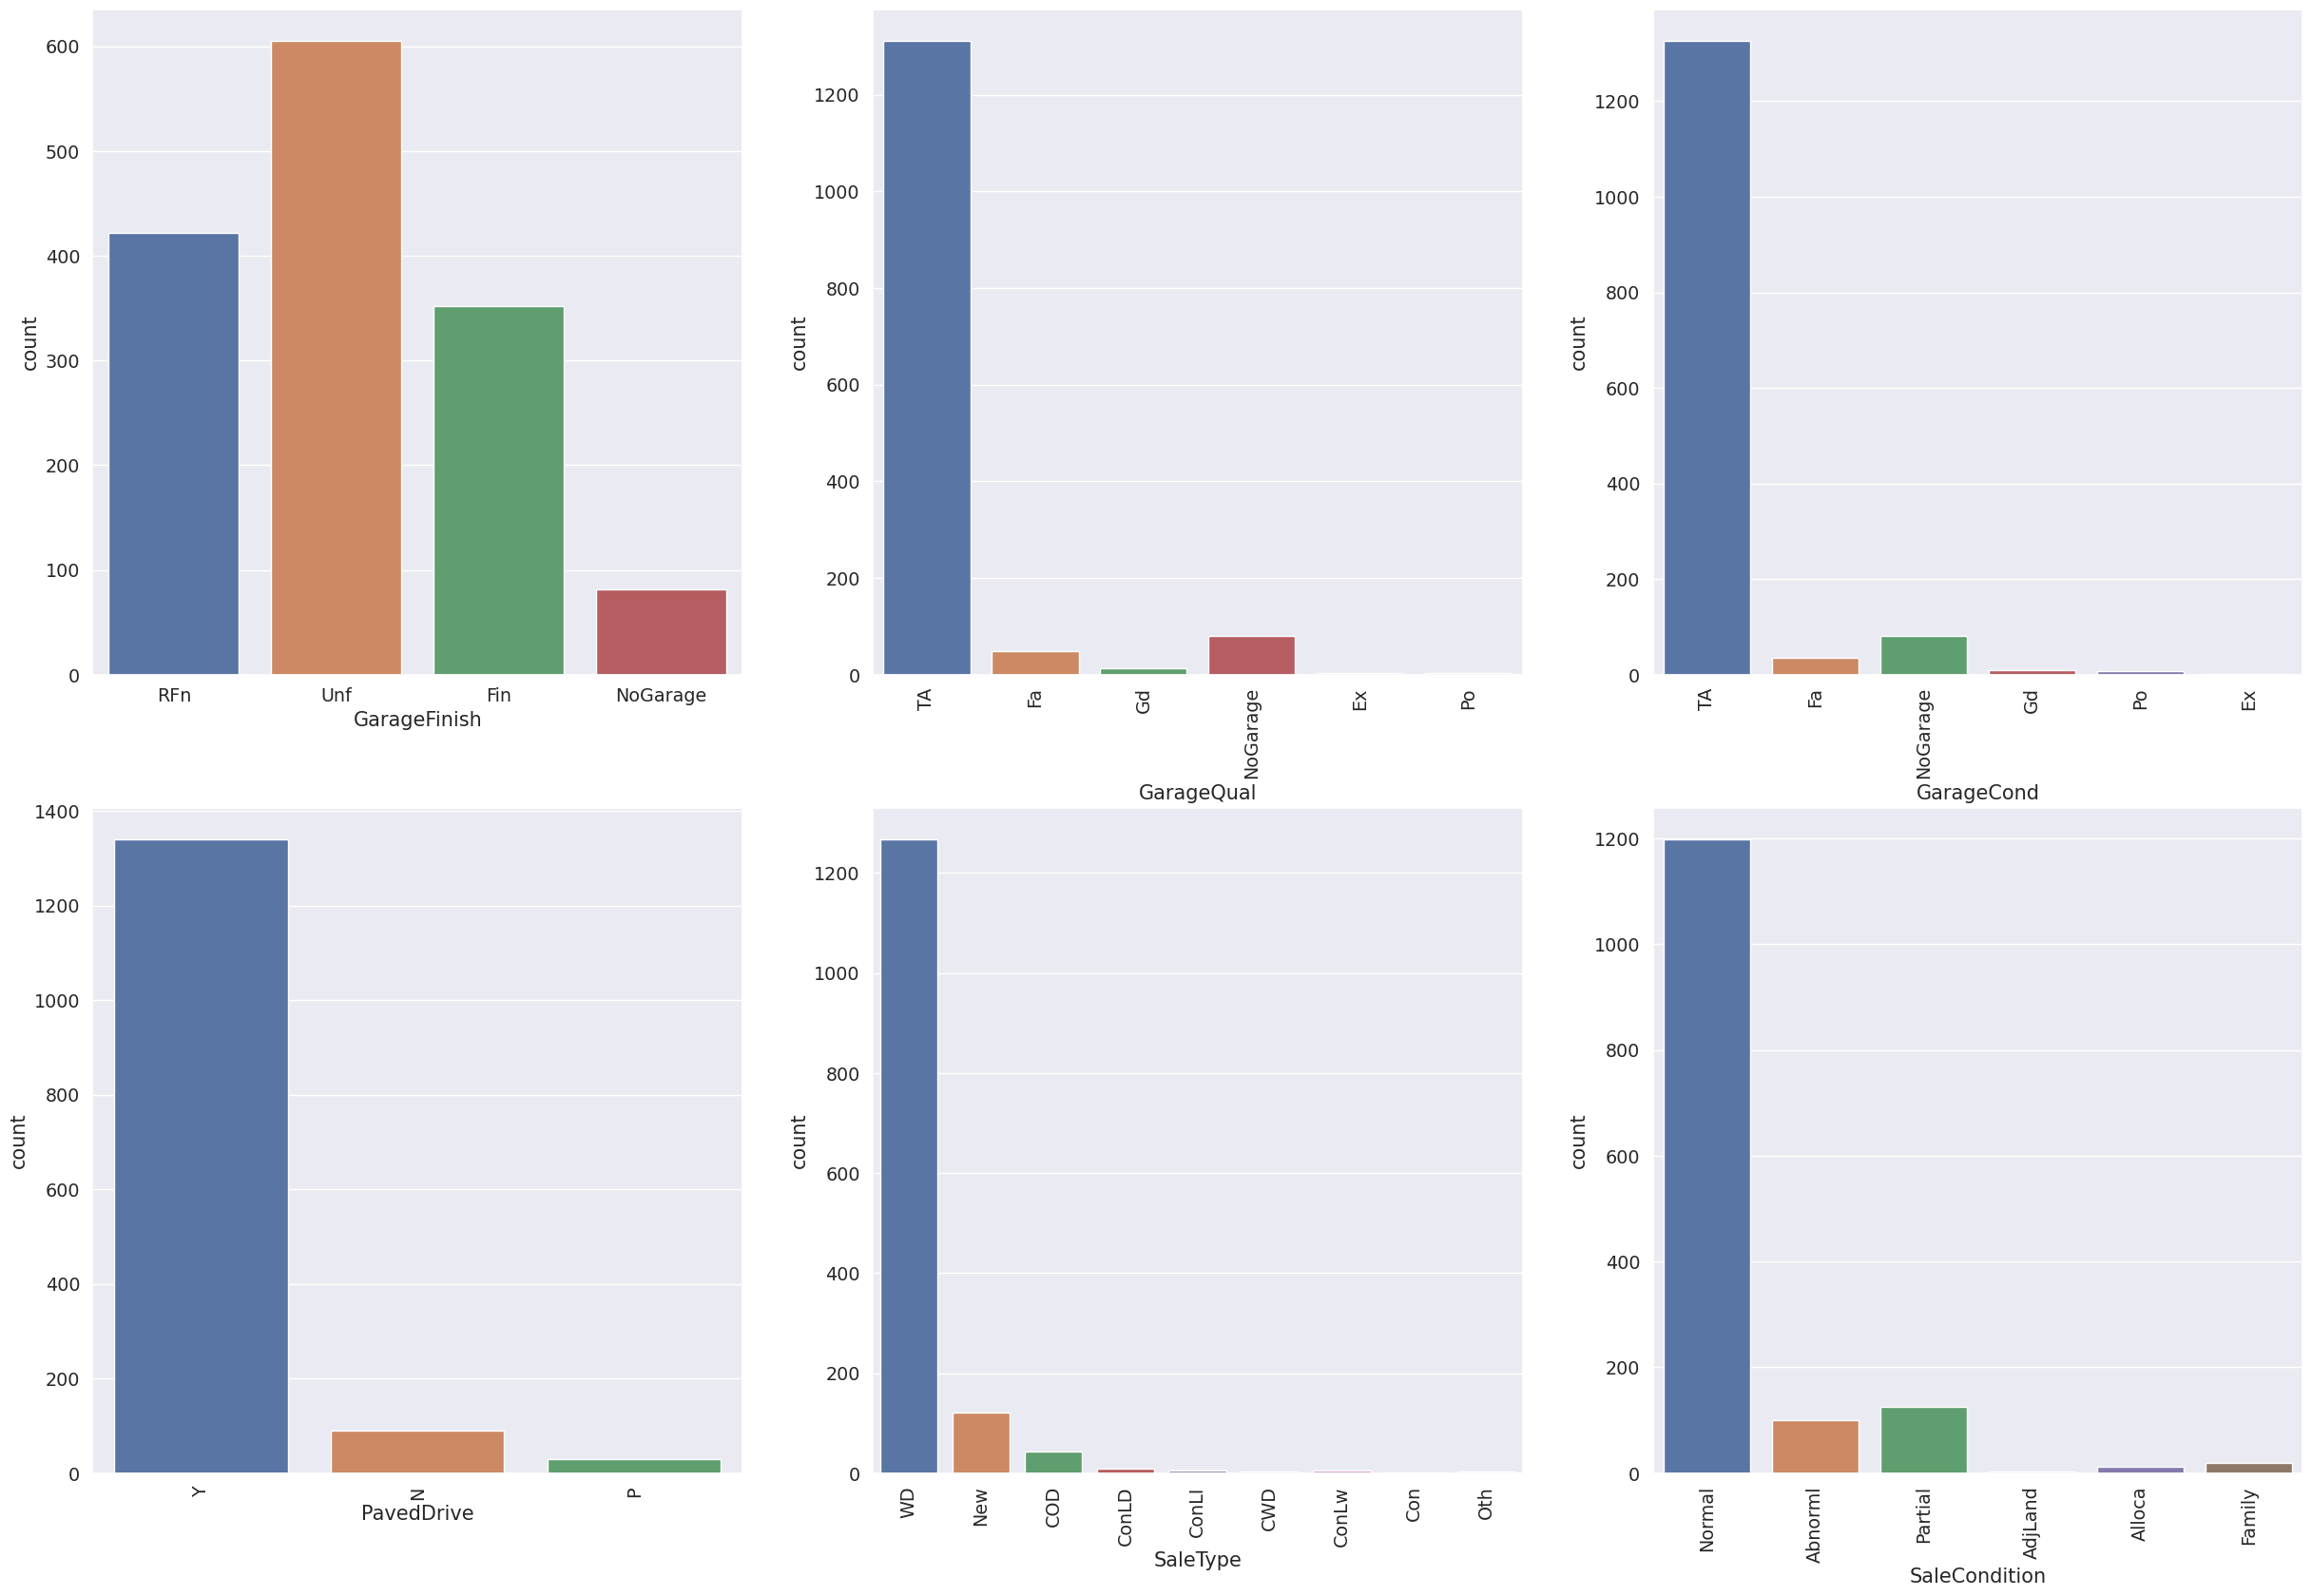

In [178]:
#Categorical data, group6
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.countplot(x ='GarageFinish', data = housing_data)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageQual', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageCond',  data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,4)
sns.countplot(x = 'PavedDrive', data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',data = housing_data)
plt.xticks(rotation=90)

plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing_data)
plt.xticks(rotation=90)
plt.show()

- For Some of the columns like `SaleCondition`, there are some of the categories with very minimal number of occurances / skewed values.
For `GarageCondition`, `GarageQual`, `SaleType`, `PavedDrive` except one column, all others are skewed.

In [179]:
#Dropping GarageQual, GarageCond, PavedDrive as these values are skewed.
housing_data.drop(['GarageQual','GarageCond','PavedDrive','SaleType'],axis=1,inplace=True)

In [180]:
#Check  unique counts of 'SaleCondition' column
housing_data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [181]:
# Replacing all other columns except 1st 3 columns with Value makring as  'Others' category
housing_data['SaleCondition'] = housing_data['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

- Analysing the numerical columns

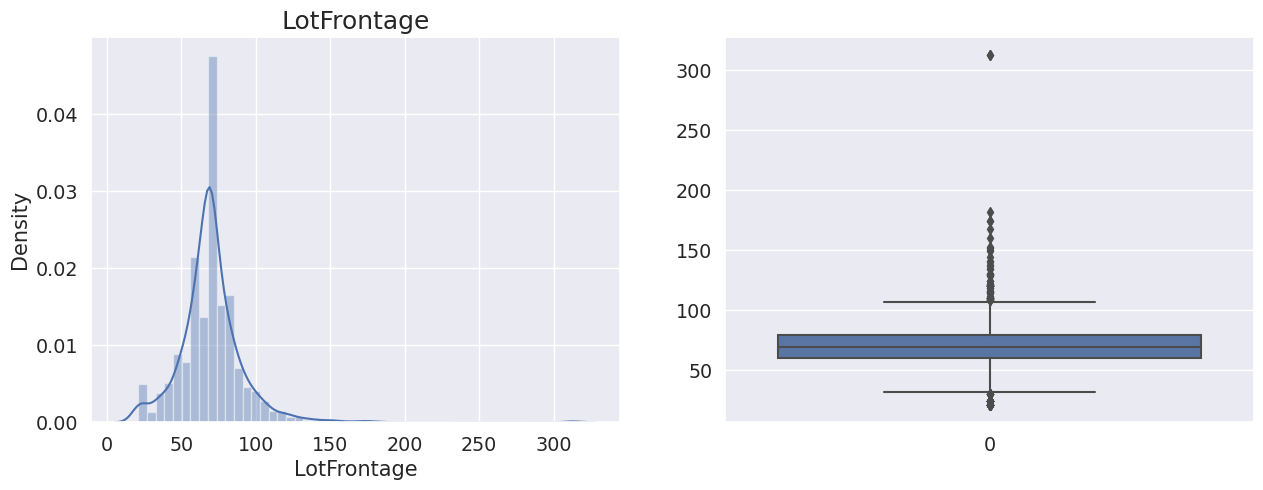

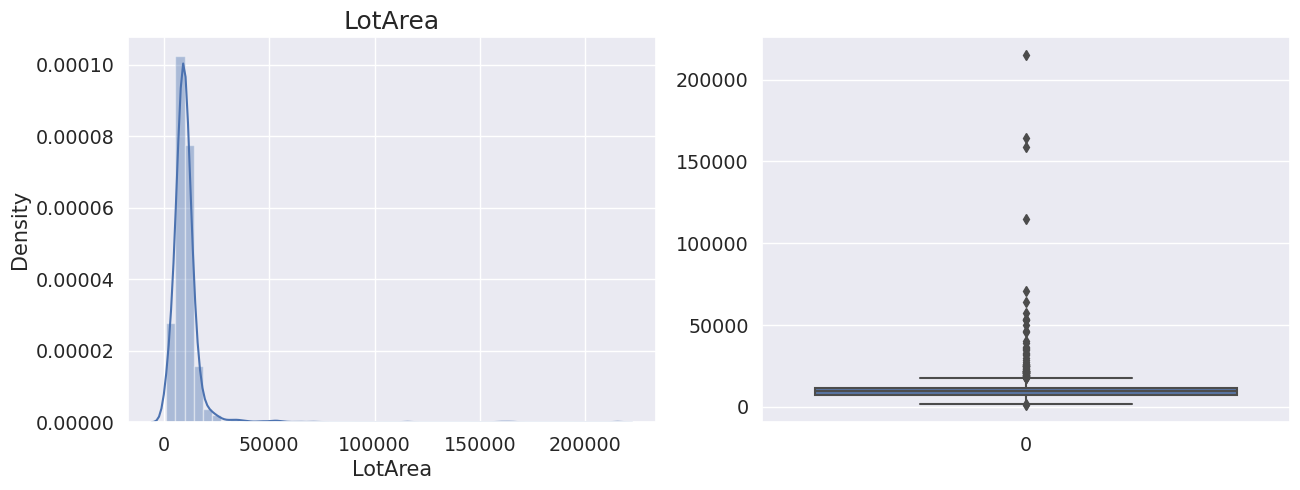

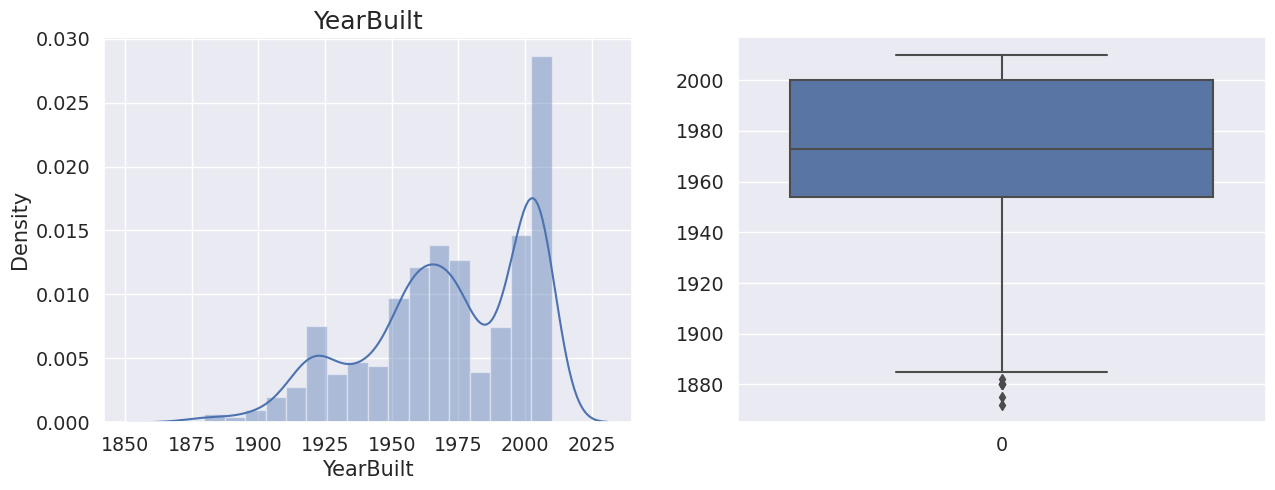

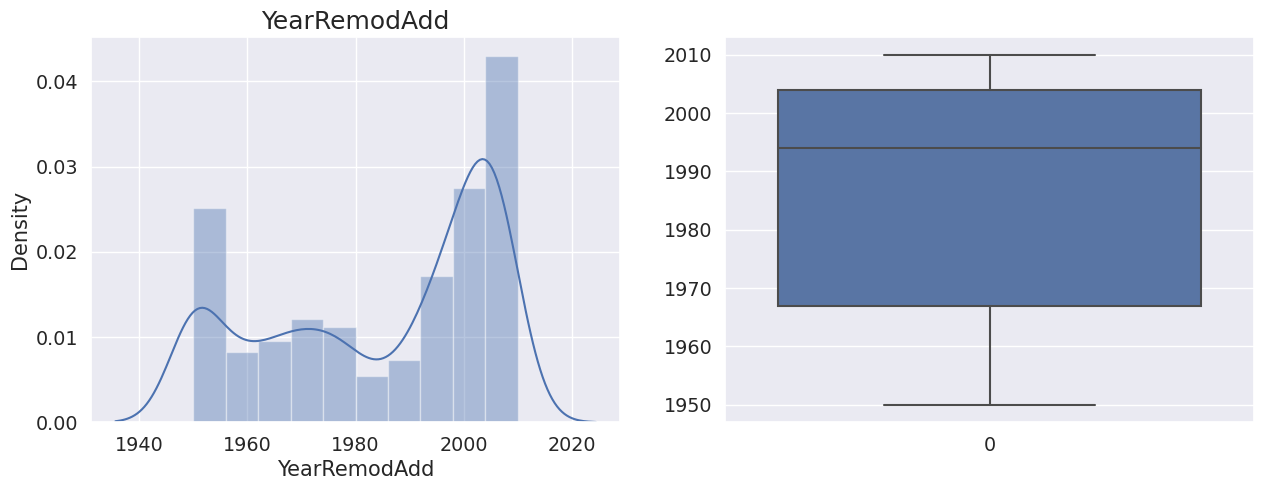

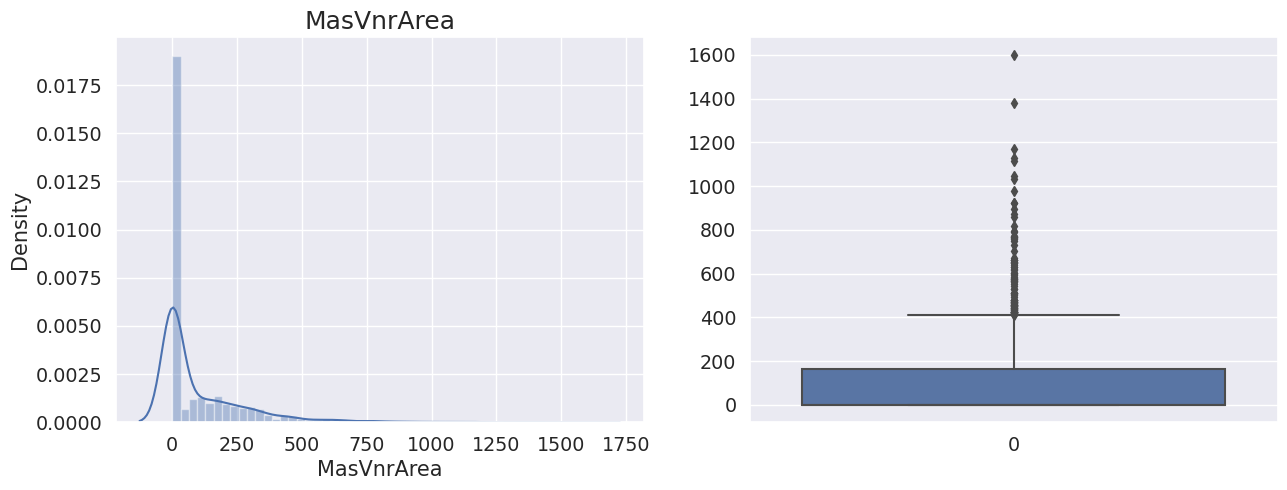

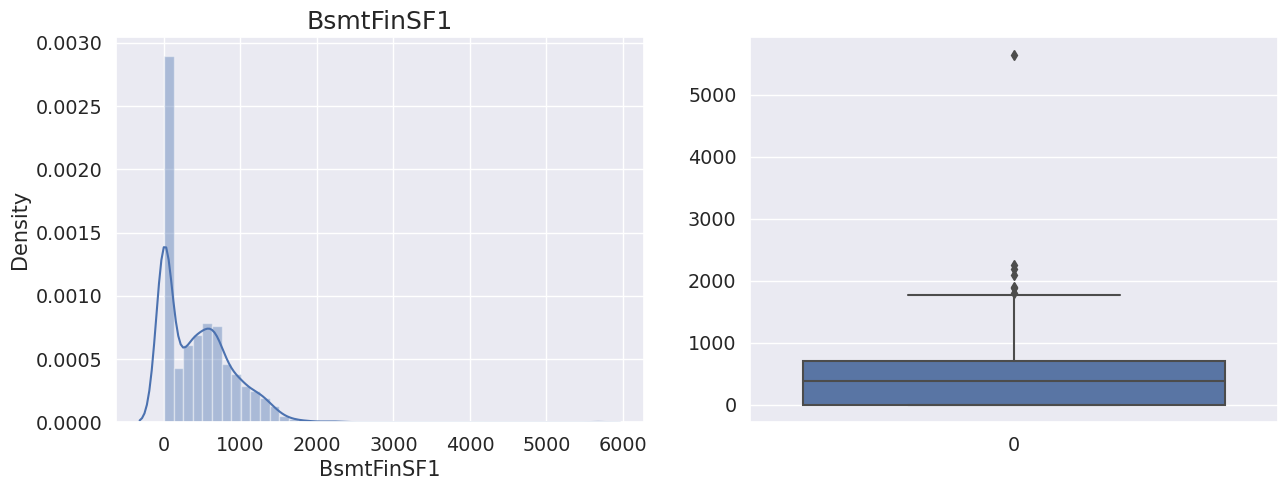

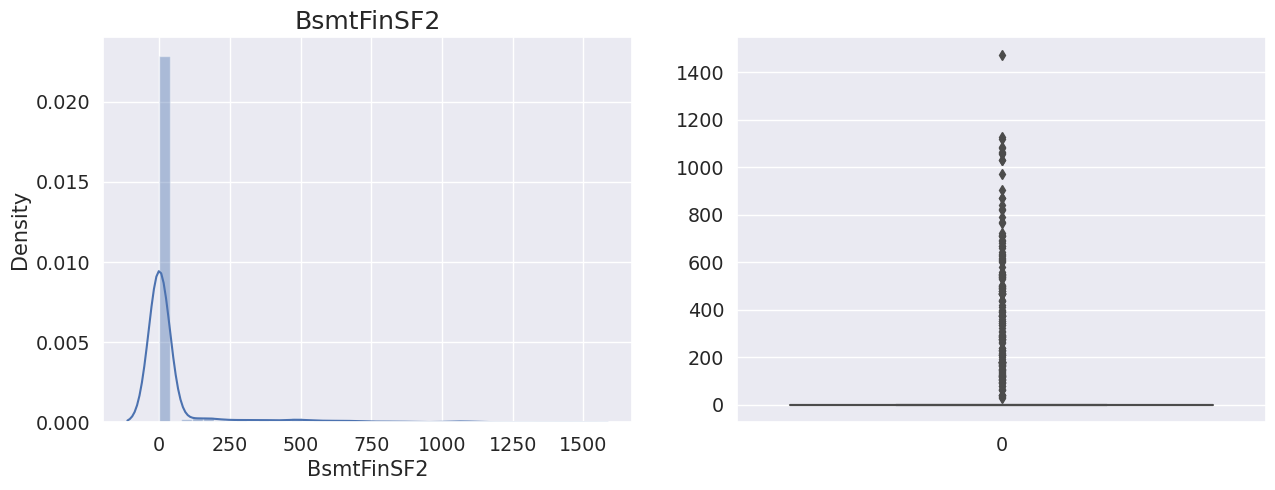

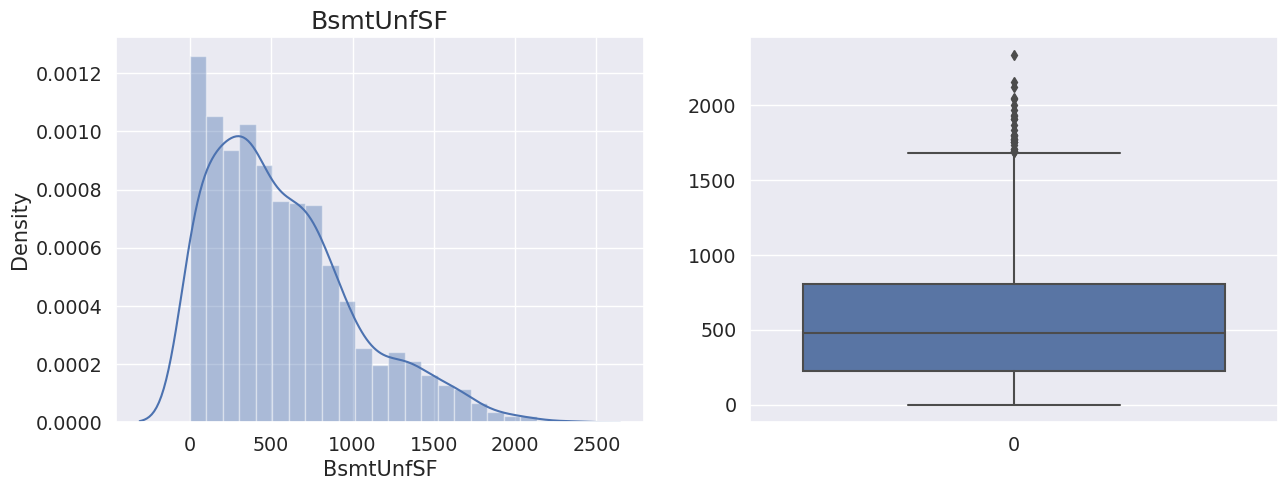

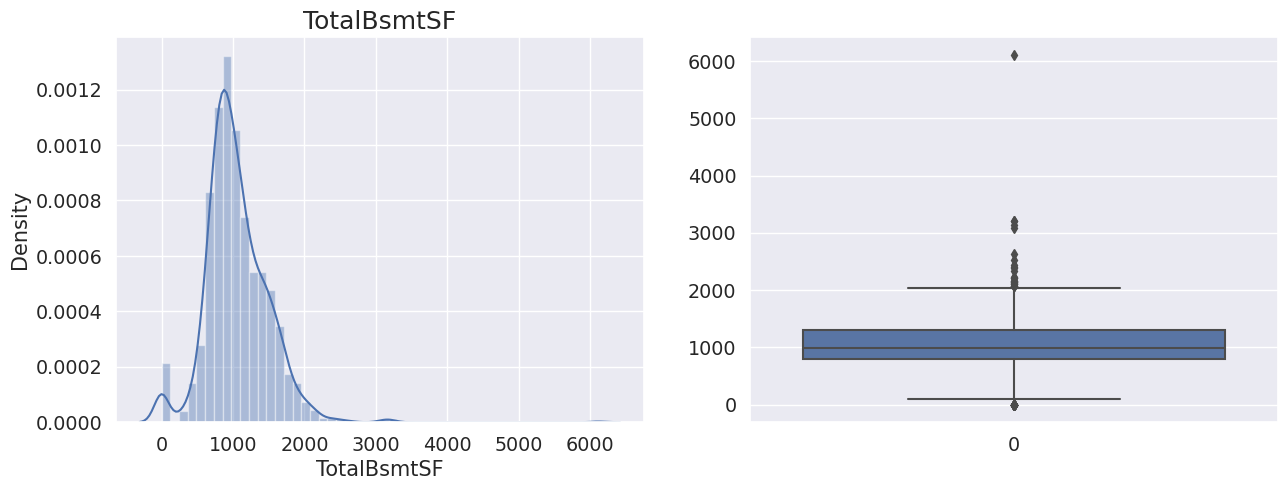

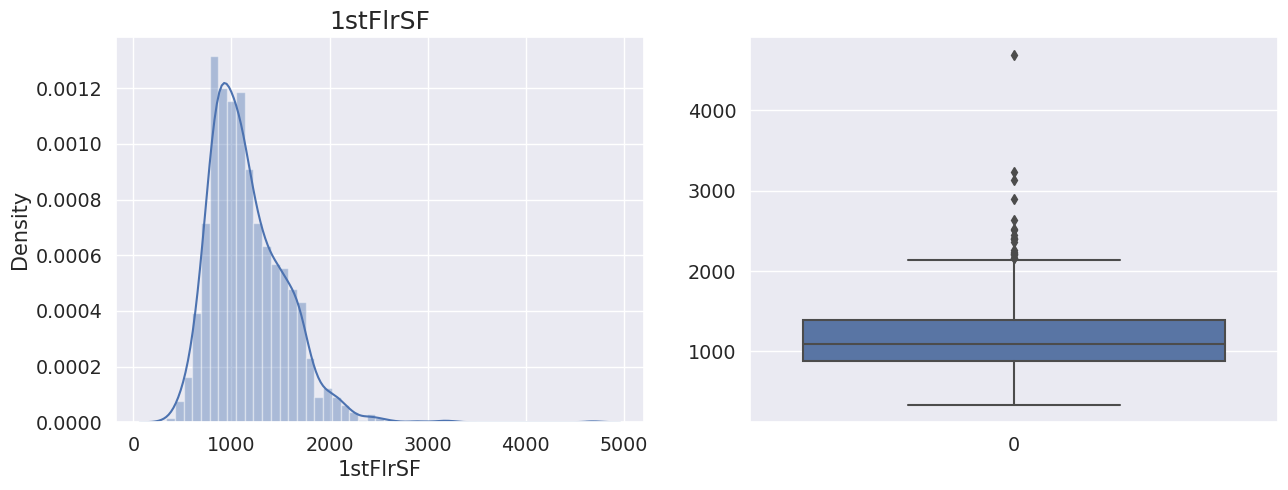

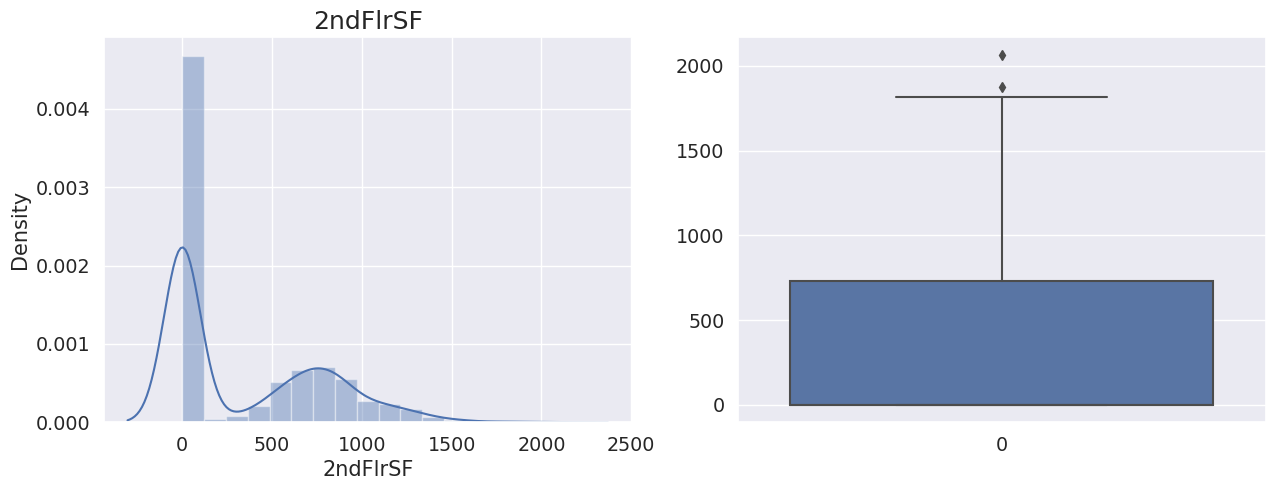

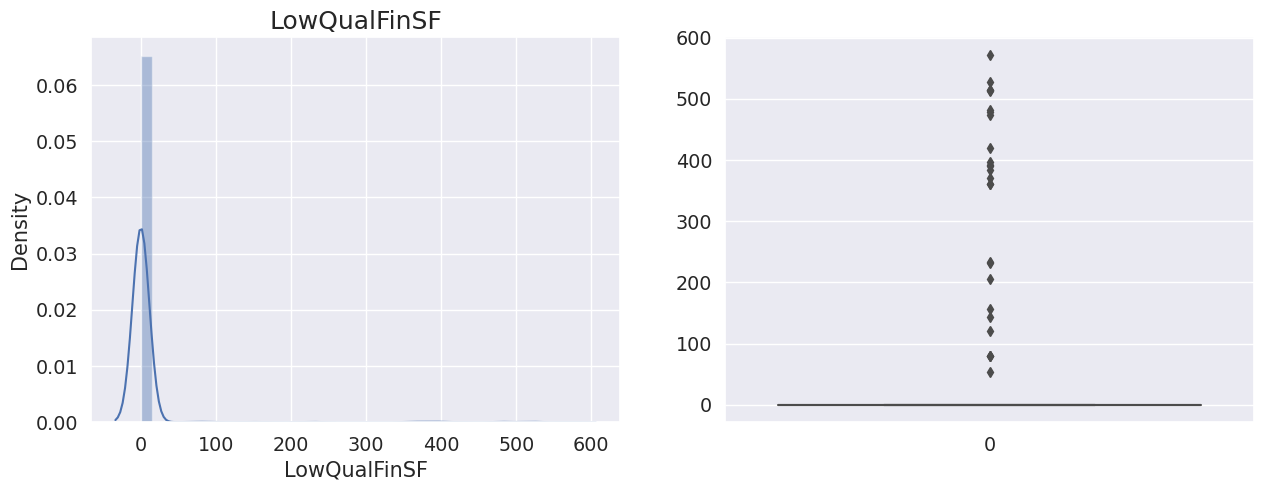

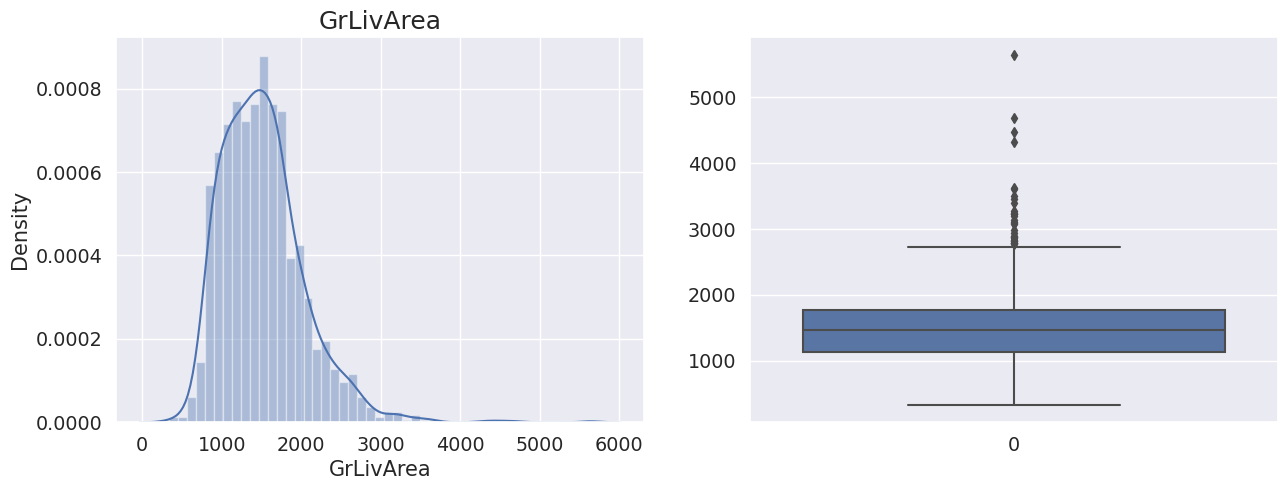

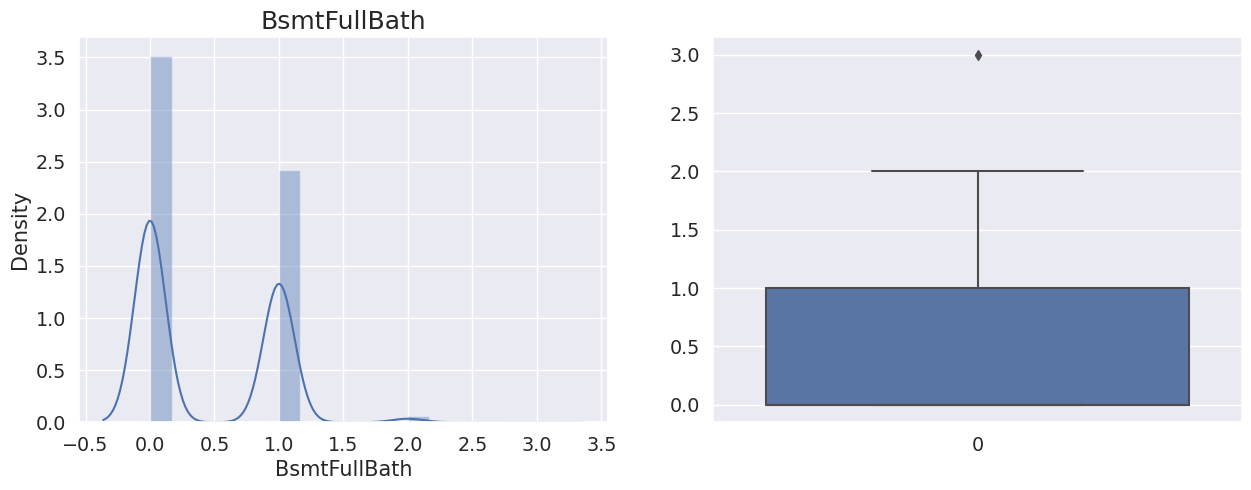

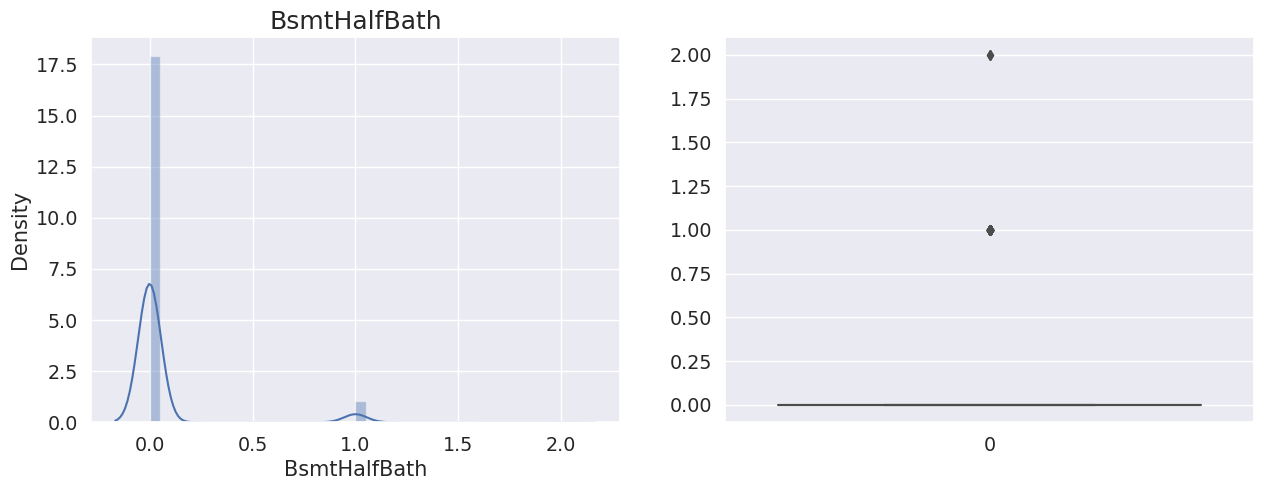

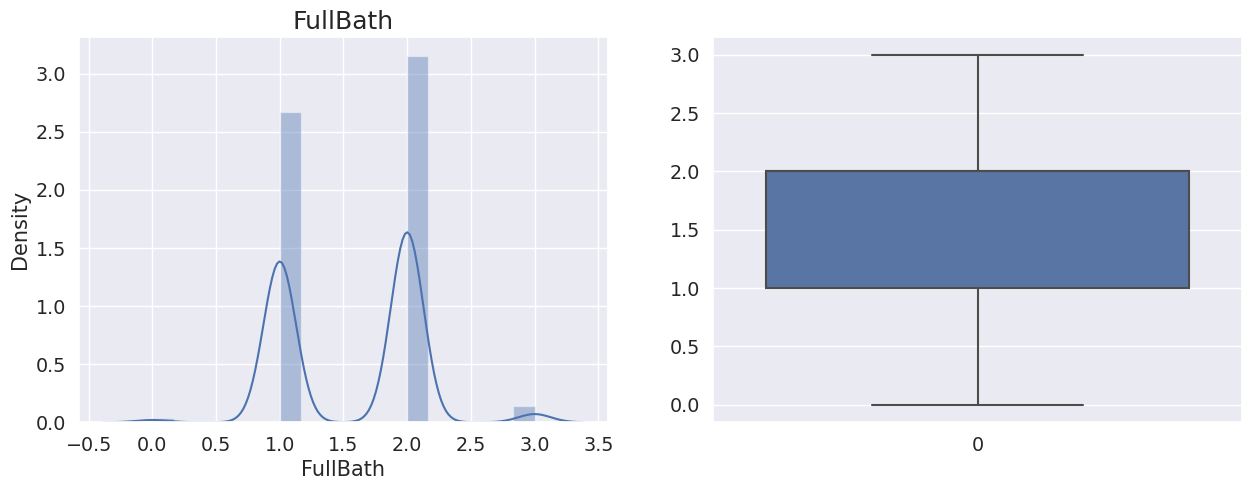

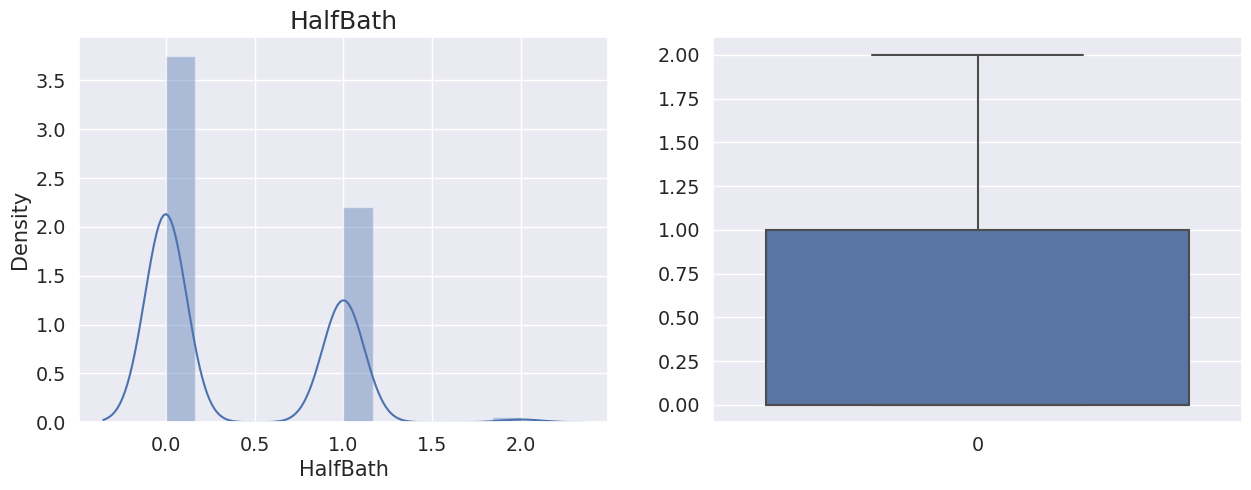

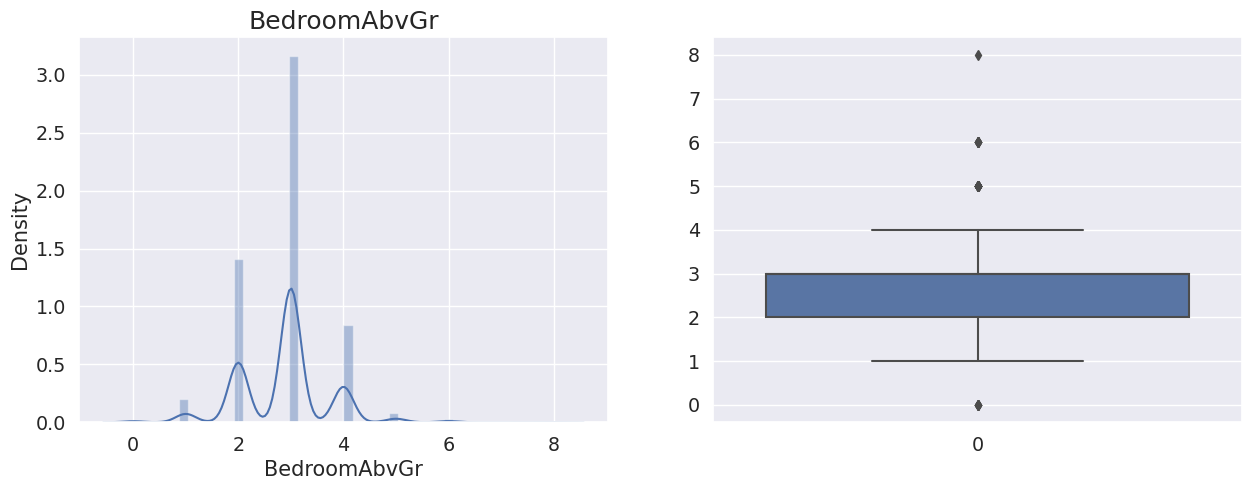

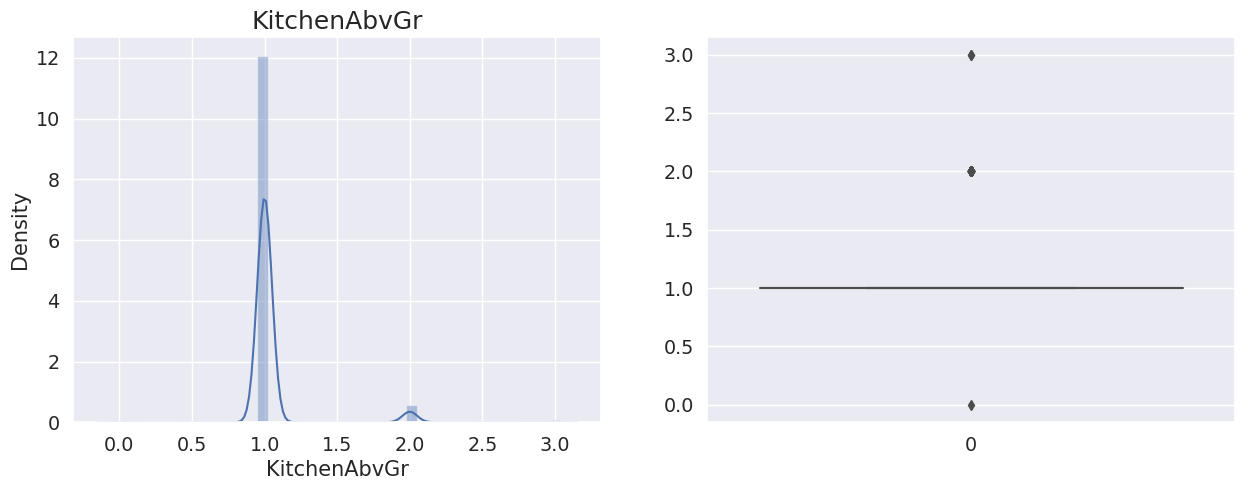

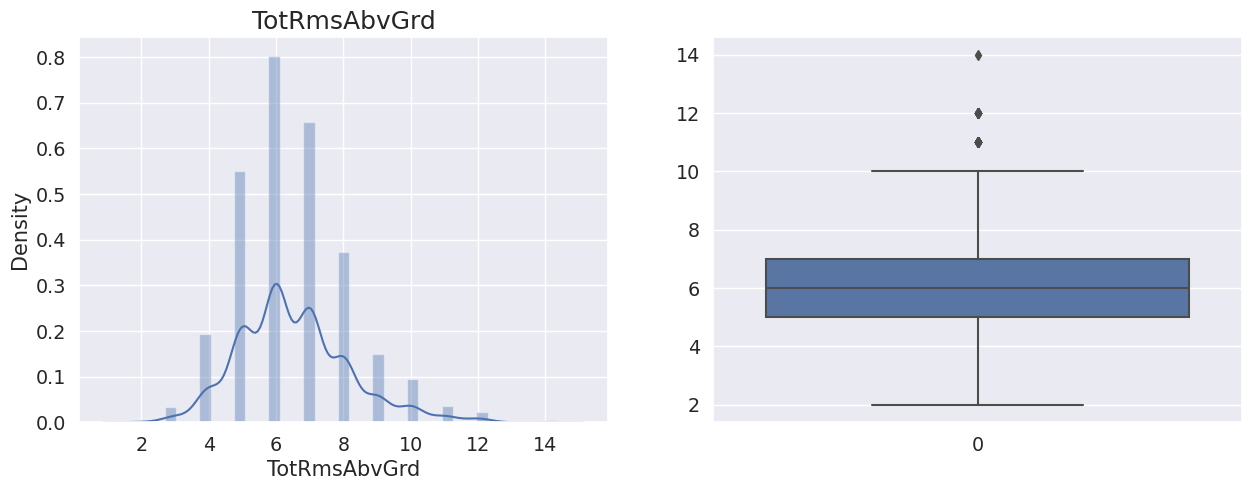

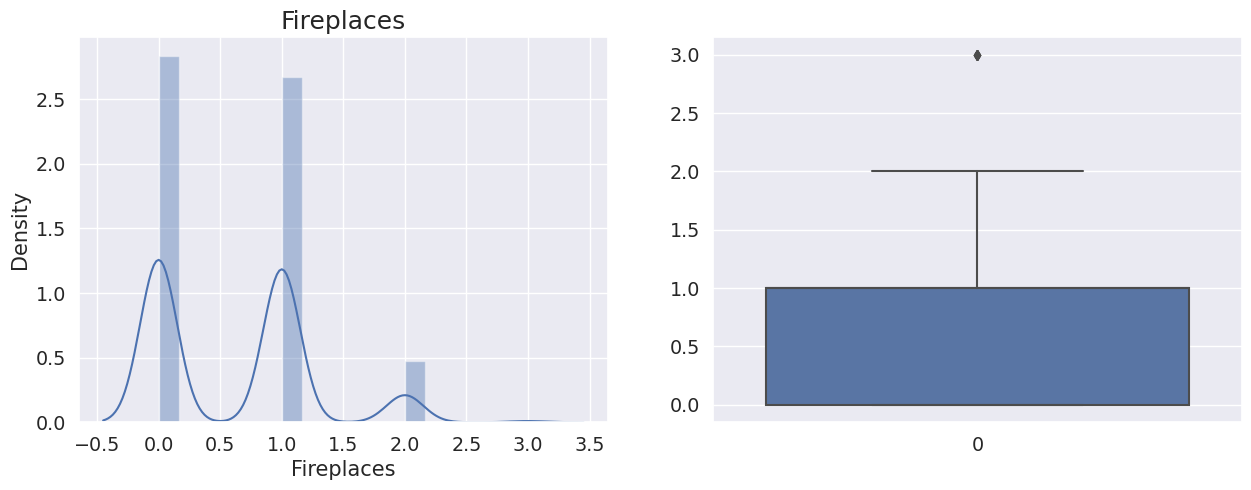

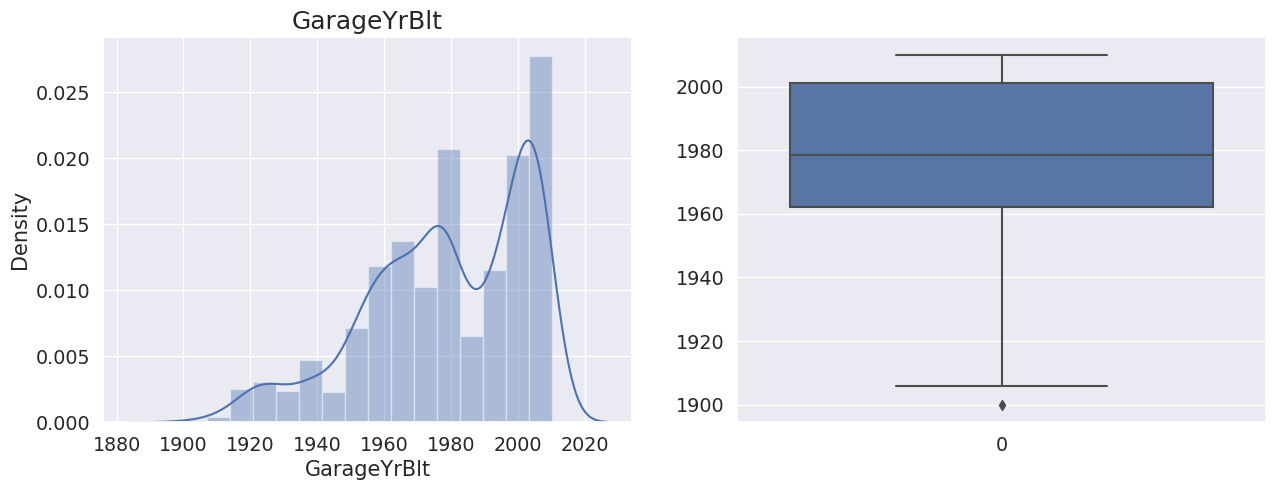

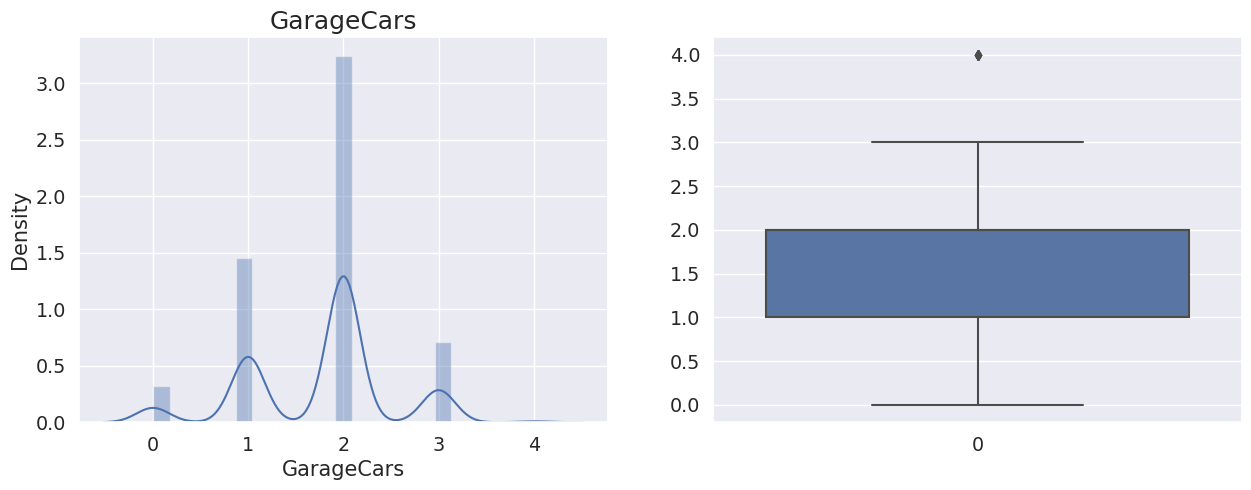

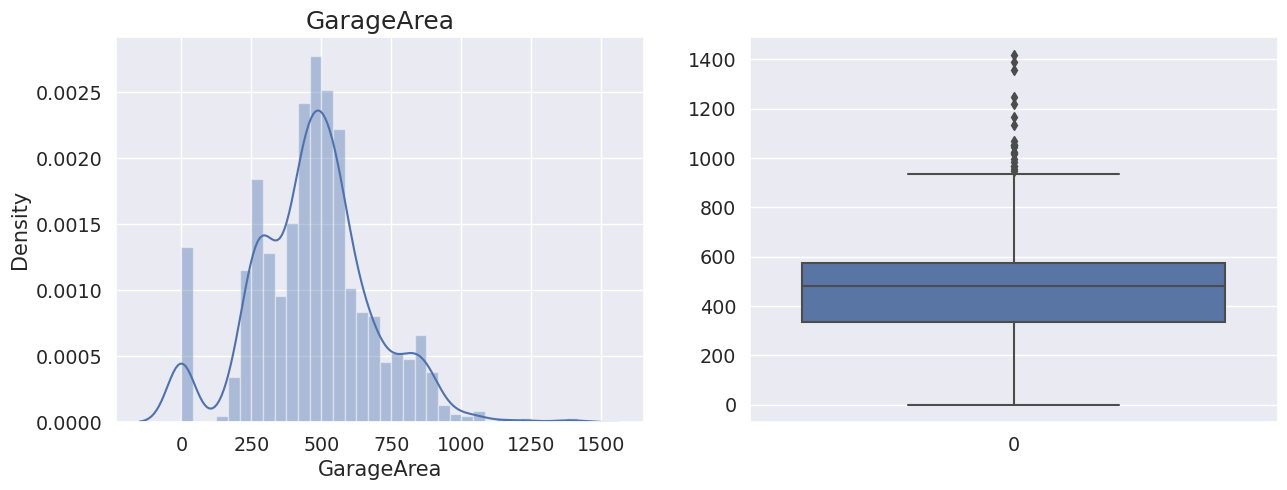

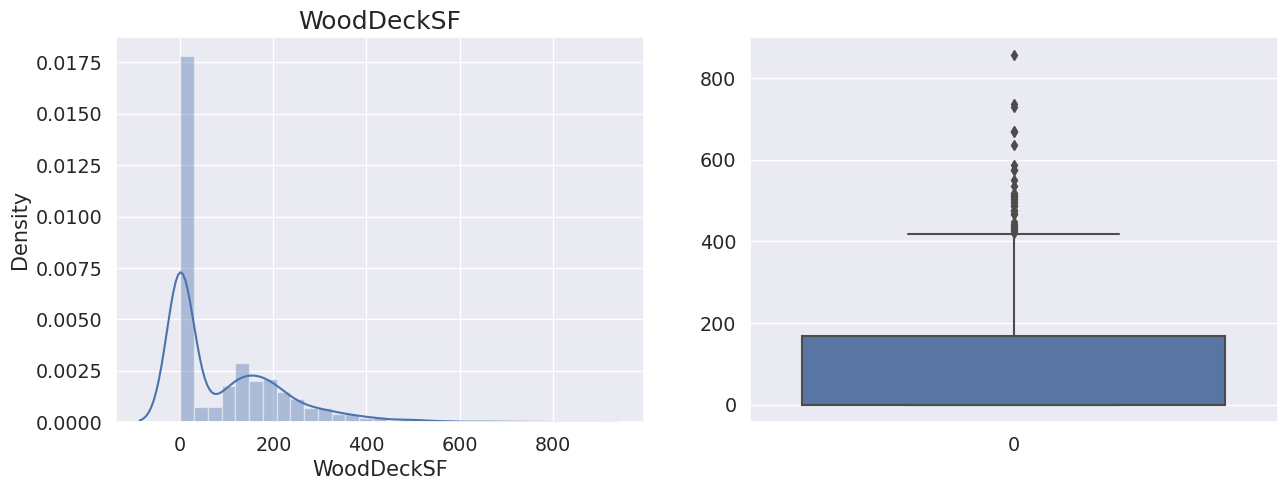

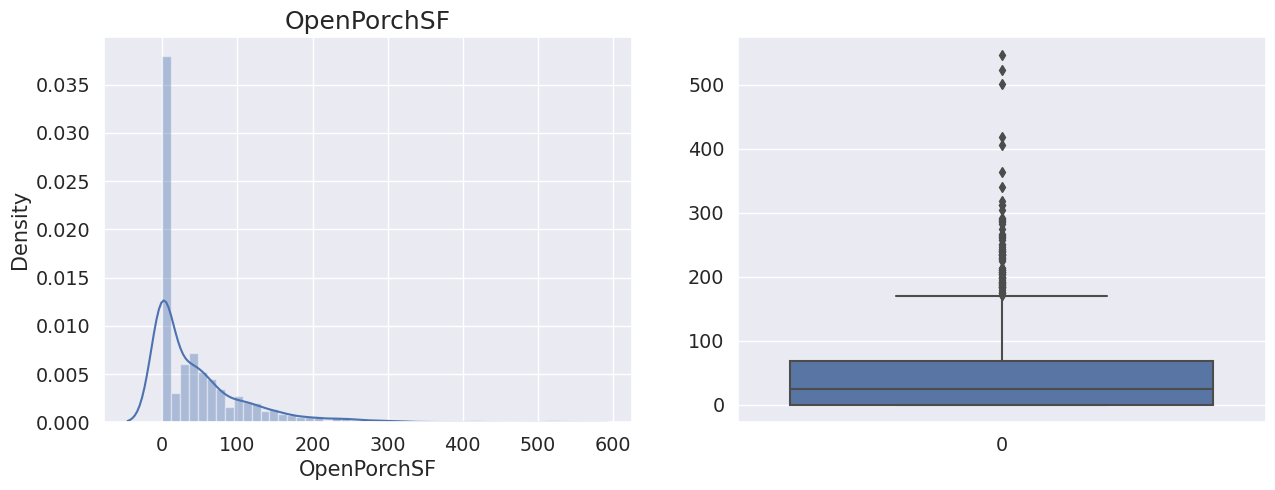

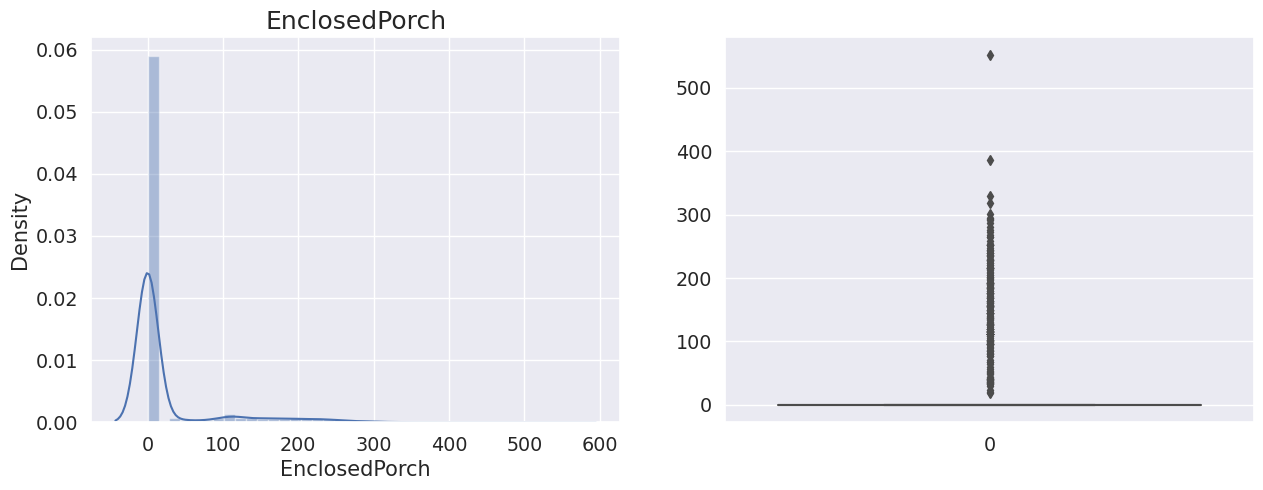

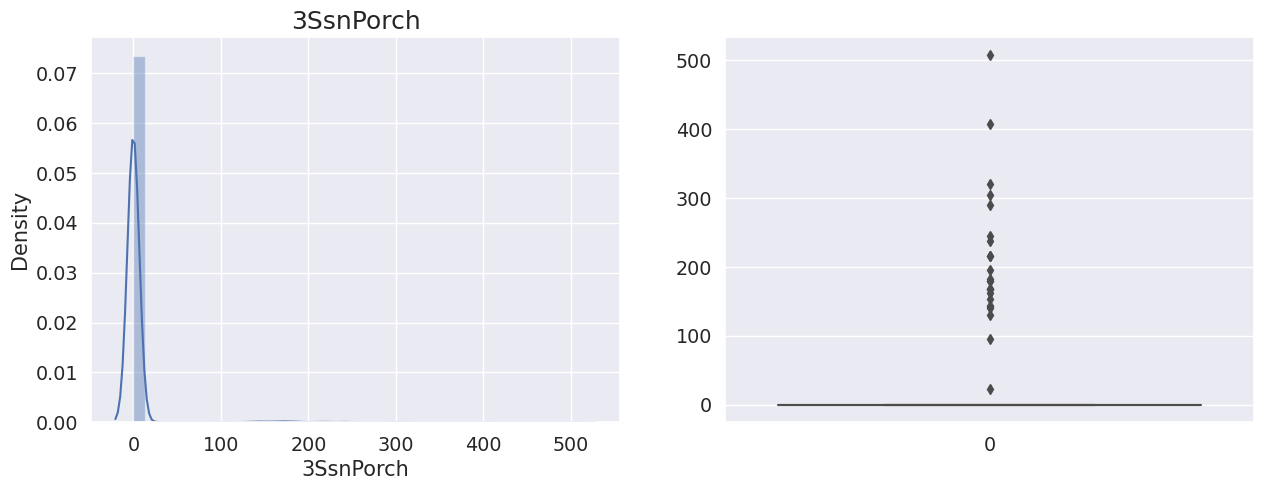

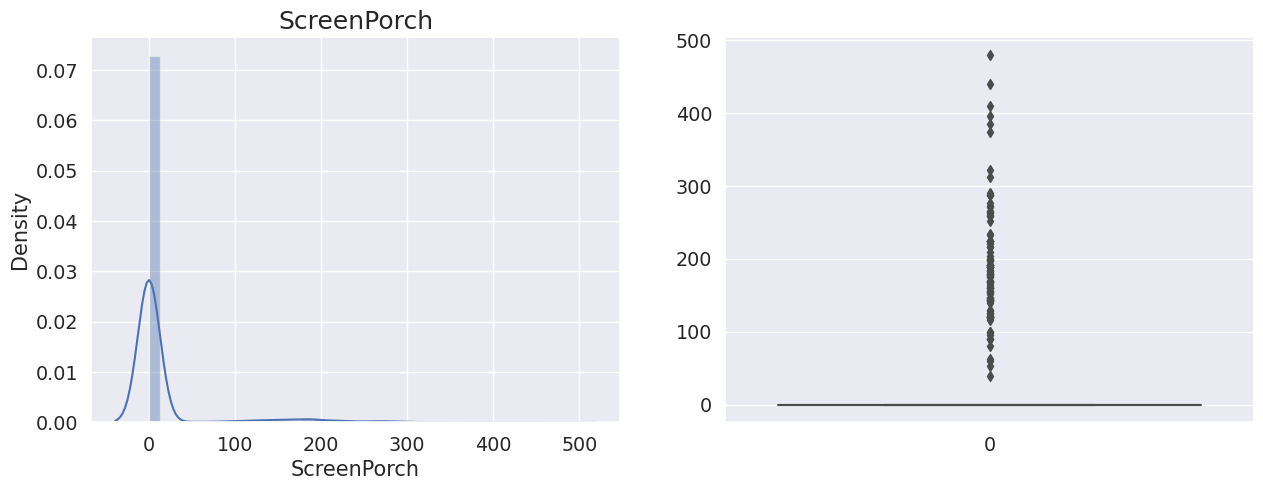

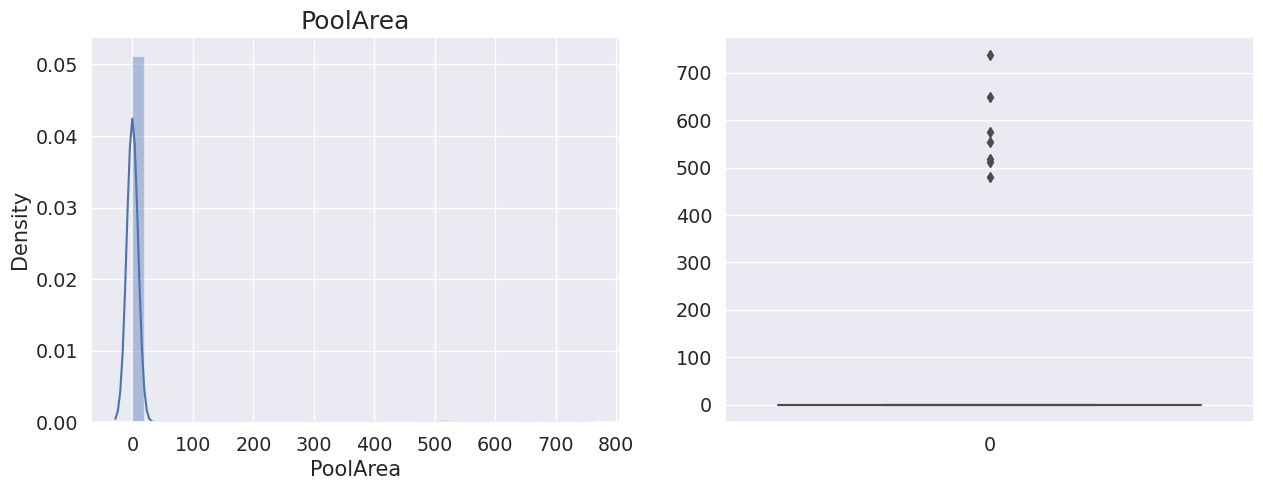

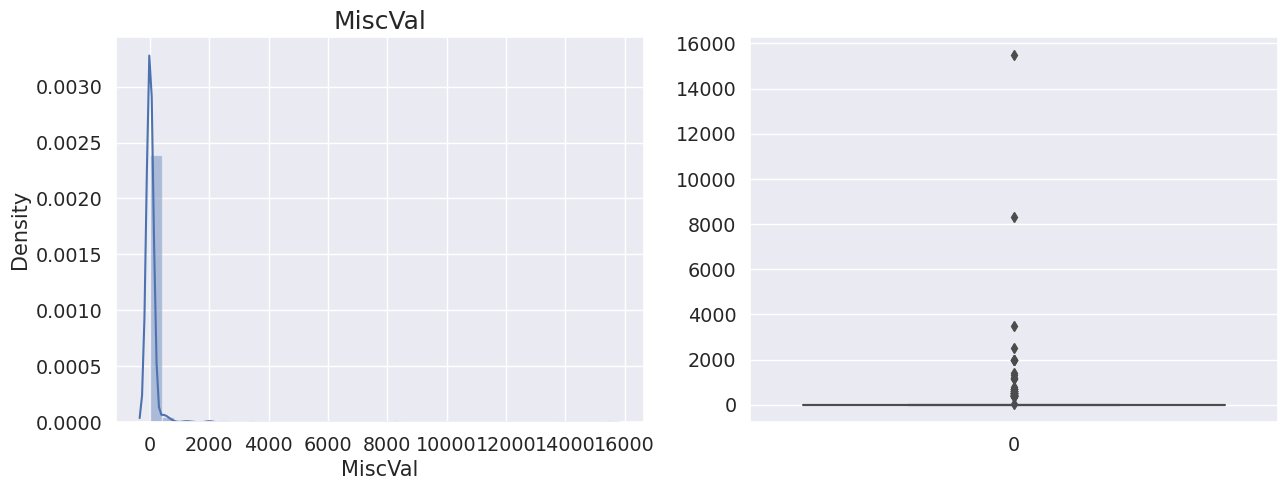

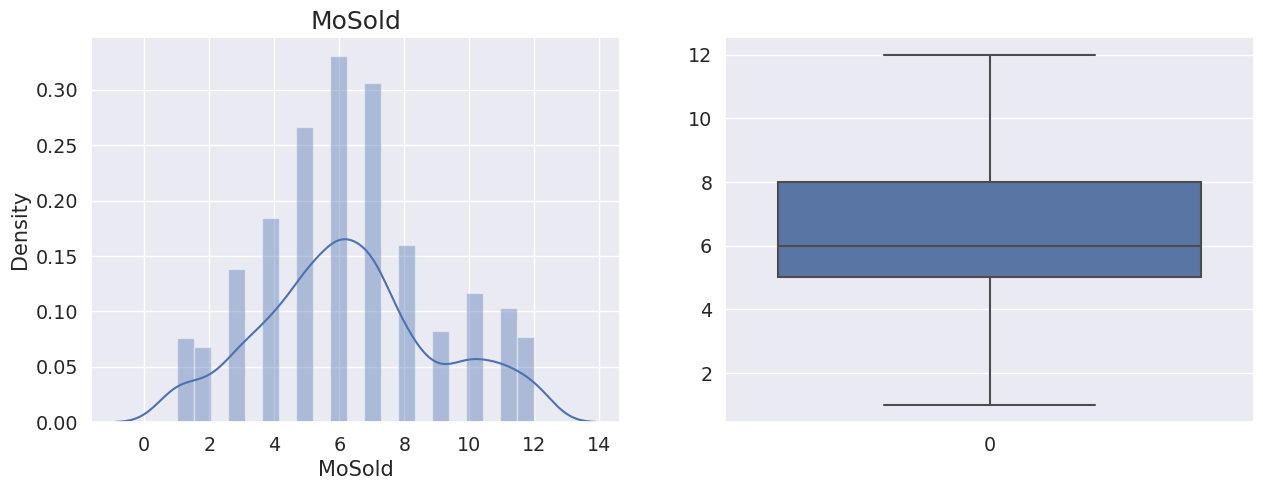

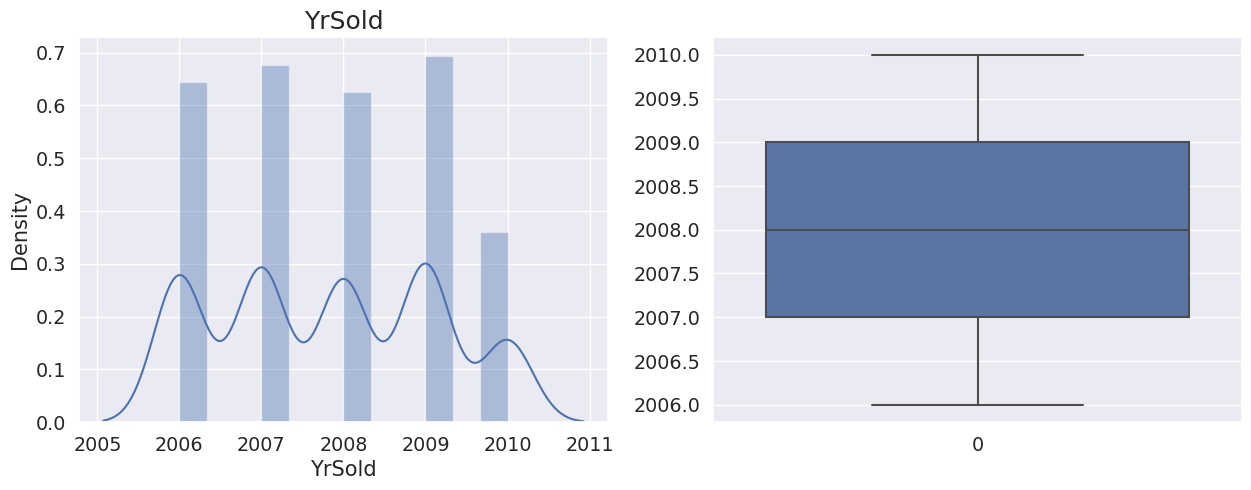

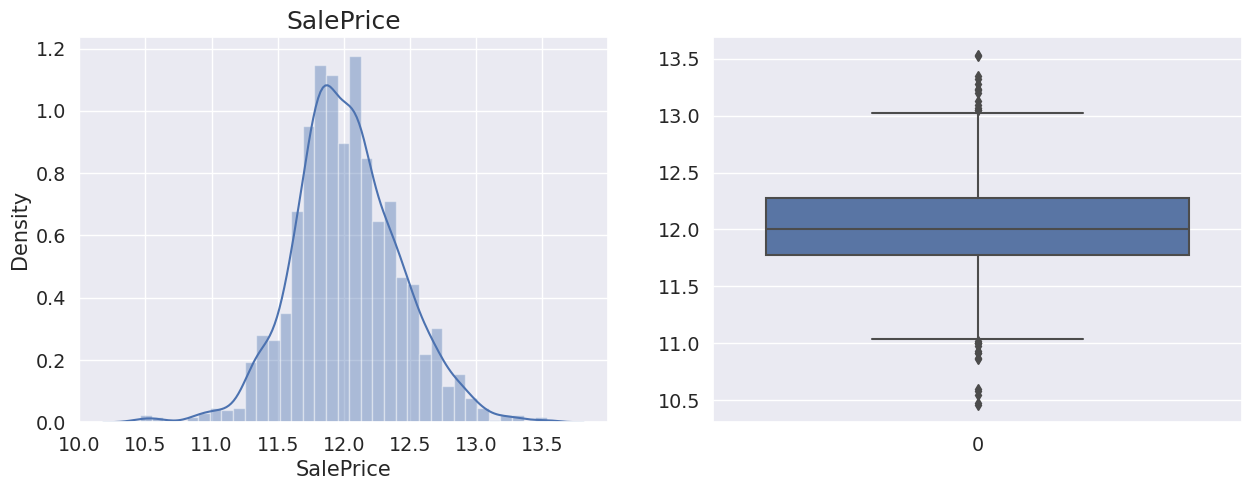

In [182]:
#Checking the numerical columns
#In this case both distribution plot, box plot to see ditribution. and outliers.
for col in housing_data_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_data_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_data_num[col])
    plt.show()    


Asper the above distribution and box plot, below are the columns where there are outliers present.
- `LotFrontage`
- `LotArea`
- `MasVnrArea`
- `BsmtFinSF2`
- `LowQualFinSF`
- `GrLivArea`
- `OpenPorchSF`
- `EnclosedPorch`
- `3SsnPorch`
- `ScreenPorch`

In [183]:
outlier_columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

In [184]:
housing_data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF2  LowQualFinSF  \
count  1460.000000    1460.000000  1460.000000  1460.000000   1460.000000   
mean     69.863699   10516.828082   103.117123    46.549315      5.844521   
std      22.027677    9981.264932   180.731373   161.319273     48.623081   
min      21.000000    1300.000000     0.000000     0.000000      0.000000   
25%      60.000000    7553.500000     0.000000     0.000000      0.000000   
50%      69.000000    9478.500000     0.000000     0.000000      0.000000   
75%      79.000000   11601.500000   164.250000     0.000000      0.000000   
max     313.000000  215245.000000  1600.000000  1474.000000    572.000000   

         GrLivArea  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  
mean   1515.463699    46.660274      21.954110     3.409589    15.060959  
std     525.480383    66.256028      61.119149    29.317331    55.757415  
min     334.000000     0.000000       0.000000     0.000000     0.000000  
25%    1129.500000     0.000000       0.000000     0.000000     0.000000  
50%    1464.000000    25.000000       0.000000     0.000000     0.000000  
75%    1776.750000    68.000000       0.000000     0.000000     0.000000  
max    5642.000000   547.000000     552.000000   508.000000   480.000000

In [ ]:
# Checking outliers for different quantile values
# 0-25% values, and 75-99% values
quantile_values = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.20,0.25,0.75,0.80,0.85,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
housing_data[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].quantile(quantile_values)

There are no much variations with lower quantile values. For higher values (>95%)
`LotFrontage` which is continuosly increasing.   `LowQualFinSF`, `3SsnPorch` parameters has most of the values as 0, till 99%. For all other variables have more increase after 0.90 or .95 quantile. So try to remove outliers considering 95% as cutoff for all variables except `LotFrontage`

In [186]:
#Removing 'LotFrontage'
outlier_columns = ['LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','GrLivArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']

In [187]:
#Taking upto 95% values
for col in housing_data.columns:
  for col in outlier_columns:
    housing_data[col][housing_data[col] >= housing_data[col].quantile(0.95)] = housing_data[col].quantile(0.95)

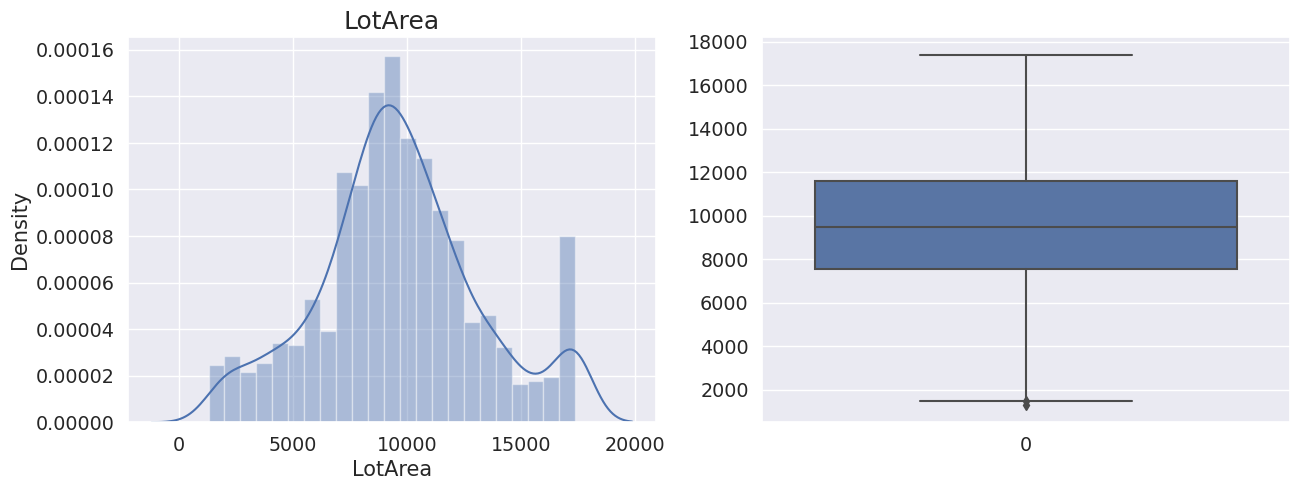

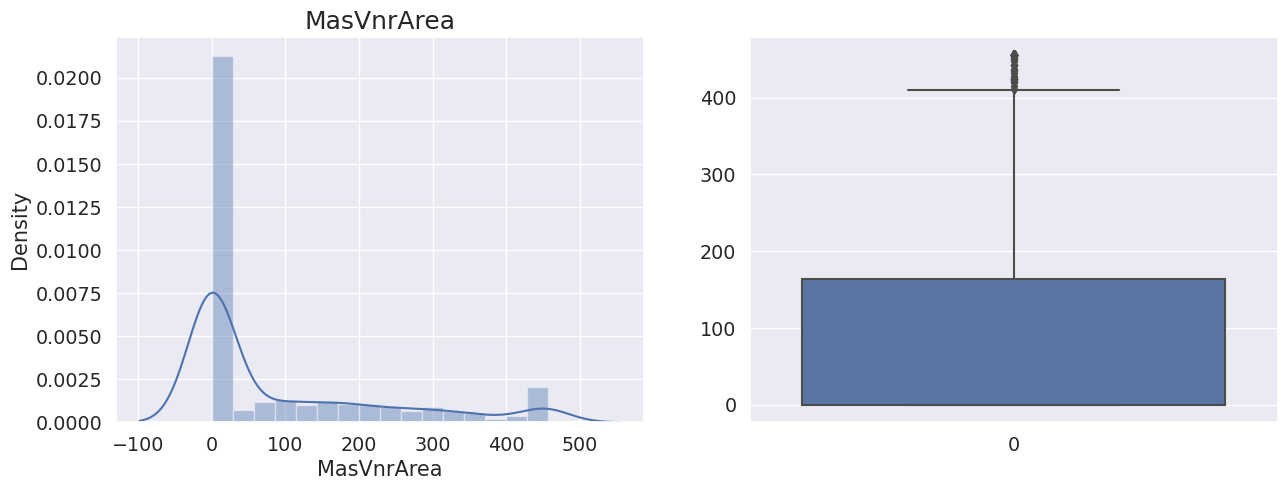

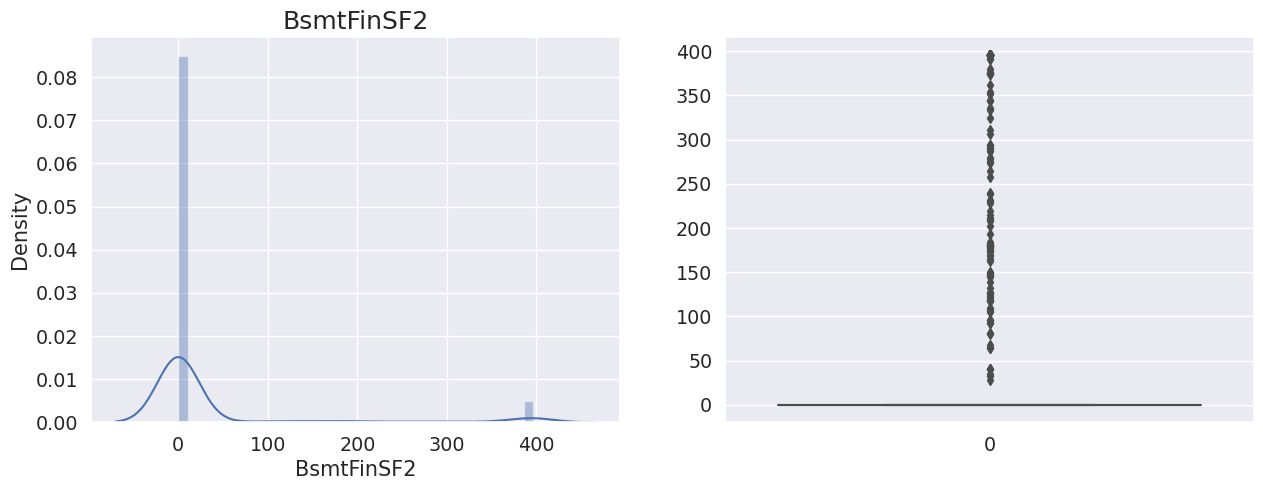

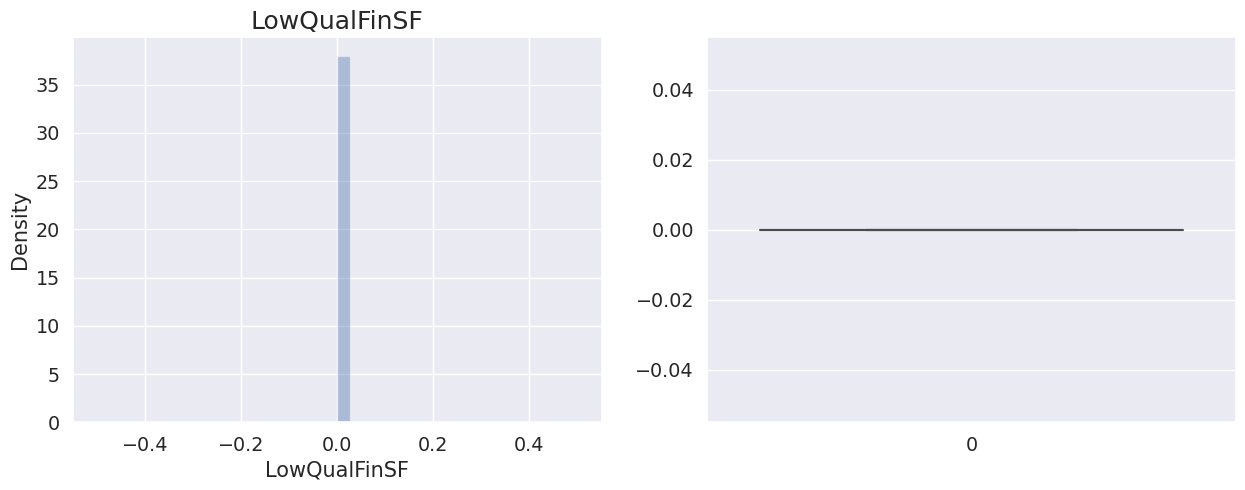

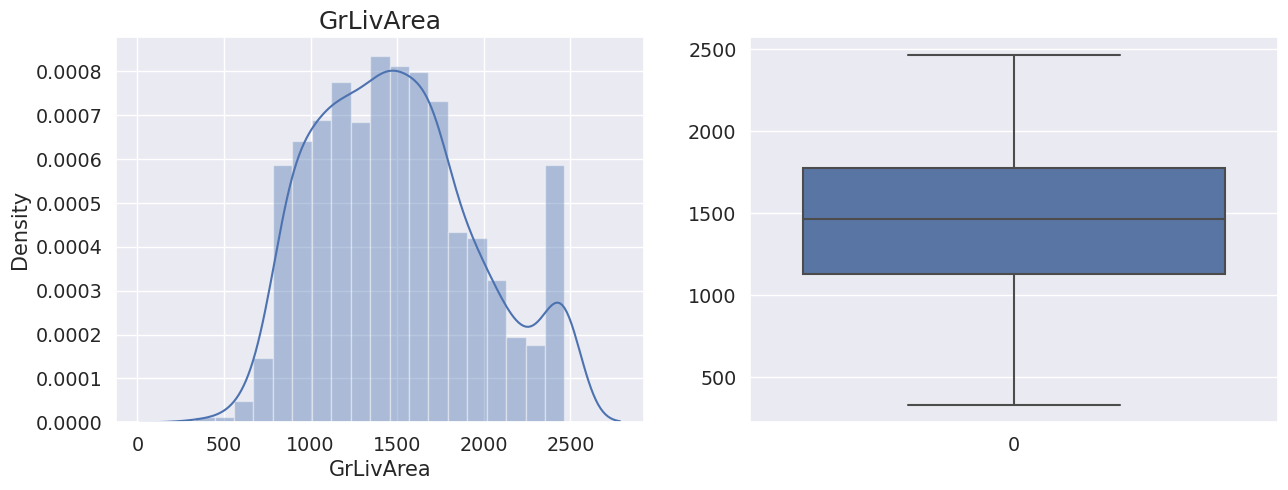

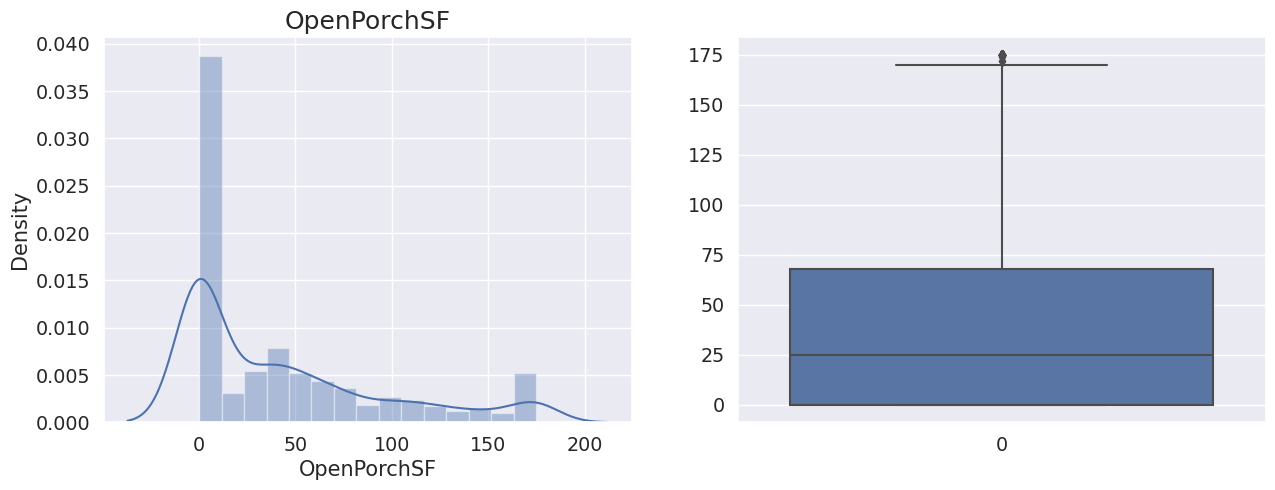

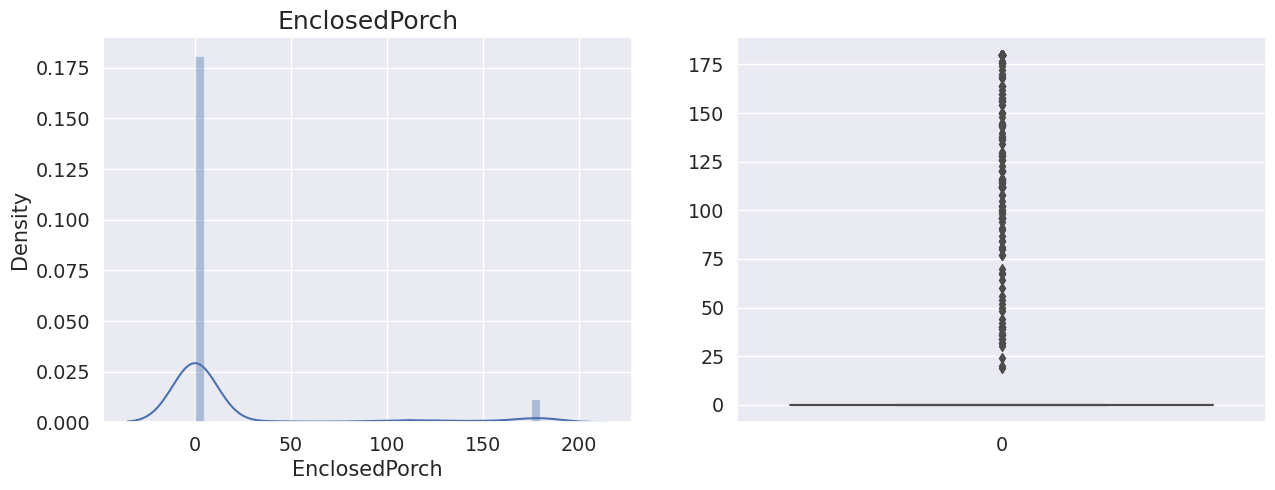

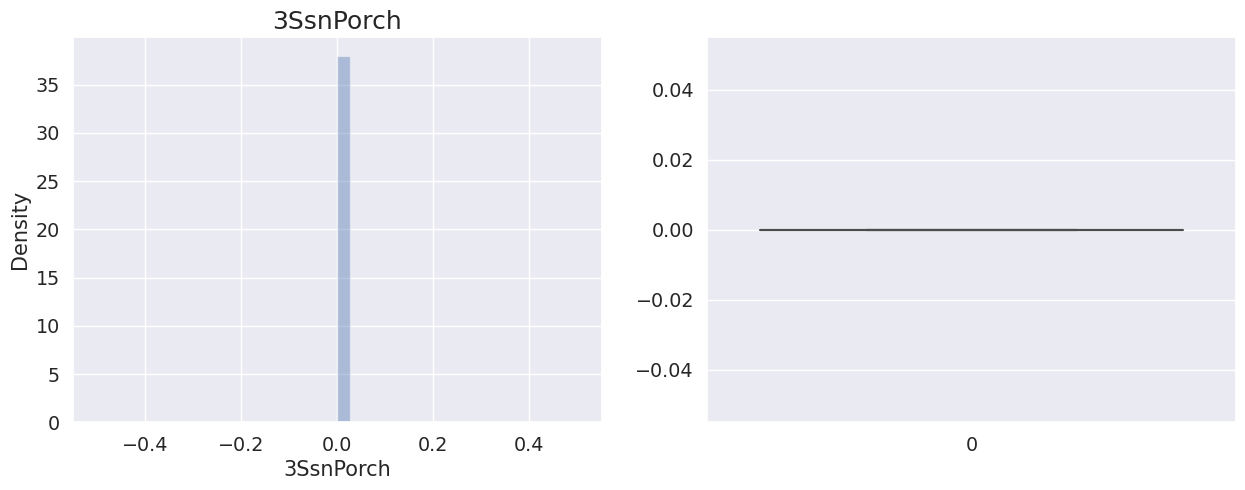

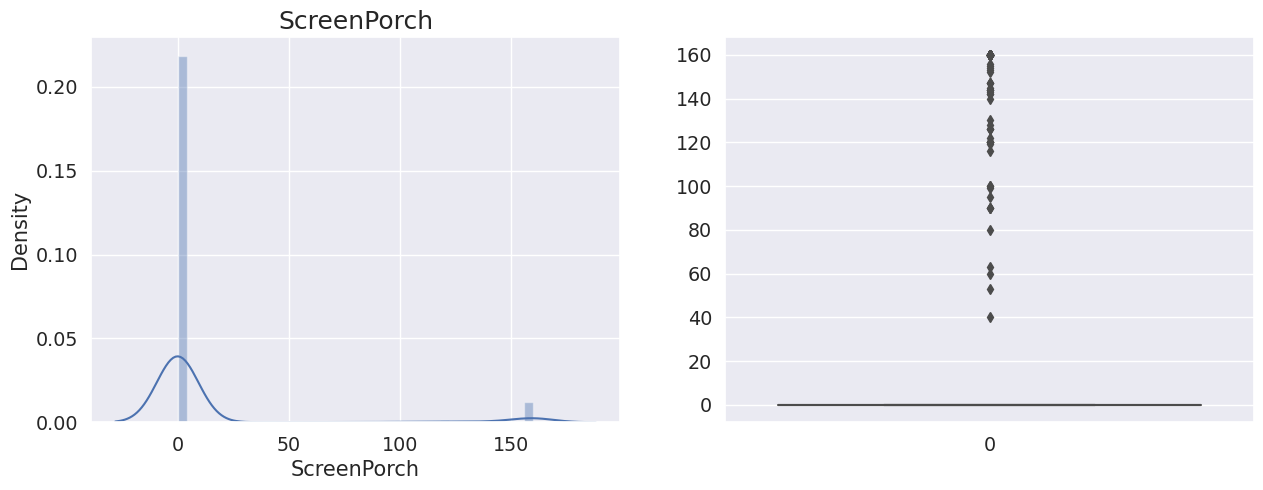

In [188]:
#Plot the numberical columns againfor outliers
for col in housing_data.columns:
  if col in outlier_columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(housing_data[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(housing_data[col])
    plt.show()    


Bivariate Analysis

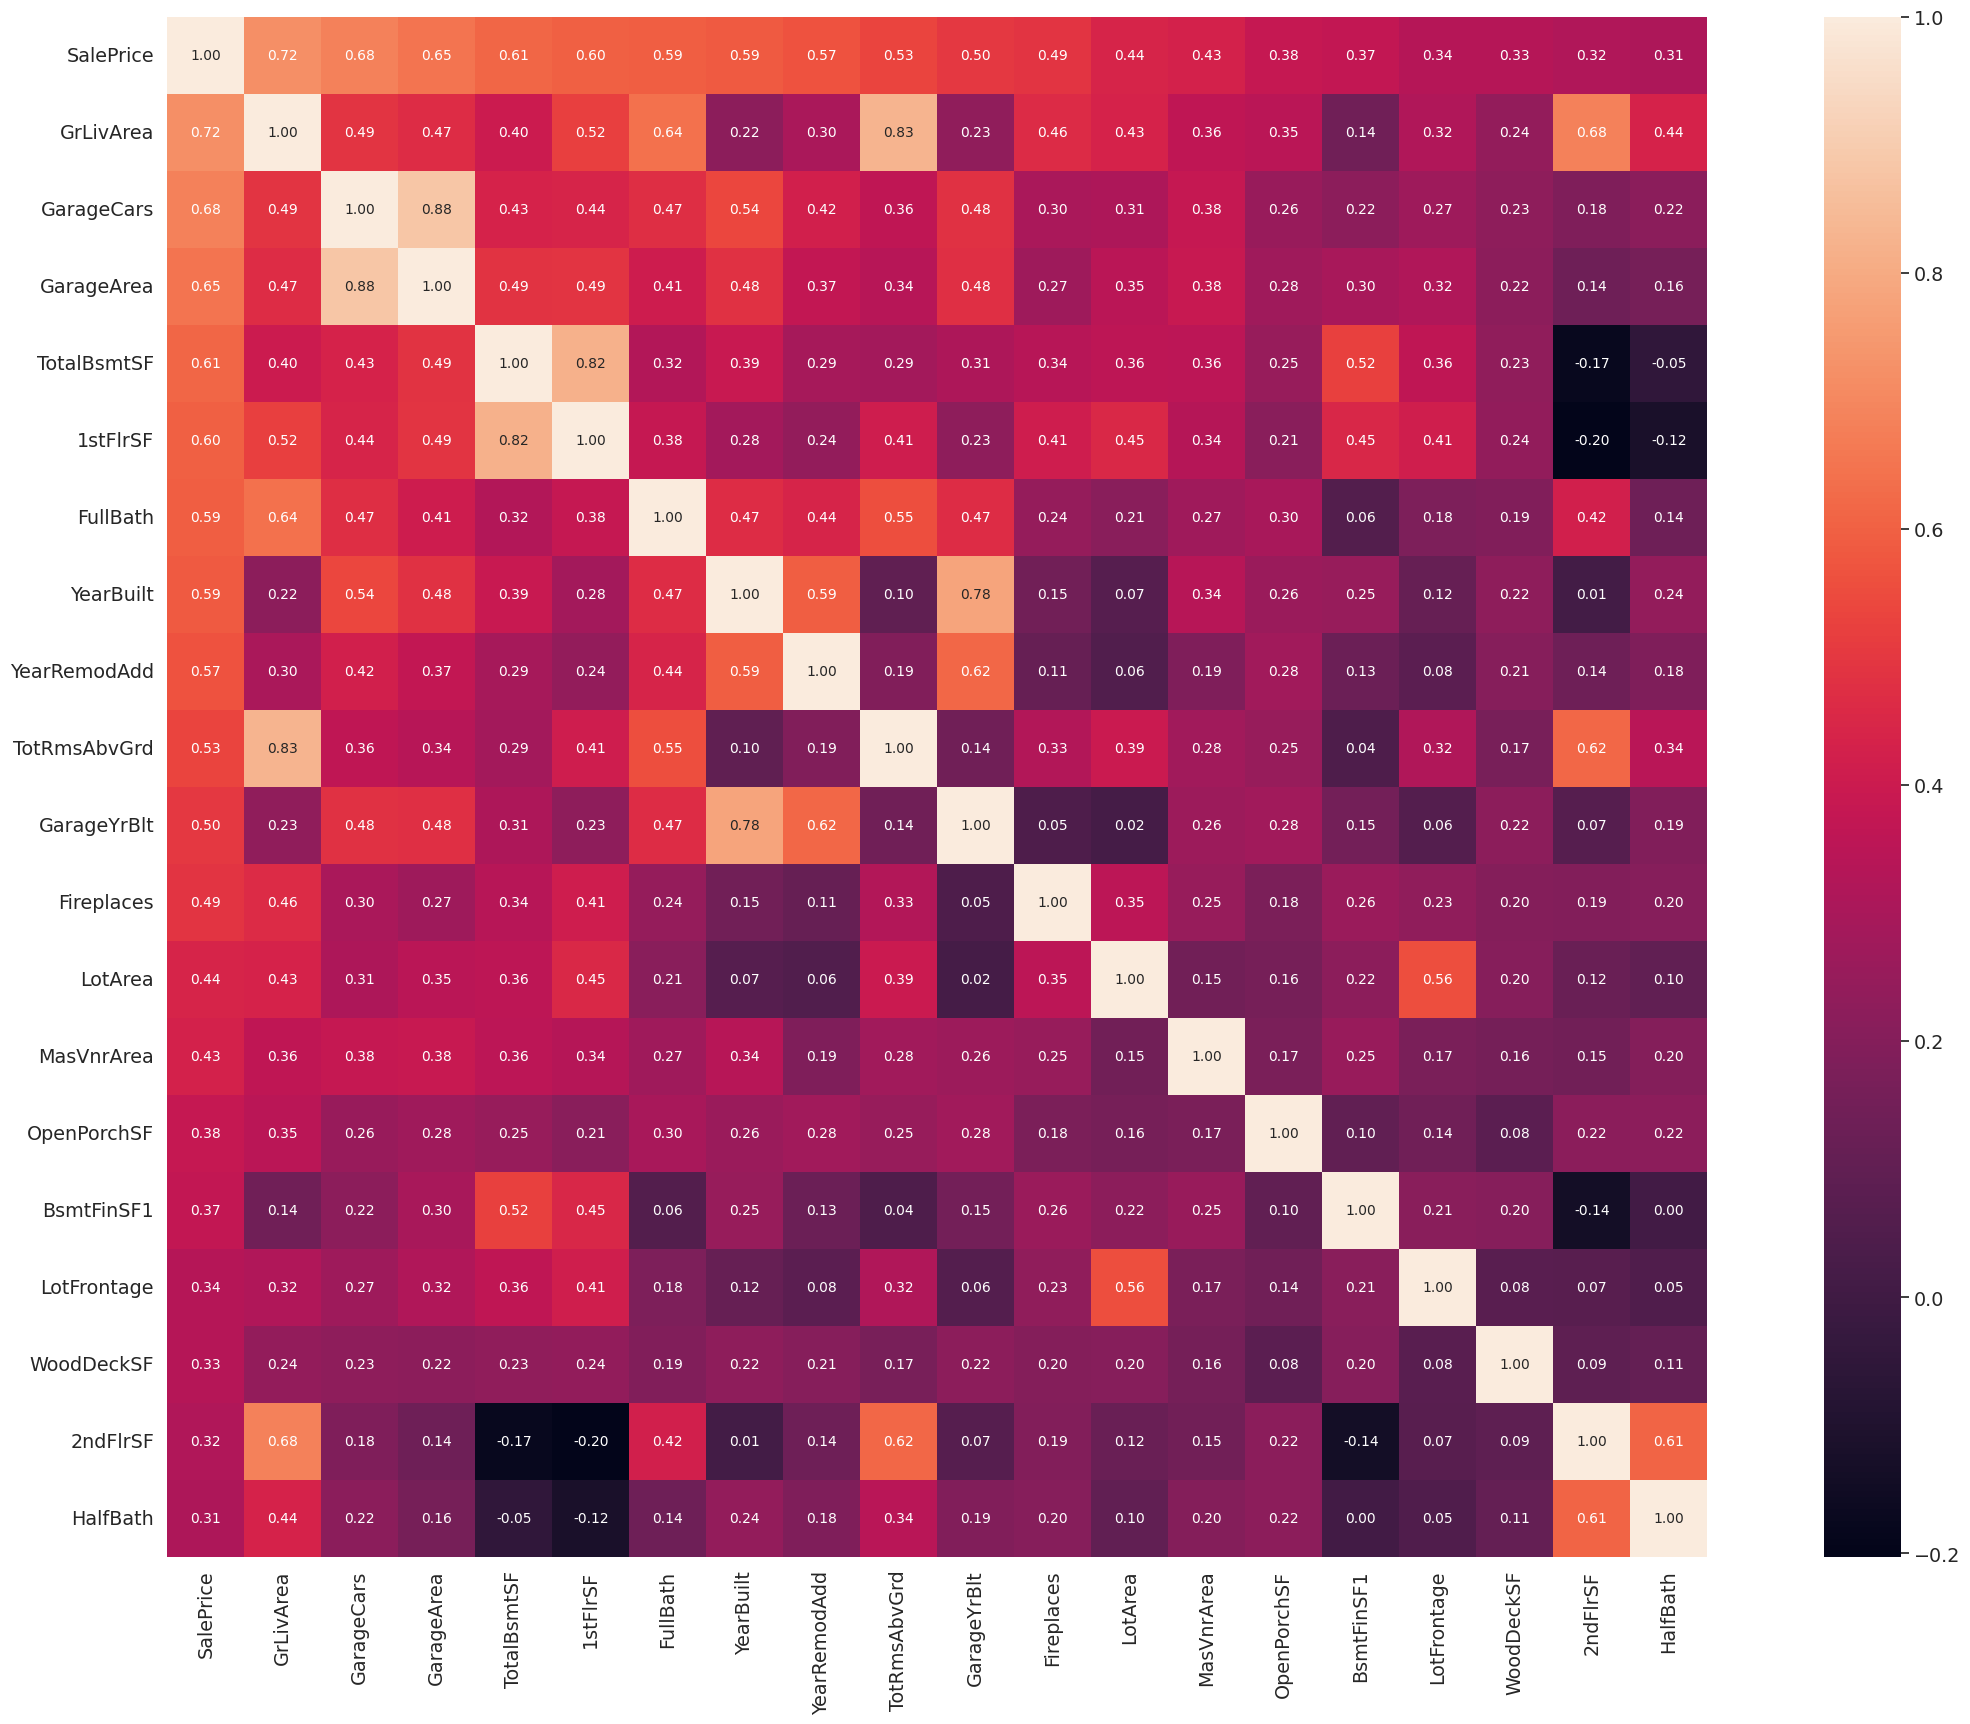

In [189]:
#Check from heatmap on the correlation coefficients 
# to understand the variables with highest correlation
# correlation matrix with top 15 variables that has higher correlation with 'SalePrice' Parameter
corrmat = housing_data.corr()
#number of variables for heatmap
k = 20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing_data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize = (30,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


- Target variable `SalePrice` has higher correlation with `GrLivArea`, `GarageCars` and `GarageArea` parameters. 

- Dummy Variables:
  - Introduce Dummy variables for categorical columns.

In [190]:
## One hot encoding the categorical columns
housing_data_cat = housing_data.select_dtypes(include='object')
orig_cat_columns = housing_data_cat.columns
housing_data_cat_encode = pd.get_dummies(housing_data_cat, drop_first=True)
housing_data_cat_encode.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  \
0  ...                   0                   0                  0   
1  ...                   0                   0                  0   
2  ...                   0                   0                  0   
3  ...                   0                   0                  1   
4  ...                   0                   0                  0   

   GarageType_NoGarage  GarageFinish_NoGarage  GarageFinish_RFn  \
0                    0                      0                 1   
1                    0                      0                 1   
2                    0                      0                 1   
3                    0                      0                 0   
4                    0                      0                 1   

   GarageFinish_Unf  SaleCondition_Normal  SaleCondition_Others  \
0                 0                     1                     0   
1                 0                     1                     0   
2                 0                     1                     0   
3                 1                     0                     0   
4                 0                     1                     0   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 167 columns]

In [191]:
#Concatenate the dummy columns
housing_data = pd.concat([housing_data, housing_data_cat_encode], axis=1)

In [192]:
orig_cat_columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish', 'SaleCondition'],
      dtype='object')

In [193]:
#Remove the original columns
housing_data = housing_data.drop(orig_cat_columns,axis=1)

In [194]:
#Check the number of columns
housing_data.shape

(1460, 201)

# 2. Model Building

In this section:
- Data will be split into test, train sets
- Scalaning the parameters (Numerical) with StandardScalar.
- MLR will be built (w/o dropping any of the parameters).
- Later Regularization methods will be applied.
- Stats will be compared to for MLR, Ridge, Lassso.

In [195]:
#Pick all columsn for X except target column
X = housing_data.drop(['SalePrice'], axis=1)
X.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0   8450.0       2003          2003       196.0         706   
1         80.0   9600.0       1976          1976         0.0         978   
2         68.0  11250.0       2001          2002       162.0         486   
3         60.0   9550.0       1915          1970         0.0         216   
4         84.0  14260.0       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageType_BuiltIn  \
0         0.0        150          856       856  ...                   0   
1         0.0        284         1262      1262  ...                   0   
2         0.0        434          920       920  ...                   0   
3         0.0        540          756       961  ...                   0   
4         0.0        490         1145      1145  ...                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NoGarage  \
0                   0                  0                    0   
1                   0                  0                    0   
2                   0                  0                    0   
3                   0                  1                    0   
4                   0                  0                    0   

   GarageFinish_NoGarage  GarageFinish_RFn  GarageFinish_Unf  \
0                      0                 1                 0   
1                      0                 1                 0   
2                      0                 1                 0   
3                      0                 0                 1   
4                      0                 1                 0   

   SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
0                     1                     0                      0  
1                     1                     0                      0  
2                     1                     0                      0  
3                     0                     0                      0  
4                     1                     0                      0  

[5 rows x 200 columns]

In [196]:
#Pick target columnt 'SalePrice' for target column.
y = housing_data['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [197]:
#Splitting the data in to train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)

In [198]:
#X Train Data size
X_train.shape

(1022, 200)

In [199]:
#X Test Data size
X_test.shape

(438, 200)

In [200]:
#y Train Data size
y_train.shape

(1022,)

In [201]:
#y test Data size
y_test.shape

(438,)

In [202]:
#Scaling numerical columns
housing_num_col_list = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
housing_num_col_list

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [203]:
#Using standard scaler
scaler = StandardScaler()

#Scale the above numerical columns
X_train[housing_num_col_list] = scaler.fit_transform(X_train[housing_num_col_list])
X_test[housing_num_col_list] = scaler.transform(X_test[housing_num_col_list])

In [204]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 210 to 792
Columns: 200 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(33), uint8(167)
memory usage: 438.1 KB


In [205]:
X_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210     -0.116296 -1.123295  -1.525951     -1.695468   -0.649872    0.042644   
318      0.925887  0.085427   0.716352      0.390510    1.159584    1.159589   
239     -0.795980 -0.240670  -0.866450     -1.695468   -0.649872   -0.762245   
986     -0.478794 -1.206015  -2.020577      0.875621   -0.649872   -0.964543   
1416    -0.433482  0.490585  -2.844953     -1.695468   -0.649872   -0.964543   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageType_BuiltIn  \
210    -0.332148  -0.373789    -0.431237 -0.765334  ...                   0   
318    -0.332148  -0.454087     0.621761  0.512263  ...                   0   
239    -0.332148   0.172682    -0.712473 -0.931321  ...                   0   
986    -0.332148  -0.175275    -1.257503 -0.420785  ...                   0   
1416   -0.332148   0.476030    -0.620908  0.195379  ...                   0   

      GarageType_CarPort  GarageType_Detchd  GarageType_NoGarage  \
210                    0                  0                    1   
318                    0                  0                    0   
239                    0                  1                    0   
986                    0                  0                    0   
1416                   0                  1                    0   

      GarageFinish_NoGarage  GarageFinish_RFn  GarageFinish_Unf  \
210                       1                 0                 0   
318                       0                 1                 0   
239                       0                 0                 1   
986                       0                 0                 1   
1416                      0                 0                 1   

      SaleCondition_Normal  SaleCondition_Others  SaleCondition_Partial  
210                      1                     0                      0  
318                      1                     0                      0  
239                      1                     0                      0  
986                      1                     0                      0  
1416                     1                     0                      0  

[5 rows x 200 columns]

# 2.1 Linear Regression:

- Initially Multiple Linear Regression Model (MLR) is buiult without droppong any parameters.

In [206]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [207]:
# Predictions on the basis of the model
y_train_pred = lm.predict(X_train)
y_train_pred

array([11.45880127, 12.73956299, 11.73101807, ..., 12.66418457,
       11.58355713, 12.44781494])

In [208]:
y_test_pred = lm.predict(X_test)

In [209]:
#Training R-Squared
lr_train_r2_score = r2_score(y_train, y_train_pred)
lr_train_r2_score

0.9188133240122912

In [210]:
#Testing R-Squared
lr_test_r2_score = r2_score(y_test, y_test_pred)
lr_test_r2_score

-2.427812005429287e+22

In [211]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lr_train_rss = np.sum(np.square(y_train - y_train_pred))
print(lr_train_rss)
lr_train_mse = mean_squared_error(y_train, y_train_pred)
print(lr_train_mse)
# Root Mean Squared Error
lr_train_rmse = lr_train_mse**0.5
print(lr_train_rmse)

13.048769634533741
0.012767876354729688
0.11299502800888934


In [212]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lr_test_rss = np.sum(np.square(y_test - y_test_pred))
print(lr_test_rss)
lr_test_mse = mean_squared_error(y_test, y_test_pred)
print(lr_test_mse)
# Root Mean Squared Error
lr_test_rmse = lr_test_mse**0.5
print(lr_test_rmse)

1.749689419832693e+24
3.9947247028143674e+21
63203834557.8365


# 2.2 Ridge Regression

In [213]:
# list of alphas to tune
ridge_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}

ridge_reg = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge_reg, 
                        param_grid = ridge_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [214]:
#Find the optimal value of alpha
ridge_model_cv.best_params_

{'alpha': 3.0}

In [215]:
#Check the model results
ridge_model_cv.cv_results_

{'mean_fit_time': array([0.02732859, 0.03543611, 0.04656754, 0.0442955 , 0.03844461,
        0.03752522, 0.04194789, 0.04677105, 0.04571915, 0.01230617,
        0.02410297, 0.03134599, 0.02040739, 0.0266377 , 0.0166688 ,
        0.01651278, 0.02710009, 0.02596693, 0.02353449, 0.01974049,
        0.0139636 , 0.0236454 , 0.01874533, 0.02599134, 0.01392574,
        0.01871896, 0.01351442]),
 'std_fit_time': array([0.00718905, 0.00689366, 0.0086017 , 0.00191673, 0.00782296,
        0.00640641, 0.00361566, 0.00602721, 0.01567956, 0.00047341,
        0.00645134, 0.00489542, 0.00703138, 0.00121465, 0.00629979,
        0.00614915, 0.00405186, 0.00112231, 0.00595422, 0.006123  ,
        0.00422415, 0.00626258, 0.00632229, 0.00093472, 0.00504608,
        0.00481883, 0.00317311]),
 'mean_score_time': array([0.01145358, 0.01279149, 0.01476903, 0.01646328, 0.01695685,
        0.01446328, 0.01639676, 0.01685014, 0.01195064, 0.00690351,
        0.00956674, 0.01287379, 0.00876255, 0.01018929, 0.006671

In [216]:
#optimum alpha is 6, so fit the model at 6
alpha = 6
ridge_reg = Ridge(alpha=alpha)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=6)

In [217]:
#Predict
y_train_pred = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)

In [218]:
#R-Square on training data
ridge_train_r2_score = r2_score(y_train, y_train_pred)

In [219]:
#R-Square on test data
ridge_test_r2_score = r2_score(y_test, y_pred)

In [220]:
#Model Parameters of Ridge
ridge_model_parameters = list(sorted(ridge_reg.coef_))
ridge_model_parameters.insert(0, ridge_reg.intercept_)
ridge_model_parameters = [round(x, 4) for x in ridge_model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('LotFrontage', 11.9051),
 ('LotArea', -0.152),
 ('YearBuilt', -0.1085),
 ('YearRemodAdd', -0.0816),
 ('MasVnrArea', -0.0815),
 ('BsmtFinSF1', -0.0757),
 ('BsmtFinSF2', -0.067),
 ('BsmtUnfSF', -0.0585),
 ('TotalBsmtSF', -0.0574),
 ('1stFlrSF', -0.0556),
 ('2ndFlrSF', -0.0552),
 ('LowQualFinSF', -0.0543),
 ('GrLivArea', -0.0535),
 ('BsmtFullBath', -0.0531),
 ('BsmtHalfBath', -0.053),
 ('FullBath', -0.0513),
 ('HalfBath', -0.0501),
 ('BedroomAbvGr', -0.0482),
 ('KitchenAbvGr', -0.0473),
 ('TotRmsAbvGrd', -0.0447),
 ('Fireplaces', -0.0445),
 ('GarageYrBlt', -0.0442),
 ('GarageCars', -0.0436),
 ('GarageArea', -0.0427),
 ('WoodDeckSF', -0.0412),
 ('OpenPorchSF', -0.0399),
 ('EnclosedPorch', -0.0399),
 ('3SsnPorch', -0.0383),
 ('ScreenPorch', -0.0381),
 ('PoolArea', -0.0368),
 ('MiscVal', -0.0353),
 ('MoSold', -0.0339),
 ('YrSold', -0.0333),
 ('MSSubClass_30', -0.0302),
 ('MSSubClass_40', -0.03),
 ('MSSubClass_45', -0.0296),
 ('MSSubClass_50', -0.0288),
 ('MSSubClass_60', -0.0258),
 ('MSSub

In [221]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
ridge_train_rss = np.sum(np.square(y_train - y_train_pred))
print(ridge_train_rss)
ridge_train_mse = mean_squared_error(y_train, y_train_pred)
print(ridge_train_mse)
# Root Mean Squared Error
ridge_train_rmse = ridge_train_mse**0.5
print(ridge_train_rmse)

11.508063735978865
0.011260336336574233
0.10611473194884032


In [222]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
ridge_test_rss = np.sum(np.square(y_test - y_pred))
print(ridge_test_rss)
ridge_test_mse = mean_squared_error(y_test, y_pred)
print(ridge_test_mse)
# Root Mean Squared Error
ridge_test_rmse = ridge_test_mse**0.5
print(ridge_test_rmse)

8.561852569803056
0.019547608606856292
0.13981276267514456


# 2.3 Lasso Regression 

In [223]:
lasso_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}
lasso_reg = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso_reg, 
                        param_grid = lasso_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [224]:
#Check for the best value of alpha
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [225]:
#optimum alpha is 0.0001, so fit the model at 0.0001
alpha = 0.0001
lasso_reg = Lasso(alpha=alpha)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [226]:
lasso_reg.coef_

array([-8.96060566e-03,  3.53442410e-02,  6.55779916e-02,  2.59060337e-02,
        9.02738091e-04, -1.54602264e-02, -2.26394355e-03, -1.04442222e-02,
        4.40886193e-02, -5.91829509e-02, -2.19703333e-04,  0.00000000e+00,
        1.81279236e-01,  2.33330947e-02,  4.63361392e-03,  2.03197999e-02,
        4.63155152e-03, -3.77301813e-03, -2.69327547e-02,  2.50774740e-03,
        1.39282849e-02,  1.19959934e-03,  3.74529799e-02, -2.39786039e-03,
        1.24649078e-02,  5.62751742e-03,  9.05638932e-03,  0.00000000e+00,
        1.04493825e-02,  2.89439471e-03, -1.74035230e-03, -9.13458924e-04,
       -5.78796355e-03, -9.41351607e-02, -7.71340472e-02, -0.00000000e+00,
       -4.79211427e-03, -3.77800490e-02,  3.74282715e-02, -0.00000000e+00,
        0.00000000e+00,  2.43623110e-02,  1.64873953e-02, -0.00000000e+00,
       -3.37237503e-02, -0.00000000e+00,  0.00000000e+00,  3.27318661e-01,
        3.31100658e-01,  3.00683788e-01,  2.67406313e-01,  3.59565785e-03,
       -2.69375135e-02,  

In [227]:
y_train_pred = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

In [228]:
#R-Squared on training data
lasso_train_r2_score = r2_score(y_train, y_train_pred)

In [229]:
#R-Squared on test data
lasso_test_r2_score = r2_score(y_test, y_pred)

In [230]:
#Model Parameters of Lasso
lasso_model_parameters = list(sorted(lasso_reg.coef_))
lasso_model_parameters.insert(0, lasso_reg.intercept_)
lasso_model_parameters = [round(x, 4) for x in lasso_model_parameters]
cols = X.columns
list(zip(cols, lasso_model_parameters))

[('LotFrontage', 11.6483),
 ('LotArea', -0.291),
 ('YearBuilt', -0.2382),
 ('YearRemodAdd', -0.2154),
 ('MasVnrArea', -0.1345),
 ('BsmtFinSF1', -0.1171),
 ('BsmtFinSF2', -0.0941),
 ('BsmtUnfSF', -0.0818),
 ('TotalBsmtSF', -0.0801),
 ('1stFlrSF', -0.0771),
 ('2ndFlrSF', -0.07),
 ('LowQualFinSF', -0.0632),
 ('GrLivArea', -0.0618),
 ('BsmtFullBath', -0.0592),
 ('BsmtHalfBath', -0.0576),
 ('FullBath', -0.0564),
 ('HalfBath', -0.0556),
 ('BedroomAbvGr', -0.0546),
 ('KitchenAbvGr', -0.0527),
 ('TotRmsAbvGrd', -0.052),
 ('Fireplaces', -0.0514),
 ('GarageYrBlt', -0.0507),
 ('GarageCars', -0.0455),
 ('GarageArea', -0.0452),
 ('WoodDeckSF', -0.0443),
 ('OpenPorchSF', -0.0439),
 ('EnclosedPorch', -0.0435),
 ('3SsnPorch', -0.0421),
 ('ScreenPorch', -0.0413),
 ('PoolArea', -0.0395),
 ('MiscVal', -0.0378),
 ('MoSold', -0.0351),
 ('YrSold', -0.0338),
 ('MSSubClass_30', -0.0337),
 ('MSSubClass_40', -0.0287),
 ('MSSubClass_45', -0.0275),
 ('MSSubClass_50', -0.0269),
 ('MSSubClass_60', -0.0269),
 ('MSSu

In [231]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lasso_train_rss = np.sum(np.square(y_train - y_train_pred))
print(lasso_train_rss)
lasso_train_mse = mean_squared_error(y_train, y_train_pred)
print(lasso_train_mse)
# Root Mean Squared Error
lasso_train_rmse = lasso_train_mse**0.5
print(lasso_train_rmse)

10.36689102687868
0.010143728989118082
0.10071608108498901


In [232]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
lasso_test_rss = np.sum(np.square(y_test - y_pred))
print(lasso_test_rss)
lasso_test_mse = mean_squared_error(y_test, y_pred)
print(lasso_test_mse)
# Root Mean Squared Error
lasso_test_rmse = lasso_test_mse**0.5
print(lasso_test_rmse)

8.384369574465595
0.019142396288734233
0.13835604897775244


- Checking stats summary of MLR, Ridge Regression, Lasso Regression

In [233]:
stat_summary = pd.DataFrame(index=['R-Squared Train', 'R-Squared Test','RSS Train','RSS Test','MSE Train','MSE Test','RMSE Train','RMSE Test'], 
                     columns = ['MLR', 'Ridge', 'Lasso'])
stat_summary['MLR'] = [lr_train_r2_score,lr_test_r2_score,lr_train_rss,lr_test_rss,lr_train_mse,lr_test_mse,lr_train_rmse,lr_test_rmse] # Multiple Linear Regression
stat_summary['Ridge'] = [ridge_train_r2_score,ridge_test_r2_score,ridge_train_rss,ridge_test_rss,ridge_train_mse,ridge_test_mse,ridge_train_rmse,ridge_test_rmse] # Ridge Regression
stat_summary['Lasso'] = [lasso_train_r2_score,lasso_test_r2_score,lasso_train_rss,lasso_test_rss,lasso_train_mse,lasso_test_mse,lasso_train_rmse,lasso_test_rmse] # Lasso Regression
stat_summary

MLR      Ridge      Lasso
R-Squared Train  9.188000e-01   0.928399   0.935499
R-Squared Test  -2.427812e+22   0.881199   0.883661
RSS Train        1.304880e+01  11.508064  10.366891
RSS Test         1.749689e+24   8.561853   8.384370
MSE Train        1.280000e-02   0.011260   0.010144
MSE Test         3.994725e+21   0.019548   0.019142
RMSE Train       1.130000e-01   0.106115   0.100716
RMSE Test        6.320383e+10   0.139813   0.138356

- As per above summary, almost all the regressions are having more or less similar R-squared. Ridge has around 93% on training test, where are MLR, Ridge is having around 94% on training data.Checking on RSS, MSE, RMSE values, lasso does better on both train,test. Considering Lasso does automatic feature selection, Lasso looks to be preferred.

- ## Top 5 Variables of Lasso Regression:
  - `SaleCondition_Partial`
  - `SaleCondition_Others`
  - `SaleCondition_Normal`
  - `GarageFinish_Unf`
  - `GarageFinish_RFn`

- ## How these predictive variables describe the `SalePrice` of a house (Lasso):
  - `SaleCondition_Partial`: If the Sale Condition is partial (Home was not completed when last assessed), then price of the house will increase by `0.32` times.
  - `SaleCondition_Others`: If the sale condition is others (like adjoining land purchase, abnormal sale, two linked properties with seperate deeds), then the SalePrice of the house  increase by `0.30` times.
  - `SaleCondition_Normal`: For a normal sale, the SalePrice is increased by `0.26` times.
  - `GarageFinish_Unf`: For Unfinished garage, the SalePrice will increase by approx `0.22` times.
  - `GarageFinish_RFn`: If the Garage type is rough finished, then the SalePrice will increase by approx `0.20` times.
  

# Subjective Questions related Programming:

- Double the value of alpha for Ridge Regression

In [234]:
#Optimal value of alphs for Ridge is 6. Doubling the value
alpha = 12
ridge_reg_double = Ridge(alpha=alpha)

ridge_reg_double.fit(X_train, y_train)
#Predict
y_train_pred_double = ridge_reg_double.predict(X_train)
y_pred_double = ridge_reg_double.predict(X_test)

#R-Square on training data
r2_score(y_train, y_train_pred_double)

0.9230124587654887

In [235]:
#R-Square on test data
r2_score(y_test, y_pred_double)

0.8783753247410763

- Ridge, on doubling the value of alpha gives 92% R-squared on training data, and 87% accuracy on test data.

In [236]:
#Ridge Model Parameters
ridge_model_parameters = list(sorted(ridge_reg_double.coef_))
ridge_model_parameters.insert(0, ridge_reg_double.intercept_)
ridge_model_parameters = [round(x, 4) for x in ridge_model_parameters]
cols = X.columns
list(zip(cols, ridge_model_parameters))

[('LotFrontage', 11.9499),
 ('LotArea', -0.1206),
 ('YearBuilt', -0.0771),
 ('YearRemodAdd', -0.0741),
 ('MasVnrArea', -0.0658),
 ('BsmtFinSF1', -0.0651),
 ('BsmtFinSF2', -0.0534),
 ('BsmtUnfSF', -0.0511),
 ('TotalBsmtSF', -0.051),
 ('1stFlrSF', -0.05),
 ('2ndFlrSF', -0.0491),
 ('LowQualFinSF', -0.0474),
 ('GrLivArea', -0.047),
 ('BsmtFullBath', -0.0455),
 ('BsmtHalfBath', -0.0446),
 ('FullBath', -0.0424),
 ('HalfBath', -0.042),
 ('BedroomAbvGr', -0.0407),
 ('KitchenAbvGr', -0.0403),
 ('TotRmsAbvGrd', -0.0396),
 ('Fireplaces', -0.0389),
 ('GarageYrBlt', -0.0382),
 ('GarageCars', -0.0365),
 ('GarageArea', -0.0353),
 ('WoodDeckSF', -0.0342),
 ('OpenPorchSF', -0.0334),
 ('EnclosedPorch', -0.0328),
 ('3SsnPorch', -0.0318),
 ('ScreenPorch', -0.0314),
 ('PoolArea', -0.0306),
 ('MiscVal', -0.0305),
 ('MoSold', -0.0276),
 ('YrSold', -0.0249),
 ('MSSubClass_30', -0.0245),
 ('MSSubClass_40', -0.0228),
 ('MSSubClass_45', -0.0204),
 ('MSSubClass_50', -0.02),
 ('MSSubClass_60', -0.0198),
 ('MSSubCl

- Doubling the value of alphas for Lasso Regression.

In [237]:
#optimum alpha is 0.0001 doubling the value
alpha = 0.0002
lasso_reg_double = Lasso(alpha=alpha)

lasso_reg_double.fit(X_train, y_train)

y_train_pred_double = lasso_reg_double.predict(X_train)
y_pred_double = lasso_reg.predict(X_test)


In [238]:
# Training data R-square
r2_score(y_train, y_train_pred_double)

0.9329015708608206

In [239]:
#Testing data R-square
r2_score(y_test, y_pred_double)

0.8836612207851721

- Lasso, on doubling the value of alpha gives 93% R-squared on training data, and 88% of R-squared on test data.

In [240]:
#Model Parameters of Lasso
lasso_model_parameters = list(sorted(lasso_reg_double.coef_))
lasso_model_parameters.insert(0, lasso_reg_double.intercept_)
lasso_model_parameters = [round(x, 4) for x in lasso_model_parameters]
cols = X.columns
list(zip(cols, lasso_model_parameters))

[('LotFrontage', 11.7372),
 ('LotArea', -0.2515),
 ('YearBuilt', -0.2054),
 ('YearRemodAdd', -0.115),
 ('MasVnrArea', -0.0897),
 ('BsmtFinSF1', -0.083),
 ('BsmtFinSF2', -0.0828),
 ('BsmtUnfSF', -0.0656),
 ('TotalBsmtSF', -0.0607),
 ('1stFlrSF', -0.0549),
 ('2ndFlrSF', -0.0532),
 ('LowQualFinSF', -0.0524),
 ('GrLivArea', -0.052),
 ('BsmtFullBath', -0.0499),
 ('BsmtHalfBath', -0.0485),
 ('FullBath', -0.0478),
 ('HalfBath', -0.0474),
 ('BedroomAbvGr', -0.0471),
 ('KitchenAbvGr', -0.047),
 ('TotRmsAbvGrd', -0.0457),
 ('Fireplaces', -0.044),
 ('GarageYrBlt', -0.0422),
 ('GarageCars', -0.0409),
 ('GarageArea', -0.0404),
 ('WoodDeckSF', -0.0394),
 ('OpenPorchSF', -0.0392),
 ('EnclosedPorch', -0.0381),
 ('3SsnPorch', -0.0376),
 ('ScreenPorch', -0.0338),
 ('PoolArea', -0.0337),
 ('MiscVal', -0.0327),
 ('MoSold', -0.0325),
 ('YrSold', -0.0291),
 ('MSSubClass_30', -0.0272),
 ('MSSubClass_40', -0.0218),
 ('MSSubClass_45', -0.021),
 ('MSSubClass_50', -0.0207),
 ('MSSubClass_60', -0.018),
 ('MSSubCl

- Top 5 predictor variables:
  - SaleCondition_Partial
  - SaleCondition_Others
  - SaleCondition_Normal
  - GarageFinish_Unf
  - GarageFinish_RFn

In [241]:
#Dropping top 5 predictor variables
top5_pred_var = ['SaleCondition_Partial', 'SaleCondition_Others', 'SaleCondition_Normal', 'GarageFinish_Unf', 'GarageFinish_RFn']

In [242]:
## drop them from train and test data
X_train_updated = X_train.drop(top5_pred_var, axis=1)
X_test_updated = X_test.drop(top5_pred_var, axis=1)

In [243]:
#Ridge Regression
ridge_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}

ridge_reg_updated = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge_reg_updated, 
                        param_grid = ridge_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_updated, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [244]:
ridge_model_cv.best_params_

{'alpha': 2.0}

Best Alpha value is 5.0

In [245]:
#optimum alpha is 6, so fit the model at 6
alpha = 5
ridge_reg = Ridge(alpha=alpha)

ridge_reg.fit(X_train_updated, y_train)

Ridge(alpha=5)

In [246]:
#Model Parameters of Ridge
ridge_model_parameters = list(sorted(ridge_reg.coef_))
ridge_model_parameters.insert(0, ridge_reg.intercept_)
ridge_model_parameters = [round(x, 4) for x in ridge_model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
list(zip(cols, ridge_model_parameters))

[('LotFrontage', 11.9257),
 ('LotArea', -0.1618),
 ('YearBuilt', -0.1251),
 ('YearRemodAdd', -0.0848),
 ('MasVnrArea', -0.0822),
 ('BsmtFinSF1', -0.0773),
 ('BsmtFinSF2', -0.0728),
 ('BsmtUnfSF', -0.0616),
 ('TotalBsmtSF', -0.0604),
 ('1stFlrSF', -0.0587),
 ('2ndFlrSF', -0.0579),
 ('LowQualFinSF', -0.0563),
 ('GrLivArea', -0.0558),
 ('BsmtFullBath', -0.0544),
 ('BsmtHalfBath', -0.0527),
 ('FullBath', -0.0516),
 ('HalfBath', -0.051),
 ('BedroomAbvGr', -0.0508),
 ('KitchenAbvGr', -0.0506),
 ('TotRmsAbvGrd', -0.0505),
 ('Fireplaces', -0.0491),
 ('GarageYrBlt', -0.0482),
 ('GarageCars', -0.0448),
 ('GarageArea', -0.0447),
 ('WoodDeckSF', -0.0446),
 ('OpenPorchSF', -0.0443),
 ('EnclosedPorch', -0.0425),
 ('3SsnPorch', -0.0418),
 ('ScreenPorch', -0.0416),
 ('PoolArea', -0.0397),
 ('MiscVal', -0.0387),
 ('MoSold', -0.0377),
 ('YrSold', -0.0363),
 ('MSSubClass_30', -0.0337),
 ('MSSubClass_40', -0.033),
 ('MSSubClass_45', -0.031),
 ('MSSubClass_50', -0.0297),
 ('MSSubClass_60', -0.0295),
 ('MSS

New  top 5 predictor variables of Ridge:

- GarageFinish_RFn
- GarageFinish_NoGarage
- GarageType_NoGarage
- GarageType_Detchd
- GarageType_CarPort

In [247]:
#Lasso Regression
lasso_tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500]}
lasso_reg = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso_reg, 
                        param_grid = lasso_tuned_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_updated, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500]},
             return_train_score=True, scoring='r2', verbose=1)

In [248]:
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [249]:
#optimum alpha is 0.0001, so fit the model at 0.0001
alpha = 0.0001
lasso_reg = Lasso(alpha=alpha)

lasso_reg.fit(X_train_updated, y_train)

Lasso(alpha=0.0001)

In [250]:
#Model Parameters of Lasso
lasso_model_parameters = list(sorted(lasso_reg.coef_))
lasso_model_parameters.insert(0, lasso_reg.intercept_)
lasso_model_parameters = [round(x, 4) for x in lasso_model_parameters]
cols = X.columns
list(zip(cols, lasso_model_parameters))

[('LotFrontage', 11.6842),
 ('LotArea', -0.3028),
 ('YearBuilt', -0.2195),
 ('YearRemodAdd', -0.2094),
 ('MasVnrArea', -0.1383),
 ('BsmtFinSF1', -0.1149),
 ('BsmtFinSF2', -0.0989),
 ('BsmtUnfSF', -0.0884),
 ('TotalBsmtSF', -0.0822),
 ('1stFlrSF', -0.076),
 ('2ndFlrSF', -0.0746),
 ('LowQualFinSF', -0.072),
 ('GrLivArea', -0.0617),
 ('BsmtFullBath', -0.0613),
 ('BsmtHalfBath', -0.0608),
 ('FullBath', -0.0605),
 ('HalfBath', -0.0591),
 ('BedroomAbvGr', -0.0569),
 ('KitchenAbvGr', -0.0549),
 ('TotRmsAbvGrd', -0.0537),
 ('Fireplaces', -0.0527),
 ('GarageYrBlt', -0.0511),
 ('GarageCars', -0.0489),
 ('GarageArea', -0.0474),
 ('WoodDeckSF', -0.0472),
 ('OpenPorchSF', -0.0472),
 ('EnclosedPorch', -0.0468),
 ('3SsnPorch', -0.0461),
 ('ScreenPorch', -0.042),
 ('PoolArea', -0.0417),
 ('MiscVal', -0.0406),
 ('MoSold', -0.0397),
 ('YrSold', -0.0345),
 ('MSSubClass_30', -0.0322),
 ('MSSubClass_40', -0.0301),
 ('MSSubClass_45', -0.029),
 ('MSSubClass_50', -0.0278),
 ('MSSubClass_60', -0.0276),
 ('MSSu

New  top 5 predictor variables of Lasso:

- GarageFinish_RFn
- GarageFinish_NoGarage
- GarageType_NoGarage
- GarageType_Detchd
- GarageType_CarPort